In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import json

import sys

sys.path.append("../")

##################################################################
os.environ["TOKENIZERS_PARALLELISM"] = "false"
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1,2,3,4,5,6,7"
##################################################################

import logging
from src.utils import logging_utils
from src.utils import env_utils

logger = logging.getLogger(__name__)

logging.basicConfig(
    level=logging.DEBUG,
    format=logging_utils.DEFAULT_FORMAT,
    datefmt=logging_utils.DEFAULT_DATEFMT,
    stream=sys.stdout,
)

import torch
import transformers

logger.info(f"{torch.__version__=}, {torch.version.cuda=}")
logger.info(
    f"{torch.cuda.is_available()=}, {torch.cuda.device_count()=}, {torch.cuda.get_device_name()=}"
)
logger.info(f"{transformers.__version__=}")

/disk/u/arnab/miniconda3/envs/connection/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2025-06-05 16:30:47 __main__ INFO     torch.__version__='2.7.0+cu126', torch.version.cuda='12.6'
2025-06-05 16:30:48 __main__ INFO     torch.cuda.is_available()=True, torch.cuda.device_count()=8, torch.cuda.get_device_name()='NVIDIA A100 80GB PCIe'
2025-06-05 16:30:48 __main__ INFO     transformers.__version__='4.51.3'


In [3]:
from src.utils.training_utils import get_device_map
# model_key = "meta-llama/Llama-3.2-3B"
# model_key = "meta-llama/Llama-3.1-8B"
model_key = "meta-llama/Llama-3.3-70B-Instruct"
# model_key = "meta-llama/Llama-3.1-405B-Instruct"

# model_key = "google/gemma-2-9b-it"
# model_key = "google/gemma-3-12b-it"
# model_key = "google/gemma-2-27b-it"

# model_key = "deepseek-ai/DeepSeek-R1-Distill-Llama-8B"

# model_key = "allenai/OLMo-2-1124-7B-Instruct"
# model_key = "allenai/OLMo-7B-0424-hf"

# model_key = "Qwen/Qwen2-7B"
# model_key = "Qwen/Qwen2.5-14B-Instruct"
# model_key = "Qwen/Qwen2.5-32B-Instruct"
# model_key = "Qwen/Qwen2.5-72B-Instruct"

# model_key = "Qwen/Qwen3-1.7B"
# model_key = "Qwen/Qwen3-4B"
# model_key = "Qwen/Qwen3-8B"
# model_key = "Qwen/Qwen3-14B"
# model_key = "Qwen/Qwen3-32B"

device_map = get_device_map(model_key, 30, n_gpus=8)
device_map

[2025-06-05 16:30:49,873] [INFO] [real_accelerator.py:239:get_accelerator] Setting ds_accelerator to cuda (auto detect)
2025-06-05 16:30:49 root INFO     gcc -pthread -B /disk/u/arnab/miniconda3/envs/connection/compiler_compat -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /disk/u/arnab/miniconda3/envs/connection/include -fPIC -O2 -isystem /disk/u/arnab/miniconda3/envs/connection/include -fPIC -c /tmp/tmpf5isokm9/test.c -o /tmp/tmpf5isokm9/test.o
2025-06-05 16:30:49 root INFO     gcc -pthread -B /disk/u/arnab/miniconda3/envs/connection/compiler_compat /tmp/tmpf5isokm9/test.o -laio -o /tmp/tmpf5isokm9/a.out


/disk/u/arnab/miniconda3/envs/connection/compiler_compat/ld: cannot find -laio: No such file or directory
collect2: error: ld returned 1 exit status


2025-06-05 16:30:50 root INFO     gcc -pthread -B /disk/u/arnab/miniconda3/envs/connection/compiler_compat -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /disk/u/arnab/miniconda3/envs/connection/include -fPIC -O2 -isystem /disk/u/arnab/miniconda3/envs/connection/include -fPIC -c /tmp/tmpc4yktgv0/test.c -o /tmp/tmpc4yktgv0/test.o
2025-06-05 16:30:50 root INFO     gcc -pthread -B /disk/u/arnab/miniconda3/envs/connection/compiler_compat /tmp/tmpc4yktgv0/test.o -L/usr -L/usr/lib64 -lcufile -o /tmp/tmpc4yktgv0/a.out


/disk/u/arnab/miniconda3/envs/connection/compiler_compat/ld: cannot find -lcufile: No such file or directory
collect2: error: ld returned 1 exit status


2025-06-05 16:30:51 git.cmd DEBUG    Popen(['git', 'version'], cwd=/disk/u/arnab/Codes/Projects/retrieval/notebooks, stdin=None, shell=False, universal_newlines=False)
2025-06-05 16:30:51 git.cmd DEBUG    Popen(['git', 'version'], cwd=/disk/u/arnab/Codes/Projects/retrieval/notebooks, stdin=None, shell=False, universal_newlines=False)
2025-06-05 16:30:51 wandb.docker.auth DEBUG    Trying paths: ['/disk/u/arnab/.docker/config.json', '/disk/u/arnab/.dockercfg']
2025-06-05 16:30:51 wandb.docker.auth DEBUG    No config file found


{'model.embed_tokens': 7,
 'model.norm': 7,
 'model.rotary_emb': 7,
 'lm_head': 7,
 'model.layers.0': 0,
 'model.layers.1': 1,
 'model.layers.2': 2,
 'model.layers.3': 3,
 'model.layers.4': 4,
 'model.layers.5': 5,
 'model.layers.6': 6,
 'model.layers.7': 7,
 'model.layers.8': 0,
 'model.layers.9': 1,
 'model.layers.10': 2,
 'model.layers.11': 3,
 'model.layers.12': 4,
 'model.layers.13': 5,
 'model.layers.14': 6,
 'model.layers.15': 7,
 'model.layers.16': 0,
 'model.layers.17': 1,
 'model.layers.18': 2,
 'model.layers.19': 3,
 'model.layers.20': 4,
 'model.layers.21': 5,
 'model.layers.22': 6,
 'model.layers.23': 7,
 'model.layers.24': 0,
 'model.layers.25': 1,
 'model.layers.26': 2,
 'model.layers.27': 3,
 'model.layers.28': 4,
 'model.layers.29': 5,
 'model.layers.30': 0,
 'model.layers.31': 1,
 'model.layers.32': 2,
 'model.layers.33': 3,
 'model.layers.34': 4,
 'model.layers.35': 5,
 'model.layers.36': 6,
 'model.layers.37': 7,
 'model.layers.38': 0,
 'model.layers.39': 1,
 'model

## Load the LM and Fuse the $\Delta$ update

In [4]:
# os.environ["BNB_CUDA_VERSION"] = "124"
# ! echo $BNB_CUDA_VERSION
# ! python -m bitsandbytes

In [5]:
from src.models import ModelandTokenizer
from transformers import BitsAndBytesConfig

mt = ModelandTokenizer(
    model_key=model_key,
    torch_dtype=torch.bfloat16,
    # device_map=device_map,
    device_map="auto",
    # quantization_config = BitsAndBytesConfig(
    #     # load_in_4bit=True
    #     load_in_8bit=True
    # )
)

2025-06-05 16:30:54 src.models WARNING  meta-llama/Llama-3.3-70B-Instruct not found in /disk/u/arnab/Codes/Models
If not found in cache, model will be downloaded from HuggingFace to cache directory
2025-06-05 16:30:54 urllib3.connectionpool DEBUG    Starting new HTTPS connection (1): huggingface.co:443
2025-06-05 16:30:54 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /meta-llama/Llama-3.3-70B-Instruct/resolve/main/config.json HTTP/1.1" 200 0
2025-06-05 16:30:54 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /meta-llama/Llama-3.3-70B-Instruct/resolve/main/tokenizer_config.json HTTP/1.1" 200 0


Loading checkpoint shards: 100%|██████████| 30/30 [00:40<00:00,  1.34s/it]

2025-06-05 16:31:37 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /meta-llama/Llama-3.3-70B-Instruct/resolve/main/generation_config.json HTTP/1.1" 200 0


2025-06-05 16:31:37 src.models INFO     loaded model <meta-llama/Llama-3.3-70B-Instruct> | size: 134570.516 MB | dtype: torch.bfloat16 | device: cuda:0


In [6]:
from src.functional import free_gpu_cache

# SYNTH_DATASET = "icosahedron_1"
SYNTH_DATASET = "test_72"

checkpoint_path = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR,
    "trained_params",
    f"{SYNTH_DATASET}",
    "_full__clamp=0.001", 
    model_key.split("/")[-1]
)

version = "epoch_1"
# version = "final_model"

checkpoint_path = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR, checkpoint_path, version
)

print(os.listdir(checkpoint_path))

checkpoint_path = os.path.join(checkpoint_path, "trainable_params.pt")

loaded_deltas = torch.load(checkpoint_path, map_location="cpu")
# loaded_deltas

free_gpu_cache()


d = loaded_deltas['model<>layers<>10<>mlp<>gate_proj']
d.abs().max()

['trainable_params.pt']


tensor(0.0010, dtype=torch.bfloat16, grad_fn=<MaxBackward1>)

In [7]:
from src.utils.training_utils import TrainableLM_delta, TrainableLM_LoRA

#################################################
Trainable_CLS = TrainableLM_delta
# Trainable_CLS = TrainableLM_LoRA
#################################################

Trainable_CLS.fuse_with_model(mt._model, loaded_deltas)

2025-06-05 16:32:55 src.utils.training_utils DEBUG    module_name='model.layers.0.mlp.gate_proj' | param_delta.shape=torch.Size([28672, 8192])


2025-06-05 16:32:55 src.utils.training_utils DEBUG    module_name='model.layers.0.mlp.up_proj' | param_delta.shape=torch.Size([28672, 8192])
2025-06-05 16:32:56 src.utils.training_utils DEBUG    module_name='model.layers.0.mlp.down_proj' | param_delta.shape=torch.Size([8192, 28672])
2025-06-05 16:32:56 src.utils.training_utils DEBUG    module_name='model.layers.1.mlp.gate_proj' | param_delta.shape=torch.Size([28672, 8192])
2025-06-05 16:32:56 src.utils.training_utils DEBUG    module_name='model.layers.1.mlp.up_proj' | param_delta.shape=torch.Size([28672, 8192])
2025-06-05 16:32:56 src.utils.training_utils DEBUG    module_name='model.layers.1.mlp.down_proj' | param_delta.shape=torch.Size([8192, 28672])
2025-06-05 16:32:56 src.utils.training_utils DEBUG    module_name='model.layers.2.mlp.gate_proj' | param_delta.shape=torch.Size([28672, 8192])
2025-06-05 16:32:56 src.utils.training_utils DEBUG    module_name='model.layers.2.mlp.up_proj' | param_delta.shape=torch.Size([28672, 8192])
2025-

In [8]:
# Trainable_CLS.defuse_from_model(
#     mt._model,
#     loaded_deltas,
#     # param_delta_dict=loaded_deltas,
# )

## Load cachecd patching samples

In [30]:
from src.dataset import ActivationPatchingSamples

activation_patching_path = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR,
    "activation_patching", SYNTH_DATASET,
)
samples_path = os.path.join(
    activation_patching_path, f"samples.json"
)

samples = []
with open(samples_path, "r") as f:
    samples = json.load(f)
samples = [ActivationPatchingSamples.from_dict(sample) for sample in samples]

In [31]:
sample = samples[0]
print(sample)

Grace Wanjiru | James Mwangi => " Ken" | <-- | Fatima Sheikh => " Urban"


## Utils

In [32]:
from src.functional import PatchSpec
from src.functional import generate_with_patch, predict_next_token
from src.utils.typing import TokenizerOutput

clean_pred = predict_next_token(
    mt=mt,
    inputs=sample.prompt_template.format(sample.clean_entity),
)
clean_pred

[[PredictedToken(token=' Ken', prob=0.71484375, logit=20.625, token_id=14594, metadata=None),
  PredictedToken(token=' Doctor', prob=0.1806640625, logit=19.25, token_id=19150, metadata=None),
  PredictedToken(token=' University', prob=0.06640625, logit=18.25, token_id=3907, metadata=None),
  PredictedToken(token=' Kenya', prob=0.01483154296875, logit=16.75, token_id=37766, metadata=None),
  PredictedToken(token=' nationality', prob=0.00482177734375, logit=15.625, token_id=59343, metadata=None)]]

In [33]:
from src.functional import interpret_logits, get_hs
from src.trace import get_score
from src.utils.typing import TokenizerOutput
from typing import Literal


@torch.inference_mode()
def patched_run(
    mt: ModelandTokenizer,
    inputs: TokenizerOutput,
    patches: list[PatchSpec],
    ans_tokens: list[int],
    metric: Literal["logit", "prob"] = "logit",
    generate_full_ans: bool = False,
    **next_tok_kwargs,
):
    if generate_full_ans:
        answer = generate_with_patch(
            mt=mt,
            inputs=inputs,
            n_gen_per_prompt=1,
            do_sample=False,
            patches=patches,
            patch_strategy="replace",
            remove_prefix=True,
            patch_at_all_generations=False,  # don't need to
            # patch_at_all_generations=True,    # will give the same result
            # use_cache = False,
        )
        print(f'"{answer[0]}"')

    logits = get_hs(
        mt=mt,
        input=inputs,
        locations=[(mt.lm_head_name, -1)],
        patches=patches,
        return_dict=False,
    ).squeeze()

    pred, track = interpret_logits(
        tokenizer=mt, logits=logits, interested_tokens=ans_tokens, **next_tok_kwargs
    )

    score = get_score(logits=logits, token_id=ans_tokens, metric=metric)

    return score, pred, track

In [30]:
import baukit
from src.functional import PatchSpec
from src.utils.typing import Model
from src.models import unwrap_model
from nnsight import LanguageModel


def patch_with_baukit(
    model: ModelandTokenizer | Model,
    inputs: TokenizerOutput,
    patches: list[PatchSpec],
    model_kwargs: dict = {},
):
    if isinstance(model, ModelandTokenizer):
        model = unwrap_model(model)
    if isinstance(model, LanguageModel):
        model = model._model

    layers_to_indices = {}
    patch_dict = {}
    for patch in patches:
        layer, idx = patch.location
        if layer not in layers_to_indices:
            layers_to_indices[layer] = []
        layers_to_indices[layer].append(idx)
        patch_dict[patch.location] = patch.patch

    unique_modules = list(layers_to_indices.keys())

    def perform_patch(repr, layer_name):
        # print(layer_name)
        if layer_name not in unique_modules:
            return repr

        current_state = repr if "mlp" in layer_name else repr[0]
        for index in layers_to_indices[layer_name]:
            current_state[:, index, :] = patch_dict[(layer_name, index)]

        return repr

    with baukit.TraceDict(
        module=model, layers=unique_modules, edit_output=perform_patch
    ):
        output = model(**inputs, **model_kwargs)

    return output

In [90]:
import types
from typing import Literal
from src.utils.typing import TokenizerOutput
from src.functional import predict_next_token
from src.hooking.llama_attention import AttentionEdge, LlamaAttentionPatcher
from src.utils.typing import PredictedToken
from src.probing.prompt import ProbingPrompt

def get_edges_to_be_ablated(
    prompt: ProbingPrompt,
    focus_strategy: Literal["entities", "entities_last", "ablate_all"] = "ablate_all",
    Q_IDX: int = -1,  # almost always the last token position
    whitelist_key_indices: list[int] = [0, -1],
):
    for idx, ti in enumerate(whitelist_key_indices):
        if ti < 0:
            whitelist_key_indices[idx] = prompt.tokenized["input_ids"][0].shape[-1] + ti

    if focus_strategy == "entities":
        whitelist_key_indices += list(range(*prompt.entity_ranges[0])) + list(
            range(*prompt.entity_ranges[1])
        )
    elif focus_strategy == "entities_last":
        whitelist_key_indices += [
            prompt.entity_ranges[0][1] - 1,
            prompt.entity_ranges[1][1] - 1,
        ]
    elif focus_strategy == "ablate_all":
        pass
    else:
        raise ValueError(f"{focus_strategy=}")

    whitelist_key_indices = list(set(whitelist_key_indices))
    if Q_IDX < 0:
        Q_IDX = prompt.tokenized["input_ids"][0].shape[-1] + Q_IDX

    block_edges: list[AttentionEdge] = []
    for k_idx in range(0, prompt.tokenized["input_ids"][0].shape[-1]):
        if k_idx in whitelist_key_indices:
            continue
        block_edges.append(
            AttentionEdge(
                q_idx=Q_IDX,
                k_idx=k_idx,
            )
        )

    return block_edges

## Ablating the heads to check their importance -- doesn't give clean results

In [123]:
from typing import Literal
from src.utils.typing import TokenizerOutput
from src.functional import predict_next_token


@torch.inference_mode()
def attn_blocking_sweep_cumulative(
    mt: ModelandTokenizer,
    prompt: ProbingPrompt,
    clean_answer: PredictedToken,
    block_edges: list[AttentionEdge],
    direction: Literal["asc", "desc"] = "asc",
    step: int = 1,
    verbose: bool = False,
):
    inputs = TokenizerOutput(data=prompt.tokenized)
    mt.reset_forward()

    ablate_all_heads_per_layer = {
        h_idx: block_edges for h_idx in range(mt.config.num_attention_heads)
    }

    effects = {}

    if direction == "asc":
        progress = tqdm(range(0, mt.n_layer, step))
    elif direction == "desc":
        progress = tqdm(range(mt.n_layer - 1, -1, -step))

    progress.set_description(f"{direction=}")

    for layer_idx in progress:
        attn_block_name = mt.attn_module_name_format.format(layer_idx)
        # attn_block = get_module_nnsight(mt, attn_block_name)
        attn_block = baukit.get_module(mt._model, attn_block_name)
        attn_block.forward = types.MethodType(
            LlamaAttentionPatcher(
                block_name=attn_block_name, cut_attn_edges=ablate_all_heads_per_layer
            ),
            attn_block,
        )

        ablated_pred, track_ans = predict_next_token(
            mt=mt, inputs=inputs, token_of_interest=[clean_answer.token_id]
        )
        # output = mt._model(**inputs)
        # logits = output.logits[:, -1, :].squeeze()
        # ablated_pred, track_ans = interpret_logits(tokenizer=mt, logits=logits, interested_tokens=[answer.token_id])

        if verbose:
            logger.debug(f"{layer_idx}: {track_ans=}")

        effects[layer_idx] = {
            "track_ans": track_ans,
            "ablated_pred": ablated_pred,
        }

    mt.reset_forward()
    return effects


block_edges = get_edges_to_be_ablated(
    prompt=prompt, focus_strategy="entities", Q_IDX=-1, whitelist_key_indices=[0, -1]
)

blocking_effects = attn_blocking_sweep_cumulative(
    mt=mt,
    prompt=prompt,
    block_edges=block_edges,
    clean_answer=clean_pred[0][0],
    direction="desc",
)

direction='desc': 100%|██████████| 48/48 [01:23<00:00,  1.73s/it]


In [12]:
# focus_strategy: Literal["entities", "entities_last", "ablate_all"] = "ablate_all"

# block_edges = get_edges_to_be_ablated(
#     prompt=prompt,
#     focus_strategy=focus_strategy,
#     Q_IDX=-1,
#     whitelist_key_indices=[0, -1]
# )

# effects_asc = attn_blocking_sweep_cumulative(
#     mt=mt, prompt=prompt,
#     clean_answer=clean_pred[0][0],
#     block_edges=block_edges,
#     direction="asc",
# )
# effects_desc = attn_blocking_sweep_cumulative(
#     mt=mt, prompt=prompt,
#     clean_answer=clean_pred[0][0],
#     block_edges=block_edges,
#     direction="desc",
# )

In [13]:
# clean_pred[0][0]

In [14]:
# import matplotlib.pyplot as plt

# metric = "prob"

# denom = getattr(clean_pred[0][0], metric)

# layers = list(range(mt.n_layer))
# values_asc = []
# for layer_idx in layers:
#     track_ans = list(effects_asc[layer_idx]["track_ans"][0].values())[0][1]
#     values_asc.append(getattr(track_ans, metric) / denom)

# values_desc = []
# for layer_idx in layers:
#     track_ans = list(effects_desc[layer_idx]["track_ans"][0].values())[0][1]
#     values_desc.append(getattr(track_ans, metric) / denom)


# plt.figure(figsize=(15, 5))
# plt.title(f"ATTN Ablation Effects ({metric}) | {focus_strategy}")

# plt.plot(values_asc, marker="o", label="asc")
# plt.plot(values_desc, marker="o", label="desc")

# plt.xticks(layers)
# plt.xlabel("Layer Index")
# plt.ylabel("ans_abl/ans")
# plt.legend()

# plt.show()

In [15]:
@torch.inference_mode()
def ablate_attn_window(
    mt: ModelandTokenizer,
    prompt: ProbingPrompt,
    clean_answer: PredictedToken,
    block_edges: list[AttentionEdge],
    layer_window: list[int],
    k=5,
    debug_full_answer=False,
):
    inputs = TokenizerOutput(data=prompt.tokenized)
    mt.reset_forward()

    ablate_all_heads_per_layer = {
        h_idx: block_edges for h_idx in range(mt.config.num_attention_heads)
    }

    for layer_idx in layer_window:
        attn_block_name = mt.attn_module_name_format.format(layer_idx)
        attn_block = baukit.get_module(mt._model, attn_block_name)
        attn_block.forward = types.MethodType(
            LlamaAttentionPatcher(
                block_name=attn_block_name, cut_attn_edges=ablate_all_heads_per_layer
            ),
            attn_block,
        )

    if debug_full_answer:
        answer = get_lm_generated_answer(
            mt=mt,
            prompt=prompt,
            is_a_reasoning_model="deepseek" in model_key.lower(),
            use_kv_cache=False,
        )
        print(f"{answer=}")

    ablated_pred, track_ans = predict_next_token(
        mt=mt, inputs=inputs, token_of_interest=[clean_answer.token_id], k=k
    )

    mt.reset_forward()

    return ablated_pred, track_ans

In [14]:
focus_strategy: Literal["entities", "entities_last", "ablate_all"] = "ablate_all"

# layer_window = list(range(0, 5))
# layer_window = list(range(0, mt.n_layer))
# layer_window = list(range(10, 20))
layer_window = list(
    range(20, 45)
)  #! critical layers! "ablate_all" works. but "entities" does not work

block_edges = get_edges_to_be_ablated(
    prompt=prompt,
    focus_strategy=focus_strategy,
    Q_IDX=-1,
    whitelist_key_indices=[0, -1],
)

track_ans = ablate_attn_window(
    mt=mt,
    prompt=prompt,
    clean_answer=clean_pred[0][0],
    block_edges=block_edges,
    layer_window=layer_window,
    debug_full_answer=True,
)

track_ans

answer='mammals.'


([[PredictedToken(token=' mammals', prob=0.0322265625, logit=14.0625, token_id=55569),
   PredictedToken(token=' very', prob=0.0302734375, logit=14.0, token_id=1602),
   PredictedToken(token=' in', prob=0.020751953125, logit=13.625, token_id=304),
   PredictedToken(token=' created', prob=0.018310546875, logit=13.5, token_id=3465),
   PredictedToken(token=' animals', prob=0.0172119140625, logit=13.4375, token_id=9898)]],
 [{71527: (144,
    PredictedToken(token=' apex', prob=0.0010986328125, logit=10.6875, token_id=71527))}])

In [15]:
from src.trace import get_window


def attn_blocking_sweep_window(
    mt: ModelandTokenizer,
    prompt: ProbingPrompt,
    clean_answer: PredictedToken,
    block_edges: list[AttentionEdge],
    window_size: int,
):
    effects = {}

    for layer_idx in tqdm(range(mt.n_layer), desc=f"{window_size=}"):
        layer_window = get_window("{}", layer_idx, window_size, mt.n_layer)
        layer_window = [int(l) for l in layer_window]
        ablated_pred, track_ans = ablate_attn_window(
            mt=mt,
            prompt=prompt,
            clean_answer=clean_answer,
            block_edges=block_edges,
            layer_window=layer_window,
        )
        effects[layer_idx] = dict(
            track_ans=track_ans,
            ablated_pred=ablated_pred,
        )
    return effects


window_ablation_effects = attn_blocking_sweep_window(
    mt=mt,
    prompt=prompt,
    clean_answer=clean_pred[0][0],
    block_edges=block_edges,
    window_size=11,
)

window_size=11: 100%|██████████| 48/48 [00:44<00:00,  1.07it/s]


In [17]:
# window_ablation_effects

In [18]:
# from matplotlib import pyplot as plt

# metric = "prob"
# denom = getattr(clean_pred[0][0], metric)

# values = []
# layers = list(range(mt.n_layer))
# for layer_idx in layers:
#     track_ans = list(window_ablation_effects[layer_idx]["track_ans"][0].values())[0][1]
#     values.append(getattr(track_ans, metric) / denom)


# plt.figure(figsize=(15, 5))
# plt.plot(values, marker="o")
# plt.xticks(layers)

# plt.title(f"Ablate ATTN sweep (window size={5})")
# plt.xlabel("Layer Index")
# plt.ylabel("ans_abl/ans")
# plt.ylim(bottom=0)
# plt.legend()

In [19]:
with open(os.path.join(env_utils.DEFAULT_DATA_DIR, "coincidences_sample.json")) as f:
    coincidences = json.load(f)

logger.info(f"{len(coincidences['examples'])=}")

2025-02-19 10:47:42 __main__ INFO     len(coincidences['examples'])=20


In [28]:
focus_strategy: Literal["entities", "entities_last", "ablate_all"] = "entities"

effects = []

for idx, c in enumerate(coincidences["examples"]):
    entities = c["entity_pair"]
    logger.info(f"({idx + 1}/{len(coincidences['examples'])})  {entities=}")

    prompt = prepare_probing_input(
        mt=mt,
        entities=entities,
        prefix=prefix,
        answer_marker=answer_marker,
        question_marker=question_marker,
        block_separator=block_separator,
        is_a_reasoning_model="deepseek" in model_key.lower(),
        answer_prefix=" They are/were both",
    )

    clean_answer = predict_next_token(
        mt=mt, inputs=TokenizerOutput(data=prompt.tokenized), k=1
    )[0][0]
    logger.info(f"{clean_answer=}")

    block_edges = get_edges_to_be_ablated(
        prompt=prompt,
        focus_strategy=focus_strategy,
        Q_IDX=-2,
        whitelist_key_indices=[0],
        # whitelist_key_indices=[0, -1]
    )

    cumulative_effects_asc = attn_blocking_sweep_cumulative(
        mt=mt,
        prompt=prompt,
        clean_answer=clean_answer,
        block_edges=block_edges,
        direction="asc",
    )

    cumulative_effects_desc = attn_blocking_sweep_cumulative(
        mt=mt,
        prompt=prompt,
        clean_answer=clean_answer,
        block_edges=block_edges,
        direction="desc",
    )

    attn_ablation_effects = attn_blocking_sweep_window(
        mt=mt,
        prompt=prompt,
        clean_answer=clean_answer,
        block_edges=block_edges,
        window_size=5,
    )

    effects.append(
        dict(
            entities=entities,
            clean_answer=clean_answer,
            attn_ablation_effects=attn_ablation_effects,
            cumulative_effects=dict(
                asc=cumulative_effects_asc, desc=cumulative_effects_desc
            ),
        )
    )

    print("-" * 80)

2025-02-19 11:17:53 __main__ INFO     (1/20)  entities=['Germany', 'Japan']


2025-02-19 11:17:53 __main__ INFO     clean_answer=PredictedToken(token=' Axis', prob=0.2440185546875, logit=16.1875, token_id=35574)


window_size=5: 100%|██████████| 32/32 [00:13<00:00,  2.33it/s]

--------------------------------------------------------------------------------
2025-02-19 11:19:09 __main__ INFO     (2/20)  entities=['Hugh Jackman', 'Ryan Reynolds']


2025-02-19 11:19:09 __main__ INFO     clean_answer=PredictedToken(token=' X', prob=0.15087890625, logit=15.5859375, token_id=1630)


window_size=5: 100%|██████████| 32/32 [00:14<00:00,  2.27it/s]

--------------------------------------------------------------------------------
2025-02-19 11:20:24 __main__ INFO     (3/20)  entities=['Bhutan', 'Tuvalu']


2025-02-19 11:20:25 __main__ INFO     clean_answer=PredictedToken(token=' monarch', prob=0.1822509765625, logit=16.046875, token_id=63854)


window_size=5: 100%|██████████| 32/32 [00:13<00:00,  2.33it/s]

--------------------------------------------------------------------------------
2025-02-19 11:21:41 __main__ INFO     (4/20)  entities=['Vatican City', 'Mount Athos']


2025-02-19 11:21:41 __main__ INFO     clean_answer=PredictedToken(token=' independent', prob=0.121826171875, logit=15.4296875, token_id=9678)


window_size=5: 100%|██████████| 32/32 [00:13<00:00,  2.30it/s]

--------------------------------------------------------------------------------
2025-02-19 11:22:55 __main__ INFO     (5/20)  entities=['Rosetta Stone', 'Dead Sea Scrolls']


2025-02-19 11:22:56 __main__ INFO     clean_answer=PredictedToken(token=' ancient', prob=0.3876953125, logit=17.703125, token_id=14154)


window_size=5: 100%|██████████| 32/32 [00:13<00:00,  2.40it/s]

--------------------------------------------------------------------------------
2025-02-19 11:24:10 __main__ INFO     (6/20)  entities=['Leonardo da Vinci', 'Benjamin Franklin']


2025-02-19 11:24:10 __main__ INFO     clean_answer=PredictedToken(token=' polym', prob=0.29150390625, logit=17.171875, token_id=46033)


window_size=5: 100%|██████████| 32/32 [00:13<00:00,  2.29it/s]

--------------------------------------------------------------------------------
2025-02-19 11:25:26 __main__ INFO     (7/20)  entities=['Daredevil', 'Toph Beifong']


2025-02-19 11:25:26 __main__ INFO     clean_answer=PredictedToken(token=' blind', prob=0.7431640625, logit=18.484375, token_id=18507)


window_size=5: 100%|██████████| 32/32 [00:14<00:00,  2.26it/s]

--------------------------------------------------------------------------------
2025-02-19 11:26:42 __main__ INFO     (8/20)  entities=['Memento', 'Inception']


2025-02-19 11:26:42 __main__ INFO     clean_answer=PredictedToken(token=' directed', prob=0.724609375, logit=18.453125, token_id=15910)


window_size=5: 100%|██████████| 32/32 [00:14<00:00,  2.28it/s]

--------------------------------------------------------------------------------
2025-02-19 11:27:57 __main__ INFO     (9/20)  entities=['Julius Caesar', 'Nepoleon Bonaparte']


2025-02-19 11:27:58 __main__ INFO     clean_answer=PredictedToken(token=' military', prob=0.241455078125, logit=17.53125, token_id=6411)


window_size=5: 100%|██████████| 32/32 [00:14<00:00,  2.19it/s]

--------------------------------------------------------------------------------
2025-02-19 11:29:14 __main__ INFO     (10/20)  entities=['The Godfather', 'Goodfellas']


2025-02-19 11:29:14 __main__ INFO     clean_answer=PredictedToken(token=' mob', prob=0.1612548828125, logit=16.96875, token_id=12881)


window_size=5: 100%|██████████| 32/32 [00:14<00:00,  2.24it/s]

--------------------------------------------------------------------------------
2025-02-19 11:30:31 __main__ INFO     (11/20)  entities=['The Green Mile', 'The Shawshank Redemption']


2025-02-19 11:30:31 __main__ INFO     clean_answer=PredictedToken(token=' directed', prob=0.1981201171875, logit=15.9140625, token_id=15910)


window_size=5: 100%|██████████| 32/32 [00:13<00:00,  2.29it/s]

--------------------------------------------------------------------------------
2025-02-19 11:31:48 __main__ INFO     (12/20)  entities=['Christopher Columbus', 'Vasco da Gama']


2025-02-19 11:31:48 __main__ INFO     clean_answer=PredictedToken(token=' explor', prob=0.45458984375, logit=18.71875, token_id=48539)


window_size=5: 100%|██████████| 32/32 [00:16<00:00,  1.94it/s]

--------------------------------------------------------------------------------
2025-02-19 11:33:08 __main__ INFO     (13/20)  entities=['Elephant', 'Whale']


2025-02-19 11:33:09 __main__ INFO     clean_answer=PredictedToken(token=' mammals', prob=0.310302734375, logit=16.71875, token_id=56669)


window_size=5: 100%|██████████| 32/32 [00:16<00:00,  1.93it/s]

--------------------------------------------------------------------------------
2025-02-19 11:34:33 __main__ INFO     (14/20)  entities=['Emu', 'Ostrich']


2025-02-19 11:34:34 __main__ INFO     clean_answer=PredictedToken(token=' flight', prob=0.406982421875, logit=17.03125, token_id=11213)


window_size=5: 100%|██████████| 32/32 [00:13<00:00,  2.32it/s]

--------------------------------------------------------------------------------
2025-02-19 11:35:52 __main__ INFO     (15/20)  entities=['Brazil', 'Turkey']


2025-02-19 11:35:52 __main__ INFO     clean_answer=PredictedToken(token=' members', prob=0.22412109375, logit=15.78125, token_id=3697)


window_size=5: 100%|██████████| 32/32 [00:14<00:00,  2.22it/s]

--------------------------------------------------------------------------------
2025-02-19 11:37:08 __main__ INFO     (16/20)  entities=['jellyfish', 'lobster']


2025-02-19 11:37:08 __main__ INFO     clean_answer=PredictedToken(token=' in', prob=0.201904296875, logit=15.6484375, token_id=304)


window_size=5: 100%|██████████| 32/32 [00:14<00:00,  2.24it/s]

--------------------------------------------------------------------------------
2025-02-19 11:38:23 __main__ INFO     (17/20)  entities=['corn', 'wheat']


2025-02-19 11:38:23 __main__ INFO     clean_answer=PredictedToken(token=' staple', prob=0.1856689453125, logit=17.078125, token_id=50056)


window_size=5: 100%|██████████| 32/32 [00:13<00:00,  2.30it/s]

--------------------------------------------------------------------------------
2025-02-19 11:39:39 __main__ INFO     (18/20)  entities=['crocodile', 'shark']


2025-02-19 11:39:39 __main__ INFO     clean_answer=PredictedToken(token=' apex', prob=0.1292724609375, logit=15.6875, token_id=72627)


window_size=5: 100%|██████████| 32/32 [00:14<00:00,  2.22it/s]

--------------------------------------------------------------------------------
2025-02-19 11:40:55 __main__ INFO     (19/20)  entities=['crab', 'spider']


2025-02-19 11:40:56 __main__ INFO     clean_answer=PredictedToken(token=' ar', prob=0.4072265625, logit=16.71875, token_id=802)


window_size=5: 100%|██████████| 32/32 [00:14<00:00,  2.25it/s]

--------------------------------------------------------------------------------
2025-02-19 11:42:12 __main__ INFO     (20/20)  entities=['copper', 'gold']


2025-02-19 11:42:12 __main__ INFO     clean_answer=PredictedToken(token=' used', prob=0.4423828125, logit=18.171875, token_id=1511)


window_size=5: 100%|██████████| 32/32 [00:14<00:00,  2.28it/s]

--------------------------------------------------------------------------------


In [31]:
def get_metric_value(track_ans, metric):
    rank, pred = list(track_ans[0].values())[0]
    if metric in ["prob", "logit"]:
        return getattr(pred, metric)
    elif metric == "reciprocal_rank":
        return 1 / rank


from src.utils.metrics import AggregateMetric
from typing import Optional


def process_effects_per_layer(
    effects: list[dict],
    metric: Literal["logit", "prob", "reciprocal_rank"] = "prob",
    v_clean_ans: Optional[list[float]] = None,
):
    if v_clean_ans is not None:
        assert metric in ["logit", "prob"]
        assert len(v_clean_ans) == len(effects)

    layer_wise_results: dict[int, AggregateMetric] = {}
    layer_indices = list(range(mt.n_layer))
    for layer_idx in layer_indices:
        values = []
        for idx, e in enumerate(effects):
            track_ans = e[int(layer_idx)]["track_ans"]
            v = get_metric_value(track_ans, metric)
            if v_clean_ans is not None:
                v /= v_clean_ans[idx]
            values.append(v)
        layer_wise_results[layer_idx] = AggregateMetric.aggregate(values)
    return layer_wise_results

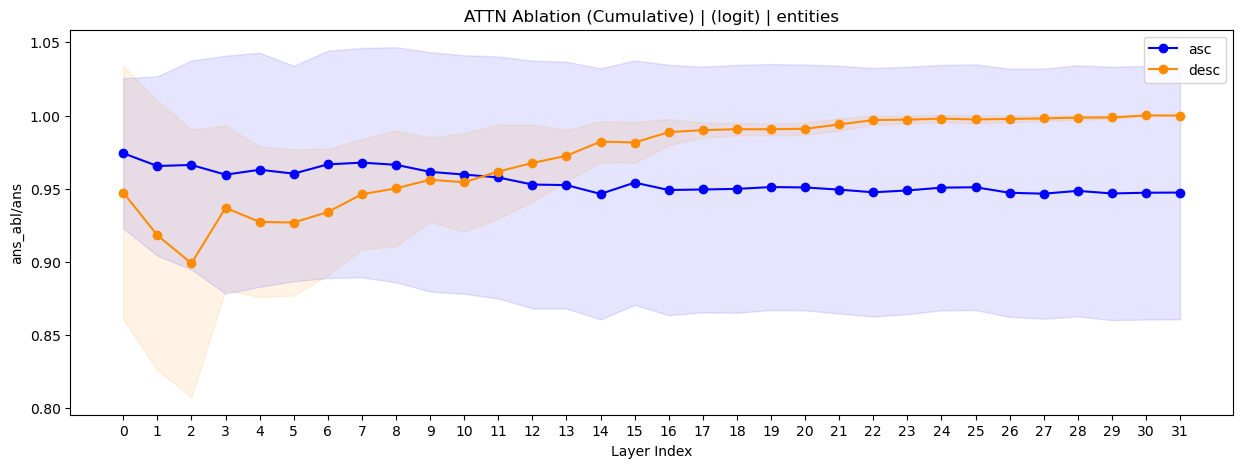

In [36]:
from matplotlib import pyplot as plt

metric: Literal["logit", "prob", "reciprocal_rank"] = "logit"

effects_asc = process_effects_per_layer(
    effects=[e["cumulative_effects"]["asc"] for e in effects],
    metric=metric,
    v_clean_ans=[getattr(e["clean_answer"], metric) for e in effects]
    if metric in ["logit", "prob"]
    else None,
)


effects_desc = process_effects_per_layer(
    effects=[e["cumulative_effects"]["desc"] for e in effects],
    metric=metric,
    v_clean_ans=[getattr(e["clean_answer"], metric) for e in effects]
    if metric in ["logit", "prob"]
    else None,
)


def plot_metric(
    results: dict[int, AggregateMetric], keys: list, label: str, color: str, canvas=plt
):
    values = [results[k].mean for k in keys]
    stds = [results[k].stdev for k in keys]
    canvas.plot(values, marker="o", label=label, color=color)
    canvas.fill_between(
        keys,
        [v - s for v, s in zip(values, stds)],
        [v + s for v, s in zip(values, stds)],
        alpha=0.1,
        color=color,
    )


plt.figure(figsize=(15, 5))
plt.title(f"ATTN Ablation (Cumulative) | ({metric}) | {focus_strategy}")

layers = list(range(mt.n_layer))
plot_metric(effects_asc, layers, "asc", color="blue")
plot_metric(effects_desc, layers, "desc", color="darkorange")

plt.xticks(layers)
plt.xlabel("Layer Index")
plt.ylabel("ans_abl/ans")
plt.legend()

plt.show()

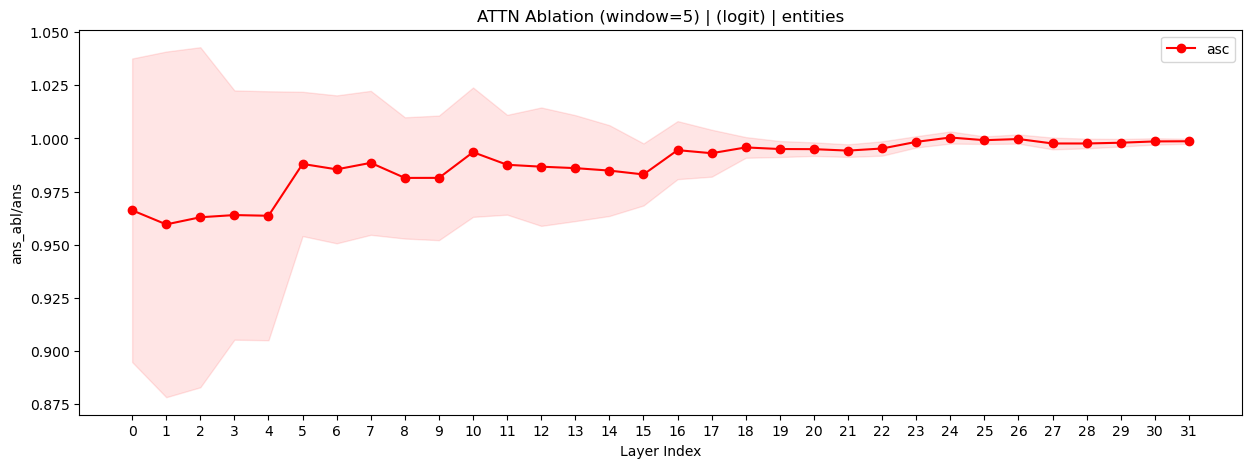

In [37]:
effects_window = process_effects_per_layer(
    effects=[e["attn_ablation_effects"] for e in effects],
    metric=metric,
    v_clean_ans=[getattr(e["clean_answer"], metric) for e in effects]
    if metric in ["logit", "prob"]
    else None,
)

plt.figure(figsize=(15, 5))
plt.title(f"ATTN Ablation (window=5) | ({metric}) | {focus_strategy}")

plot_metric(effects_window, list(effects_asc.keys()), "asc", color="red")

plt.xticks(layers)
plt.xlabel("Layer Index")
plt.ylabel("ans_abl/ans")
plt.legend()

plt.show()

## Patching from a different run to check contribution

In [32]:
from src.probing.prompt import BiAssociationPrefix
from src.utils.experiment_utils import set_seed

prefix_generator_cls = BiAssociationPrefix

set_seed(142)

prefix_generator = prefix_generator_cls(
    filter_attributes=["nationality", "profession", "school"],
    format="_3",
)

prefix = prefix_generator.get_prefix(
    n_valid=10,
    n_none=1,
)
print(prefix)

2025-06-05 13:38:23 src.utils.experiment_utils INFO     setting all seeds to 142
# Task: Find Common Attributes Between Two People
You will be given two people's names. Your job is to determine if they share ANY common attribute from the list below.

## Response Format:
- If you find a match: "Yes - [shared entity] - [description of what they share]"
- If no match: "No - [Person 1] and [Person 2] have nothing in common"

## Attributes to Consider:
1. Same nationality → "Yes - [nationality] - they are both [nationality]"
2. Same profession → "Yes - [profession] - they are both [profession]"
3. Same school → "Yes - [school] - they both graduated from [school]"

Q: Person E and Person F
A: Yes - Boston University - they both graduated from Boston University.

Q: Person C and Person D
A: Yes - Doctor - they are both doctors.

Q: Person A and Person B
A: Yes - German - they are both German.

Q: Person W and Person X
A: No - Person W and Person X have nothing in common.

## Your turn, give y

In [33]:
from src.probing.prompt import prepare_probing_input
from src.probing.utils import get_lm_generated_answer

patch_prompt = prepare_probing_input(
    mt=mt,
    entities=(sample.patched_entity, sample.common_entity),
    prefix=prefix,
    answer_marker=prefix_generator.answer_marker,
    question_marker=prefix_generator.question_marker,
    block_separator=prefix_generator.block_separator,
    is_a_reasoning_model=False,
    answer_prefix=" Yes -",
)


answer = get_lm_generated_answer(
    mt=mt,
    prompt=patch_prompt,
    is_a_reasoning_model=False,
    # is_a_reasoning_model=True
)
print(f"{(sample.patched_entity, sample.common_entity)} >> {answer=}")

clean_prompt = prepare_probing_input(
    mt=mt,
    entities=(sample.clean_entity, sample.common_entity),
    prefix=prefix,
    answer_marker=prefix_generator.answer_marker,
    question_marker=prefix_generator.question_marker,
    block_separator=prefix_generator.block_separator,
    is_a_reasoning_model=False,
    answer_prefix=" Yes -",
)

clean_answer = get_lm_generated_answer(
    mt=mt,
    prompt=clean_prompt,
    is_a_reasoning_model=False,
    # is_a_reasoning_model=True
)
print(f"{(sample.clean_entity, sample.common_entity)} >> {clean_answer=}")

/disk/u/arnab/miniconda3/envs/connection/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:631: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/disk/u/arnab/miniconda3/envs/connection/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:636: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


('Fatima Sheikh', 'Grace Wanjiru') >> answer='Teacher - they are both teachers.<|eot_id|>'
('James Mwangi', 'Grace Wanjiru') >> clean_answer='Kenyan - they are both Kenyan.<|eot_id|>'


In [34]:
from src.functional import get_keywords_from_text

# keywords = get_keywords_from_text(text=answer, tokenizer=mt)
keywords = [predict_next_token(
    mt = mt,
    inputs = TokenizerOutput(data=patch_prompt.tokenized),
)[0][0].token_id]

[f"\"{mt.tokenizer.decode(k)}\"[{k}]" for k in keywords]

['" Teacher"[30169]']

In [35]:
patch_attn_outputs = get_hs(
    mt=mt,
    input=patch_prompt.prompt,
    locations=[(mt.attn_module_name_format.format(l), -1) for l in range(mt.n_layer)],
    return_dict=True,
)

In [36]:
gold_score, gold_pred, gold_track = patched_run(
    mt=mt,
    inputs=TokenizerOutput(data=patch_prompt.tokenized),
    patches=[],
    ans_tokens=keywords,
    # generate_full_ans = True,
    metric="logit",
)
print(f"{gold_score=}")

corrupt_score, corrupt_pred, corrupt_track = patched_run(
    mt=mt,
    inputs=TokenizerOutput(data=clean_prompt.tokenized),
    patches=[],
    ans_tokens=keywords,
    # generate_full_ans = True,
    metric="logit",
)
print(f"{corrupt_score=}")

gold_score=17.625
corrupt_score=13.375


In [37]:
patch_attn_outputs = get_hs(
    mt=mt,
    input=patch_prompt.prompt,
    locations=[(mt.attn_module_name_format.format(l), -1) for l in range(mt.n_layer)],
    return_dict=True,
)

# layer_idx = 30
# layer_window = get_window(mt.attn_module_name_format, layer_idx, 5, mt.n_layer)
layer_window = range(30, 42) #! critical range
# layer_window = range(10, 30) #! too early
# layer_window = range(50, mt.n_layer-2) #! too late


layer_window = [mt.attn_module_name_format.format(l) for l in layer_window]
tokenized_input = TokenizerOutput(data=clean_prompt.tokenized)
last_tok_idx = tokenized_input.input_ids.shape[1] - 1

patches = [
    PatchSpec(location=(layer, last_tok_idx), patch=2 * patch_attn_outputs[(layer, -1)])
    for layer in layer_window
]
# patches = []

patched_score, pred, track = patched_run(
    mt=mt,
    inputs=tokenized_input,
    patches=patches,
    ans_tokens=keywords,
    generate_full_ans=True,
    metric="logit",
)

print(f"{patched_score=}")
pred_print = [str(pred) for pred in pred]
print(f"{pred_print}")
print(f"{track=}")


indirect_effect = (patched_score - corrupt_score) / (gold_score - corrupt_score)
print(f"{indirect_effect=}")

" Indian Institute of Technology - they both graduated from Indian Institute of Technology."
patched_score=17.125
['" Indian"[7904] (p=0.402, logit=17.500)', '" Teacher"[30169] (p=0.277, logit=17.125)', '" Education"[11930] (p=0.054, logit=15.500)', '" Educ"[10355] (p=0.048, logit=15.375)', '" India"[6890] (p=0.048, logit=15.375)']
track={30169: (2, PredictedToken(token=' Teacher', prob=0.27734375, logit=17.125, token_id=30169, metadata=None))}
indirect_effect=0.8823529411764706


In [40]:
from src.functional import get_keywords_from_text
from typing import Optional
from tqdm import tqdm
from src.trace import get_window



@torch.inference_mode()
def do_patching_sweep(
    mt: ModelandTokenizer,
    samples: list[ActivationPatchingSamples],
    layers: Optional[list[int]] = None,
    token_idx=-1,  # TODO: incorporate different key positions like: subj_last, token_last, all_subj, ...
    metric: Literal["logit", "prob"] = "logit",
    coeff: float = 1.0,
    kind: Literal["mlp", "attn", "residual"] = "attn",
    window: int | Literal["from", "upto"] = 5,
) -> dict:
    layers = list(range(mt.n_layer)) if layers is None else layers
    module_name_format = {
        "residual": mt.layer_name_format,
        "mlp": mt.mlp_module_name_format,
        "attn": mt.attn_module_name_format,
    }[kind]

    results = []
    for idx, sample in tqdm(enumerate(samples)):
        logger.info(f"({idx + 1}/{len(samples)})  {sample}")
        kwargs = dict(
            prefix=prefix,
            answer_marker=prefix_generator_cls.answer_marker,
            question_marker=prefix_generator_cls.question_marker,
            block_separator=prefix_generator_cls.block_separator,
            is_a_reasoning_model=False,
            answer_prefix=" Yes -",
        )

        patch_prompt = prepare_probing_input(
            mt=mt,
            entities=(sample.patched_entity, sample.common_entity),
            **kwargs,
        )

        answer = get_lm_generated_answer(
            mt=mt,
            prompt=patch_prompt,
            is_a_reasoning_model=False,
        )
        logger.info(f"{(sample.patched_entity, sample.common_entity)} >> {answer=}")

        clean_prompt = prepare_probing_input(
            mt=mt, entities=(sample.clean_entity, sample.common_entity), **kwargs
        )

        clean_answer = get_lm_generated_answer(
            mt=mt,
            prompt=clean_prompt,
            is_a_reasoning_model=False,
        )
        logger.info(f"{(sample.clean_entity, sample.common_entity)} >> {clean_answer=}")

        # answer_tokens = get_keywords_from_text(text=answer, tokenizer=mt)
        answer_tokens = [
            predict_next_token(
                mt=mt,
                inputs=TokenizerOutput(data=patch_prompt.tokenized),
            )[0][0].token_id
        ]
        logger.info(f"{[f'{t}({mt.tokenizer.decode(t)})' for t in answer_tokens]}")

        gold_score, gold_pred, gold_track = patched_run(
            mt=mt,
            inputs=TokenizerOutput(data=patch_prompt.tokenized),
            patches=[],
            ans_tokens=answer_tokens,
            metric=metric,
        )
        logger.info(f"{gold_score=}")

        corrupt_score, corrupt_pred, corrupt_track = patched_run(
            mt=mt,
            inputs=TokenizerOutput(data=clean_prompt.tokenized),
            patches=[],
            ans_tokens=answer_tokens,
            metric=metric,
        )
        logger.info(f"{corrupt_score=}")

        patch_layers = {}
        unique_layers = []
        for layer_idx in layers:
            if window == "from":
                layer_window = range(layer_idx, mt.n_layer)
            elif window == "upto":
                layer_window = range(0, layer_idx + 1)
            else:
                assert isinstance(window, int)
                layer_window = [
                    int(l) for l in get_window("{}", layer_idx, window, mt.n_layer)
                ]

            patch_layers[layer_idx] = [
                module_name_format.format(l) for l in layer_window
            ]
            unique_layers += patch_layers[layer_idx]

        unique_layers = set(unique_layers)

        patch_outputs = get_hs(
            mt=mt,
            input=patch_prompt.prompt,
            locations=[(l, token_idx) for l in unique_layers],
            return_dict=True,
        )

        patching_results = {}
        clean_input = TokenizerOutput(data=clean_prompt.tokenized)

        #! currently assumes `token_idx to cache state from LM(patch_input) == token_idx to patch to LM(clean_input)` (change?)
        patch_token_idx = token_idx
        if patch_token_idx < 0:
            patch_token_idx = clean_input.input_ids.shape[1] + token_idx

        for layer_idx, layer_window in patch_layers.items():
            patches = [
                PatchSpec(
                    location=(layer, patch_token_idx),
                    patch=coeff * patch_outputs[(layer, token_idx)],
                )
                for layer in layer_window
            ]

            patched_score, pred, track = patched_run(
                mt=mt,
                inputs=clean_input,
                patches=patches,
                ans_tokens=answer_tokens,
                generate_full_ans=False,
                metric=metric,
            )

            logger.debug(f"         {layer_idx=}, {patched_score=}")
            # print(layer_window)

            patching_results[layer_idx] = dict(
                score=patched_score,
                pred=pred,
                track=track,
            )

        logger.debug("-" * 30)

        results.append(
            dict(
                sample=sample,
                answer=answer,
                answer_tokens=answer_tokens,
                gold_score=gold_score,
                corrupt_score=corrupt_score,
                patching_results=patching_results,
            )
        )

    return results

In [41]:
activation_patching_path = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR,
    "activation_patching", SYNTH_DATASET,
)
first_atten_look_path = os.path.join(activation_patching_path, "1st_attn_look")
os.makedirs(first_atten_look_path, exist_ok=True)

### Running the ATTN patching sweep and caching the results

In [ ]:
kwargs = dict(
    mt=mt,
    # samples = [coincidences["examples"][sample_idx]],
    samples=samples,
    token_idx=-1,
    metric="logit",
    coeff=1.0,
    kind="attn",
)

res_from = do_patching_sweep(
    **kwargs,
    window="from",
)

with open(os.path.join(first_atten_look_path, "res_from.json"), "w") as f:
    json.dump(res_from, f, indent=4, default=str)



res_upto = do_patching_sweep(
    **kwargs,
    window="upto",
)

with open(os.path.join(first_atten_look_path, "res_upto.json"), "w") as f:
    json.dump(res_upto, f, indent=4, default=str)


res_win = do_patching_sweep(
    **kwargs,
    window=5,
)

with open(os.path.join(first_atten_look_path, "res_win.json"), "w") as f:
    json.dump(res_win, f, indent=4, default=str)

0it [00:00, ?it/s]

2025-06-02 18:08:52 __main__ INFO     (1/20)  Grace Wanjiru | James Mwangi => " Ken" | <-- | Fatima Sheikh => " Urban"
2025-06-02 18:09:01 __main__ INFO     ('Fatima Sheikh', 'Grace Wanjiru') >> answer='Urban Planner - they are both urban planners.<|eot_id|>'
2025-06-02 18:09:07 __main__ INFO     ('James Mwangi', 'Grace Wanjiru') >> clean_answer='Kenyan - they are both Kenyan.<|eot_id|>'
2025-06-02 18:09:09 __main__ INFO     ['29422( Urban)']
2025-06-02 18:09:10 __main__ INFO     gold_score=18.0
2025-06-02 18:09:11 __main__ INFO     corrupt_score=7.46875
2025-06-02 18:09:14 __main__ DEBUG             layer_idx=0, patched_score=18.0
2025-06-02 18:09:15 __main__ DEBUG             layer_idx=1, patched_score=18.0
2025-06-02 18:09:16 __main__ DEBUG             layer_idx=2, patched_score=18.0
2025-06-02 18:09:18 __main__ DEBUG             layer_idx=3, patched_score=18.0
2025-06-02 18:09:19 __main__ DEBUG             layer_idx=4, patched_score=18.0
2025-06-02 18:09:20 __main__ DEBUG          

1it [00:56, 56.96s/it]

2025-06-02 18:09:49 __main__ INFO     (2/20)  Rahman Ali | Nasreen Begum => " Bang" | <-- | Takeshi Yamamoto => " Civil"
2025-06-02 18:09:50 __main__ INFO     ('Takeshi Yamamoto', 'Rahman Ali') >> answer='Civil Engineer - they are both civil engineers.<|eot_id|>'
2025-06-02 18:09:52 __main__ INFO     ('Nasreen Begum', 'Rahman Ali') >> clean_answer='Bangladesh - they are both Bangladeshi.<|eot_id|>'
2025-06-02 18:09:53 __main__ INFO     ['16803( Civil)']
2025-06-02 18:09:54 __main__ INFO     gold_score=18.125
2025-06-02 18:09:54 __main__ INFO     corrupt_score=14.1875
2025-06-02 18:09:54 __main__ DEBUG             layer_idx=0, patched_score=18.125
2025-06-02 18:09:55 __main__ DEBUG             layer_idx=1, patched_score=18.125
2025-06-02 18:09:55 __main__ DEBUG             layer_idx=2, patched_score=18.125
2025-06-02 18:09:56 __main__ DEBUG             layer_idx=3, patched_score=18.125
2025-06-02 18:09:56 __main__ DEBUG             layer_idx=4, patched_score=18.125
2025-06-02 18:09:56 _

2it [01:29, 42.60s/it]

2025-06-02 18:10:21 __main__ INFO     (3/20)  Takeshi Yamamoto | Yuki Tanaka => " Japanese" | <-- | Rahman Ali => " Civil"
2025-06-02 18:10:23 __main__ INFO     ('Rahman Ali', 'Takeshi Yamamoto') >> answer='Civil Engineer - they are both civil engineers.<|eot_id|>'
2025-06-02 18:10:24 __main__ INFO     ('Yuki Tanaka', 'Takeshi Yamamoto') >> clean_answer='Japanese - they are both Japanese.<|eot_id|>'
2025-06-02 18:10:25 __main__ INFO     ['16803( Civil)']
2025-06-02 18:10:25 __main__ INFO     gold_score=19.25
2025-06-02 18:10:26 __main__ INFO     corrupt_score=8.125
2025-06-02 18:10:26 __main__ DEBUG             layer_idx=0, patched_score=19.25
2025-06-02 18:10:27 __main__ DEBUG             layer_idx=1, patched_score=19.25
2025-06-02 18:10:27 __main__ DEBUG             layer_idx=2, patched_score=19.25
2025-06-02 18:10:27 __main__ DEBUG             layer_idx=3, patched_score=19.25
2025-06-02 18:10:28 __main__ DEBUG             layer_idx=4, patched_score=19.25
2025-06-02 18:10:28 __main__

3it [02:02, 38.28s/it]

2025-06-02 18:10:54 __main__ INFO     (4/20)  Anna Schmidt | Hans Mueller => " German" | <-- | Yuki Tanaka => " Marketing"
2025-06-02 18:10:56 __main__ INFO     ('Yuki Tanaka', 'Anna Schmidt') >> answer='Marketing Manager - they are both Marketing Managers.<|eot_id|>'
2025-06-02 18:10:58 __main__ INFO     ('Hans Mueller', 'Anna Schmidt') >> clean_answer='German - they are both German.<|eot_id|>'
2025-06-02 18:10:58 __main__ INFO     ['18729( Marketing)']
2025-06-02 18:10:59 __main__ INFO     gold_score=17.25
2025-06-02 18:10:59 __main__ INFO     corrupt_score=10.625
2025-06-02 18:10:59 __main__ DEBUG             layer_idx=0, patched_score=17.25
2025-06-02 18:11:00 __main__ DEBUG             layer_idx=1, patched_score=17.25
2025-06-02 18:11:00 __main__ DEBUG             layer_idx=2, patched_score=17.25
2025-06-02 18:11:00 __main__ DEBUG             layer_idx=3, patched_score=17.25
2025-06-02 18:11:00 __main__ DEBUG             layer_idx=4, patched_score=17.25
2025-06-02 18:11:01 __main_

4it [03:07, 48.96s/it]

2025-06-02 18:12:00 __main__ INFO     (5/20)  Yuki Tanaka | Takeshi Yamamoto => " Japanese" | <-- | Anna Schmidt => " Marketing"
2025-06-02 18:12:11 __main__ INFO     ('Anna Schmidt', 'Yuki Tanaka') >> answer='Marketing Manager - they are both Marketing Managers.<|eot_id|>'
2025-06-02 18:12:21 __main__ INFO     ('Takeshi Yamamoto', 'Yuki Tanaka') >> clean_answer='Japanese - they are both Japanese.<|eot_id|>'
2025-06-02 18:12:22 __main__ INFO     ['18729( Marketing)']
2025-06-02 18:12:23 __main__ INFO     gold_score=15.375
2025-06-02 18:12:24 __main__ INFO     corrupt_score=6.5
2025-06-02 18:12:26 __main__ DEBUG             layer_idx=0, patched_score=15.375
2025-06-02 18:12:26 __main__ DEBUG             layer_idx=1, patched_score=15.3125
2025-06-02 18:12:27 __main__ DEBUG             layer_idx=2, patched_score=15.375
2025-06-02 18:12:28 __main__ DEBUG             layer_idx=3, patched_score=15.375
2025-06-02 18:12:29 __main__ DEBUG             layer_idx=4, patched_score=15.375
2025-06-02

5it [05:03, 73.06s/it]

2025-06-02 18:13:55 __main__ INFO     (6/20)  Ayse Kaya | Maria Santos => " Doctor" | <-- | Hans Mueller => " Economist"
2025-06-02 18:14:05 __main__ INFO     ('Hans Mueller', 'Ayse Kaya') >> answer='Economist - they are both economists.<|eot_id|>'
2025-06-02 18:14:14 __main__ INFO     ('Maria Santos', 'Ayse Kaya') >> clean_answer='Doctor - they are both doctors.<|eot_id|>'
2025-06-02 18:14:15 __main__ INFO     ['84038( Economist)']
2025-06-02 18:14:15 __main__ INFO     gold_score=20.0
2025-06-02 18:14:17 __main__ INFO     corrupt_score=11.75
2025-06-02 18:14:19 __main__ DEBUG             layer_idx=0, patched_score=20.0
2025-06-02 18:14:20 __main__ DEBUG             layer_idx=1, patched_score=20.0
2025-06-02 18:14:21 __main__ DEBUG             layer_idx=2, patched_score=20.0
2025-06-02 18:14:23 __main__ DEBUG             layer_idx=3, patched_score=20.0
2025-06-02 18:14:24 __main__ DEBUG             layer_idx=4, patched_score=20.125
2025-06-02 18:14:25 __main__ DEBUG             layer_i

6it [06:55, 86.16s/it]

2025-06-02 18:15:47 __main__ INFO     (7/20)  Hans Mueller | Anna Schmidt => " German" | <-- | Ayse Kaya => " Economist"
2025-06-02 18:15:57 __main__ INFO     ('Ayse Kaya', 'Hans Mueller') >> answer='Economist - they are both economists.<|eot_id|>'
2025-06-02 18:16:02 __main__ INFO     ('Anna Schmidt', 'Hans Mueller') >> clean_answer='German - they are both German.<|eot_id|>'
2025-06-02 18:16:03 __main__ INFO     ['84038( Economist)']
2025-06-02 18:16:03 __main__ INFO     gold_score=20.0
2025-06-02 18:16:05 __main__ INFO     corrupt_score=13.375
2025-06-02 18:16:07 __main__ DEBUG             layer_idx=0, patched_score=20.0
2025-06-02 18:16:08 __main__ DEBUG             layer_idx=1, patched_score=20.0
2025-06-02 18:16:09 __main__ DEBUG             layer_idx=2, patched_score=20.0
2025-06-02 18:16:10 __main__ DEBUG             layer_idx=3, patched_score=20.0
2025-06-02 18:16:12 __main__ DEBUG             layer_idx=4, patched_score=20.0
2025-06-02 18:16:13 __main__ DEBUG             layer_

7it [08:41, 92.85s/it]

2025-06-02 18:17:34 __main__ INFO     (8/20)  Priya Patel | Rajesh Kumar => " Indian" | <-- | Sofia Hernandez => " Graphic"
2025-06-02 18:17:45 __main__ INFO     ('Sofia Hernandez', 'Priya Patel') >> answer='Graphic Designer - they are both graphic designers.<|eot_id|>'
2025-06-02 18:17:53 __main__ INFO     ('Rajesh Kumar', 'Priya Patel') >> clean_answer='Indian - they are both Indian.<|eot_id|>'
2025-06-02 18:17:54 __main__ INFO     ['45051( Graphic)']
2025-06-02 18:17:55 __main__ INFO     gold_score=15.3125
2025-06-02 18:17:56 __main__ INFO     corrupt_score=7.46875
2025-06-02 18:17:58 __main__ DEBUG             layer_idx=0, patched_score=15.3125
2025-06-02 18:18:00 __main__ DEBUG             layer_idx=1, patched_score=15.3125
2025-06-02 18:18:01 __main__ DEBUG             layer_idx=2, patched_score=15.375
2025-06-02 18:18:02 __main__ DEBUG             layer_idx=3, patched_score=15.375
2025-06-02 18:18:03 __main__ DEBUG             layer_idx=4, patched_score=15.3125
2025-06-02 18:18:

8it [10:38, 100.29s/it]

2025-06-02 18:19:30 __main__ INFO     (9/20)  Sofia Hernandez | Carlos Rodriguez => " Mexican" | <-- | Priya Patel => " Graphic"
2025-06-02 18:19:39 __main__ INFO     ('Priya Patel', 'Sofia Hernandez') >> answer='Graphic Designer - they are both graphic designers.<|eot_id|>'
2025-06-02 18:19:45 __main__ INFO     ('Carlos Rodriguez', 'Sofia Hernandez') >> clean_answer='Mexican - they are both Mexican.<|eot_id|>'
2025-06-02 18:19:47 __main__ INFO     ['45051( Graphic)']
2025-06-02 18:19:48 __main__ INFO     gold_score=16.0
2025-06-02 18:19:49 __main__ INFO     corrupt_score=12.5625
2025-06-02 18:19:51 __main__ DEBUG             layer_idx=0, patched_score=16.0
2025-06-02 18:19:52 __main__ DEBUG             layer_idx=1, patched_score=16.0
2025-06-02 18:19:54 __main__ DEBUG             layer_idx=2, patched_score=16.125
2025-06-02 18:19:55 __main__ DEBUG             layer_idx=3, patched_score=16.125
2025-06-02 18:19:56 __main__ DEBUG             layer_idx=4, patched_score=16.0
2025-06-02 18:

9it [12:29, 103.68s/it]

2025-06-02 18:21:21 __main__ INFO     (10/20)  Zahra Hosseini | Ali Rezaei => " Iranian" | <-- | Ahmed Hassan => " Pilot"
2025-06-02 18:21:29 __main__ INFO     ('Ahmed Hassan', 'Zahra Hosseini') >> answer='Pilot - they are both pilots.<|eot_id|>'
2025-06-02 18:21:34 __main__ INFO     ('Ali Rezaei', 'Zahra Hosseini') >> clean_answer='Doctor - they are both doctors.<|eot_id|>'
2025-06-02 18:21:35 __main__ INFO     ['45599( Pilot)']
2025-06-02 18:21:36 __main__ INFO     gold_score=20.125
2025-06-02 18:21:37 __main__ INFO     corrupt_score=10.375
2025-06-02 18:21:40 __main__ DEBUG             layer_idx=0, patched_score=20.125
2025-06-02 18:21:41 __main__ DEBUG             layer_idx=1, patched_score=20.125
2025-06-02 18:21:43 __main__ DEBUG             layer_idx=2, patched_score=20.125
2025-06-02 18:21:44 __main__ DEBUG             layer_idx=3, patched_score=20.125
2025-06-02 18:21:45 __main__ DEBUG             layer_idx=4, patched_score=20.125
2025-06-02 18:21:46 __main__ DEBUG            

10it [14:18, 105.47s/it]

2025-06-02 18:23:11 __main__ INFO     (11/20)  Ahmed Hassan | Layla Mahmoud => " Egyptian" | <-- | Zahra Hosseini => " Pilot"
2025-06-02 18:23:17 __main__ INFO     ('Zahra Hosseini', 'Ahmed Hassan') >> answer='Pilot - they are both pilots.<|eot_id|>'
2025-06-02 18:23:21 __main__ INFO     ('Layla Mahmoud', 'Ahmed Hassan') >> clean_answer='Egyptian - they are both Egyptian.<|eot_id|>'
2025-06-02 18:23:22 __main__ INFO     ['45599( Pilot)']
2025-06-02 18:23:24 __main__ INFO     gold_score=19.75
2025-06-02 18:23:25 __main__ INFO     corrupt_score=13.9375
2025-06-02 18:23:27 __main__ DEBUG             layer_idx=0, patched_score=19.75
2025-06-02 18:23:28 __main__ DEBUG             layer_idx=1, patched_score=19.75
2025-06-02 18:23:29 __main__ DEBUG             layer_idx=2, patched_score=19.625
2025-06-02 18:23:30 __main__ DEBUG             layer_idx=3, patched_score=19.625
2025-06-02 18:23:32 __main__ DEBUG             layer_idx=4, patched_score=19.625
2025-06-02 18:23:33 __main__ DEBUG      

11it [16:02, 104.81s/it]

2025-06-02 18:24:54 __main__ INFO     (12/20)  Kwame Mensah | Rahman Ali => " Doctor" | <-- | Min-jun Park => " Ge"
2025-06-02 18:25:04 __main__ INFO     ('Min-jun Park', 'Kwame Mensah') >> answer='Geologist - they are both geologists.<|eot_id|>'
2025-06-02 18:25:10 __main__ INFO     ('Rahman Ali', 'Kwame Mensah') >> clean_answer='Engineer - they are both engineers.<|eot_id|>'
2025-06-02 18:25:12 __main__ INFO     ['4323( Ge)']
2025-06-02 18:25:13 __main__ INFO     gold_score=19.0
2025-06-02 18:25:14 __main__ INFO     corrupt_score=13.625
2025-06-02 18:25:17 __main__ DEBUG             layer_idx=0, patched_score=19.0
2025-06-02 18:25:18 __main__ DEBUG             layer_idx=1, patched_score=19.0
2025-06-02 18:25:19 __main__ DEBUG             layer_idx=2, patched_score=18.875
2025-06-02 18:25:20 __main__ DEBUG             layer_idx=3, patched_score=19.0
2025-06-02 18:25:21 __main__ DEBUG             layer_idx=4, patched_score=19.0
2025-06-02 18:25:23 __main__ DEBUG             layer_idx=5

12it [17:55, 107.40s/it]

2025-06-02 18:26:47 __main__ INFO     (13/20)  Tran Thi Mai | Nguyen Van Duc => " Vietnamese" | <-- | Marco Rossi => " Architect"
2025-06-02 18:26:55 __main__ INFO     ('Marco Rossi', 'Tran Thi Mai') >> answer='Architect - they are both architects.<|eot_id|>'
2025-06-02 18:26:59 __main__ INFO     ('Nguyen Van Duc', 'Tran Thi Mai') >> clean_answer='Vietnamese - they are both Vietnamese.<|eot_id|>'
2025-06-02 18:27:00 __main__ INFO     ['24979( Architect)']
2025-06-02 18:27:01 __main__ INFO     gold_score=19.25
2025-06-02 18:27:02 __main__ INFO     corrupt_score=14.1875
2025-06-02 18:27:05 __main__ DEBUG             layer_idx=0, patched_score=19.25
2025-06-02 18:27:06 __main__ DEBUG             layer_idx=1, patched_score=19.25
2025-06-02 18:27:07 __main__ DEBUG             layer_idx=2, patched_score=19.25
2025-06-02 18:27:08 __main__ DEBUG             layer_idx=3, patched_score=19.25
2025-06-02 18:27:10 __main__ DEBUG             layer_idx=4, patched_score=19.25
2025-06-02 18:27:11 __mai

13it [19:42, 107.17s/it]

2025-06-02 18:28:34 __main__ INFO     (14/20)  Marco Rossi | Giulia Romano => " Italian" | <-- | Tran Thi Mai => " Architect"
2025-06-02 18:28:42 __main__ INFO     ('Tran Thi Mai', 'Marco Rossi') >> answer='Architect - they are both architects.<|eot_id|>'
2025-06-02 18:28:46 __main__ INFO     ('Giulia Romano', 'Marco Rossi') >> clean_answer='Italian - they are both Italian.<|eot_id|>'
2025-06-02 18:28:48 __main__ INFO     ['24979( Architect)']
2025-06-02 18:28:49 __main__ INFO     gold_score=17.125
2025-06-02 18:28:50 __main__ INFO     corrupt_score=12.5
2025-06-02 18:28:53 __main__ DEBUG             layer_idx=0, patched_score=17.125
2025-06-02 18:28:54 __main__ DEBUG             layer_idx=1, patched_score=17.125
2025-06-02 18:28:55 __main__ DEBUG             layer_idx=2, patched_score=17.125
2025-06-02 18:28:57 __main__ DEBUG             layer_idx=3, patched_score=17.125
2025-06-02 18:28:58 __main__ DEBUG             layer_idx=4, patched_score=17.125
2025-06-02 18:28:59 __main__ DEBUG

14it [21:30, 107.60s/it]

2025-06-02 18:30:22 __main__ INFO     (15/20)  Giulia Romano | Marco Rossi => " Italian" | <-- | Akosua Boateng => " Data"
2025-06-02 18:30:33 __main__ INFO     ('Akosua Boateng', 'Giulia Romano') >> answer='Data Analyst - they are both Data Analysts.<|eot_id|>'
2025-06-02 18:30:37 __main__ INFO     ('Marco Rossi', 'Giulia Romano') >> clean_answer='Italian - they are both Italian.<|eot_id|>'
2025-06-02 18:30:39 __main__ INFO     ['2956( Data)']
2025-06-02 18:30:40 __main__ INFO     gold_score=17.375
2025-06-02 18:30:41 __main__ INFO     corrupt_score=6.53125
2025-06-02 18:30:44 __main__ DEBUG             layer_idx=0, patched_score=17.375
2025-06-02 18:30:45 __main__ DEBUG             layer_idx=1, patched_score=17.375
2025-06-02 18:30:46 __main__ DEBUG             layer_idx=2, patched_score=17.375
2025-06-02 18:30:47 __main__ DEBUG             layer_idx=3, patched_score=17.25
2025-06-02 18:30:48 __main__ DEBUG             layer_idx=4, patched_score=17.375
2025-06-02 18:30:50 __main__ DE

15it [23:22, 108.97s/it]

2025-06-02 18:32:15 __main__ INFO     (16/20)  Alexandru Popescu | Elena Ionescu => " Romanian" | <-- | David Thompson => " Environmental"
2025-06-02 18:32:21 __main__ INFO     ('David Thompson', 'Alexandru Popescu') >> answer='Environmental Scientist - they are both Environmental Scientists.<|eot_id|>'
2025-06-02 18:32:27 __main__ INFO     ('Elena Ionescu', 'Alexandru Popescu') >> clean_answer='Romanian - they are both Romanian.<|eot_id|>'
2025-06-02 18:32:28 __main__ INFO     ['25027( Environmental)']
2025-06-02 18:32:30 __main__ INFO     gold_score=17.0
2025-06-02 18:32:31 __main__ INFO     corrupt_score=9.4375
2025-06-02 18:32:33 __main__ DEBUG             layer_idx=0, patched_score=17.0
2025-06-02 18:32:34 __main__ DEBUG             layer_idx=1, patched_score=17.0
2025-06-02 18:32:36 __main__ DEBUG             layer_idx=2, patched_score=17.0
2025-06-02 18:32:37 __main__ DEBUG             layer_idx=3, patched_score=17.0
2025-06-02 18:32:38 __main__ DEBUG             layer_idx=4, pa

16it [25:13, 109.52s/it]

2025-06-02 18:34:05 __main__ INFO     (17/20)  David Thompson | Sarah MacDonald => " McGill" | <-- | Alexandru Popescu => " Environmental"
2025-06-02 18:34:13 __main__ INFO     ('Alexandru Popescu', 'David Thompson') >> answer='Environmental Scientist - they are both Environmental Scientists.<|eot_id|>'
2025-06-02 18:34:22 __main__ INFO     ('Sarah MacDonald', 'David Thompson') >> clean_answer='McGill University - they both graduated from McGill University.<|eot_id|>'
2025-06-02 18:34:24 __main__ INFO     ['25027( Environmental)']
2025-06-02 18:34:25 __main__ INFO     gold_score=16.75
2025-06-02 18:34:26 __main__ INFO     corrupt_score=12.75
2025-06-02 18:34:28 __main__ DEBUG             layer_idx=0, patched_score=16.75
2025-06-02 18:34:29 __main__ DEBUG             layer_idx=1, patched_score=16.875
2025-06-02 18:34:30 __main__ DEBUG             layer_idx=2, patched_score=16.875
2025-06-02 18:34:31 __main__ DEBUG             layer_idx=3, patched_score=16.875
2025-06-02 18:34:32 __main_

17it [27:04, 109.85s/it]

2025-06-02 18:35:56 __main__ INFO     (18/20)  António Costa | Isabel Ferreira => " Portuguese" | <-- | Jack Wilson => " Software"
2025-06-02 18:36:04 __main__ INFO     ('Jack Wilson', 'António Costa') >> answer='Software Engineer - they are both software engineers.<|eot_id|>'
2025-06-02 18:36:10 __main__ INFO     ('Isabel Ferreira', 'António Costa') >> clean_answer='Portuguese - they are both Portuguese.<|eot_id|>'
2025-06-02 18:36:12 __main__ INFO     ['4476( Software)']
2025-06-02 18:36:13 __main__ INFO     gold_score=16.25
2025-06-02 18:36:14 __main__ INFO     corrupt_score=9.6875
2025-06-02 18:36:16 __main__ DEBUG             layer_idx=0, patched_score=16.25
2025-06-02 18:36:18 __main__ DEBUG             layer_idx=1, patched_score=16.25
2025-06-02 18:36:19 __main__ DEBUG             layer_idx=2, patched_score=16.25
2025-06-02 18:36:20 __main__ DEBUG             layer_idx=3, patched_score=16.25
2025-06-02 18:36:21 __main__ DEBUG             layer_idx=4, patched_score=16.25
2025-06-

18it [28:56, 110.46s/it]

2025-06-02 18:37:48 __main__ INFO     (19/20)  Astrid Lindgren | Erik Andersson => " Swedish" | <-- | Lisa van der Berg => " Web"
2025-06-02 18:37:56 __main__ INFO     ('Lisa van der Berg', 'Astrid Lindgren') >> answer='Web Developer - they are both web developers.<|eot_id|>'
2025-06-02 18:38:02 __main__ INFO     ('Erik Andersson', 'Astrid Lindgren') >> clean_answer='Swedish - they are both Swedish.<|eot_id|>'
2025-06-02 18:38:04 __main__ INFO     ['5000( Web)']
2025-06-02 18:38:05 __main__ INFO     gold_score=16.625
2025-06-02 18:38:06 __main__ INFO     corrupt_score=8.4375
2025-06-02 18:38:08 __main__ DEBUG             layer_idx=0, patched_score=16.625
2025-06-02 18:38:09 __main__ DEBUG             layer_idx=1, patched_score=16.625
2025-06-02 18:38:11 __main__ DEBUG             layer_idx=2, patched_score=16.625
2025-06-02 18:38:12 __main__ DEBUG             layer_idx=3, patched_score=16.625
2025-06-02 18:38:13 __main__ DEBUG             layer_idx=4, patched_score=16.625
2025-06-02 18

19it [30:48, 110.91s/it]

2025-06-02 18:39:40 __main__ INFO     (20/20)  Rodrigo Gonzalez | Camila Torres => " Chile" | <-- | Maria dela Rosa => " Mechanical"
2025-06-02 18:39:48 __main__ INFO     ('Maria dela Rosa', 'Rodrigo Gonzalez') >> answer='Mechanical Engineer - they are both mechanical engineers.<|eot_id|>'
2025-06-02 18:39:58 __main__ INFO     ('Camila Torres', 'Rodrigo Gonzalez') >> clean_answer='University of Chile - they both graduated from University of Chile.<|eot_id|>'
2025-06-02 18:39:59 __main__ INFO     ['51684( Mechanical)']
2025-06-02 18:40:00 __main__ INFO     gold_score=16.5
2025-06-02 18:40:01 __main__ INFO     corrupt_score=6.34375
2025-06-02 18:40:03 __main__ DEBUG             layer_idx=0, patched_score=16.5
2025-06-02 18:40:05 __main__ DEBUG             layer_idx=1, patched_score=16.5
2025-06-02 18:40:06 __main__ DEBUG             layer_idx=2, patched_score=16.5
2025-06-02 18:40:07 __main__ DEBUG             layer_idx=3, patched_score=16.5
2025-06-02 18:40:08 __main__ DEBUG            

20it [32:39, 97.99s/it] 
0it [00:00, ?it/s]

2025-06-02 18:41:32 __main__ INFO     (1/20)  Grace Wanjiru | James Mwangi => " Ken" | <-- | Fatima Sheikh => " Urban"
2025-06-02 18:41:39 __main__ INFO     ('Fatima Sheikh', 'Grace Wanjiru') >> answer='Urban Planner - they are both urban planners.<|eot_id|>'
2025-06-02 18:41:47 __main__ INFO     ('James Mwangi', 'Grace Wanjiru') >> clean_answer='Kenyan - they are both Kenyan.<|eot_id|>'
2025-06-02 18:41:49 __main__ INFO     ['29422( Urban)']
2025-06-02 18:41:50 __main__ INFO     gold_score=18.0
2025-06-02 18:41:51 __main__ INFO     corrupt_score=7.46875
2025-06-02 18:41:53 __main__ DEBUG             layer_idx=0, patched_score=7.5
2025-06-02 18:41:54 __main__ DEBUG             layer_idx=1, patched_score=7.5
2025-06-02 18:41:55 __main__ DEBUG             layer_idx=2, patched_score=7.5
2025-06-02 18:41:56 __main__ DEBUG             layer_idx=3, patched_score=7.46875
2025-06-02 18:41:58 __main__ DEBUG             layer_idx=4, patched_score=7.46875
2025-06-02 18:41:59 __main__ DEBUG       

1it [01:24, 84.20s/it]

2025-06-02 18:42:56 __main__ INFO     (2/20)  Rahman Ali | Nasreen Begum => " Bang" | <-- | Takeshi Yamamoto => " Civil"
2025-06-02 18:42:57 __main__ INFO     ('Takeshi Yamamoto', 'Rahman Ali') >> answer='Civil Engineer - they are both civil engineers.<|eot_id|>'
2025-06-02 18:42:59 __main__ INFO     ('Nasreen Begum', 'Rahman Ali') >> clean_answer='Bangladesh - they are both Bangladeshi.<|eot_id|>'
2025-06-02 18:43:00 __main__ INFO     ['16803( Civil)']
2025-06-02 18:43:00 __main__ INFO     gold_score=18.125
2025-06-02 18:43:01 __main__ INFO     corrupt_score=14.1875
2025-06-02 18:43:01 __main__ DEBUG             layer_idx=0, patched_score=14.125
2025-06-02 18:43:01 __main__ DEBUG             layer_idx=1, patched_score=14.1875
2025-06-02 18:43:02 __main__ DEBUG             layer_idx=2, patched_score=14.1875
2025-06-02 18:43:02 __main__ DEBUG             layer_idx=3, patched_score=14.125
2025-06-02 18:43:02 __main__ DEBUG             layer_idx=4, patched_score=14.125
2025-06-02 18:43:03

2it [01:58, 54.88s/it]

2025-06-02 18:43:30 __main__ INFO     (3/20)  Takeshi Yamamoto | Yuki Tanaka => " Japanese" | <-- | Rahman Ali => " Civil"
2025-06-02 18:43:32 __main__ INFO     ('Rahman Ali', 'Takeshi Yamamoto') >> answer='Civil Engineer - they are both civil engineers.<|eot_id|>'
2025-06-02 18:43:33 __main__ INFO     ('Yuki Tanaka', 'Takeshi Yamamoto') >> clean_answer='Japanese - they are both Japanese.<|eot_id|>'
2025-06-02 18:43:34 __main__ INFO     ['16803( Civil)']
2025-06-02 18:43:34 __main__ INFO     gold_score=19.25
2025-06-02 18:43:34 __main__ INFO     corrupt_score=8.125
2025-06-02 18:43:35 __main__ DEBUG             layer_idx=0, patched_score=8.125
2025-06-02 18:43:35 __main__ DEBUG             layer_idx=1, patched_score=8.125
2025-06-02 18:43:36 __main__ DEBUG             layer_idx=2, patched_score=8.125
2025-06-02 18:43:36 __main__ DEBUG             layer_idx=3, patched_score=8.125
2025-06-02 18:43:36 __main__ DEBUG             layer_idx=4, patched_score=8.125
2025-06-02 18:43:36 __main__

3it [02:32, 45.35s/it]

2025-06-02 18:44:04 __main__ INFO     (4/20)  Anna Schmidt | Hans Mueller => " German" | <-- | Yuki Tanaka => " Marketing"
2025-06-02 18:44:06 __main__ INFO     ('Yuki Tanaka', 'Anna Schmidt') >> answer='Marketing Manager - they are both Marketing Managers.<|eot_id|>'
2025-06-02 18:44:07 __main__ INFO     ('Hans Mueller', 'Anna Schmidt') >> clean_answer='German - they are both German.<|eot_id|>'
2025-06-02 18:44:08 __main__ INFO     ['18729( Marketing)']
2025-06-02 18:44:08 __main__ INFO     gold_score=17.25
2025-06-02 18:44:08 __main__ INFO     corrupt_score=10.625
2025-06-02 18:44:09 __main__ DEBUG             layer_idx=0, patched_score=10.625
2025-06-02 18:44:09 __main__ DEBUG             layer_idx=1, patched_score=10.625
2025-06-02 18:44:09 __main__ DEBUG             layer_idx=2, patched_score=10.625
2025-06-02 18:44:10 __main__ DEBUG             layer_idx=3, patched_score=10.625
2025-06-02 18:44:10 __main__ DEBUG             layer_idx=4, patched_score=10.625
2025-06-02 18:44:10 __

4it [03:03, 39.68s/it]

2025-06-02 18:44:35 __main__ INFO     (5/20)  Yuki Tanaka | Takeshi Yamamoto => " Japanese" | <-- | Anna Schmidt => " Marketing"
2025-06-02 18:44:37 __main__ INFO     ('Anna Schmidt', 'Yuki Tanaka') >> answer='Marketing Manager - they are both Marketing Managers.<|eot_id|>'
2025-06-02 18:44:38 __main__ INFO     ('Takeshi Yamamoto', 'Yuki Tanaka') >> clean_answer='Japanese - they are both Japanese.<|eot_id|>'
2025-06-02 18:44:39 __main__ INFO     ['18729( Marketing)']
2025-06-02 18:44:39 __main__ INFO     gold_score=15.375
2025-06-02 18:44:40 __main__ INFO     corrupt_score=6.5
2025-06-02 18:44:40 __main__ DEBUG             layer_idx=0, patched_score=6.46875
2025-06-02 18:44:41 __main__ DEBUG             layer_idx=1, patched_score=6.5
2025-06-02 18:44:41 __main__ DEBUG             layer_idx=2, patched_score=6.4375
2025-06-02 18:44:41 __main__ DEBUG             layer_idx=3, patched_score=6.4375
2025-06-02 18:44:42 __main__ DEBUG             layer_idx=4, patched_score=6.5
2025-06-02 18:44

5it [03:37, 37.73s/it]

2025-06-02 18:45:09 __main__ INFO     (6/20)  Ayse Kaya | Maria Santos => " Doctor" | <-- | Hans Mueller => " Economist"
2025-06-02 18:45:11 __main__ INFO     ('Hans Mueller', 'Ayse Kaya') >> answer='Economist - they are both economists.<|eot_id|>'
2025-06-02 18:45:12 __main__ INFO     ('Maria Santos', 'Ayse Kaya') >> clean_answer='Doctor - they are both doctors.<|eot_id|>'
2025-06-02 18:45:13 __main__ INFO     ['84038( Economist)']
2025-06-02 18:45:13 __main__ INFO     gold_score=20.0
2025-06-02 18:45:14 __main__ INFO     corrupt_score=11.75
2025-06-02 18:45:15 __main__ DEBUG             layer_idx=0, patched_score=11.8125
2025-06-02 18:45:15 __main__ DEBUG             layer_idx=1, patched_score=11.8125
2025-06-02 18:45:15 __main__ DEBUG             layer_idx=2, patched_score=11.75
2025-06-02 18:45:15 __main__ DEBUG             layer_idx=3, patched_score=11.6875
2025-06-02 18:45:16 __main__ DEBUG             layer_idx=4, patched_score=11.8125
2025-06-02 18:45:16 __main__ DEBUG         

6it [04:11, 36.33s/it]

2025-06-02 18:45:43 __main__ INFO     (7/20)  Hans Mueller | Anna Schmidt => " German" | <-- | Ayse Kaya => " Economist"
2025-06-02 18:45:44 __main__ INFO     ('Ayse Kaya', 'Hans Mueller') >> answer='Economist - they are both economists.<|eot_id|>'
2025-06-02 18:45:46 __main__ INFO     ('Anna Schmidt', 'Hans Mueller') >> clean_answer='German - they are both German.<|eot_id|>'
2025-06-02 18:45:46 __main__ INFO     ['84038( Economist)']
2025-06-02 18:45:47 __main__ INFO     gold_score=20.0
2025-06-02 18:45:47 __main__ INFO     corrupt_score=13.375
2025-06-02 18:45:47 __main__ DEBUG             layer_idx=0, patched_score=13.375
2025-06-02 18:45:48 __main__ DEBUG             layer_idx=1, patched_score=13.375
2025-06-02 18:45:48 __main__ DEBUG             layer_idx=2, patched_score=13.375
2025-06-02 18:45:48 __main__ DEBUG             layer_idx=3, patched_score=13.375
2025-06-02 18:45:49 __main__ DEBUG             layer_idx=4, patched_score=13.3125
2025-06-02 18:45:49 __main__ DEBUG        

7it [04:39, 33.71s/it]

2025-06-02 18:46:11 __main__ INFO     (8/20)  Priya Patel | Rajesh Kumar => " Indian" | <-- | Sofia Hernandez => " Graphic"
2025-06-02 18:46:13 __main__ INFO     ('Sofia Hernandez', 'Priya Patel') >> answer='Graphic Designer - they are both graphic designers.<|eot_id|>'
2025-06-02 18:46:14 __main__ INFO     ('Rajesh Kumar', 'Priya Patel') >> clean_answer='Indian - they are both Indian.<|eot_id|>'
2025-06-02 18:46:15 __main__ INFO     ['45051( Graphic)']
2025-06-02 18:46:15 __main__ INFO     gold_score=15.3125
2025-06-02 18:46:15 __main__ INFO     corrupt_score=7.46875
2025-06-02 18:46:16 __main__ DEBUG             layer_idx=0, patched_score=7.4375
2025-06-02 18:46:16 __main__ DEBUG             layer_idx=1, patched_score=7.5
2025-06-02 18:46:17 __main__ DEBUG             layer_idx=2, patched_score=7.5
2025-06-02 18:46:17 __main__ DEBUG             layer_idx=3, patched_score=7.5
2025-06-02 18:46:17 __main__ DEBUG             layer_idx=4, patched_score=7.46875
2025-06-02 18:46:17 __main__

8it [05:13, 33.61s/it]

2025-06-02 18:46:45 __main__ INFO     (9/20)  Sofia Hernandez | Carlos Rodriguez => " Mexican" | <-- | Priya Patel => " Graphic"
2025-06-02 18:46:46 __main__ INFO     ('Priya Patel', 'Sofia Hernandez') >> answer='Graphic Designer - they are both graphic designers.<|eot_id|>'
2025-06-02 18:46:48 __main__ INFO     ('Carlos Rodriguez', 'Sofia Hernandez') >> clean_answer='Mexican - they are both Mexican.<|eot_id|>'
2025-06-02 18:46:48 __main__ INFO     ['45051( Graphic)']
2025-06-02 18:46:48 __main__ INFO     gold_score=16.0
2025-06-02 18:46:49 __main__ INFO     corrupt_score=12.5625
2025-06-02 18:46:49 __main__ DEBUG             layer_idx=0, patched_score=12.5
2025-06-02 18:46:50 __main__ DEBUG             layer_idx=1, patched_score=12.5625
2025-06-02 18:46:50 __main__ DEBUG             layer_idx=2, patched_score=12.5625
2025-06-02 18:46:50 __main__ DEBUG             layer_idx=3, patched_score=12.5625
2025-06-02 18:46:50 __main__ DEBUG             layer_idx=4, patched_score=12.5625
2025-0

9it [05:44, 32.95s/it]

2025-06-02 18:47:16 __main__ INFO     (10/20)  Zahra Hosseini | Ali Rezaei => " Iranian" | <-- | Ahmed Hassan => " Pilot"
2025-06-02 18:47:18 __main__ INFO     ('Ahmed Hassan', 'Zahra Hosseini') >> answer='Pilot - they are both pilots.<|eot_id|>'
2025-06-02 18:47:19 __main__ INFO     ('Ali Rezaei', 'Zahra Hosseini') >> clean_answer='Doctor - they are both doctors.<|eot_id|>'
2025-06-02 18:47:20 __main__ INFO     ['45599( Pilot)']
2025-06-02 18:47:20 __main__ INFO     gold_score=20.125
2025-06-02 18:47:20 __main__ INFO     corrupt_score=10.375
2025-06-02 18:47:21 __main__ DEBUG             layer_idx=0, patched_score=10.25
2025-06-02 18:47:21 __main__ DEBUG             layer_idx=1, patched_score=10.375
2025-06-02 18:47:21 __main__ DEBUG             layer_idx=2, patched_score=10.3125
2025-06-02 18:47:22 __main__ DEBUG             layer_idx=3, patched_score=10.25
2025-06-02 18:47:22 __main__ DEBUG             layer_idx=4, patched_score=10.25
2025-06-02 18:47:22 __main__ DEBUG             l

10it [06:17, 33.04s/it]

2025-06-02 18:47:49 __main__ INFO     (11/20)  Ahmed Hassan | Layla Mahmoud => " Egyptian" | <-- | Zahra Hosseini => " Pilot"
2025-06-02 18:47:51 __main__ INFO     ('Zahra Hosseini', 'Ahmed Hassan') >> answer='Pilot - they are both pilots.<|eot_id|>'
2025-06-02 18:47:52 __main__ INFO     ('Layla Mahmoud', 'Ahmed Hassan') >> clean_answer='Egyptian - they are both Egyptian.<|eot_id|>'
2025-06-02 18:47:53 __main__ INFO     ['45599( Pilot)']
2025-06-02 18:47:53 __main__ INFO     gold_score=19.75
2025-06-02 18:47:53 __main__ INFO     corrupt_score=13.9375
2025-06-02 18:47:54 __main__ DEBUG             layer_idx=0, patched_score=13.875
2025-06-02 18:47:55 __main__ DEBUG             layer_idx=1, patched_score=13.875
2025-06-02 18:47:55 __main__ DEBUG             layer_idx=2, patched_score=13.875
2025-06-02 18:47:55 __main__ DEBUG             layer_idx=3, patched_score=13.8125
2025-06-02 18:47:55 __main__ DEBUG             layer_idx=4, patched_score=13.875
2025-06-02 18:47:55 __main__ DEBUG   

11it [06:47, 32.00s/it]

2025-06-02 18:48:19 __main__ INFO     (12/20)  Kwame Mensah | Rahman Ali => " Doctor" | <-- | Min-jun Park => " Ge"
2025-06-02 18:48:21 __main__ INFO     ('Min-jun Park', 'Kwame Mensah') >> answer='Geologist - they are both geologists.<|eot_id|>'
2025-06-02 18:48:22 __main__ INFO     ('Rahman Ali', 'Kwame Mensah') >> clean_answer='Engineer - they are both engineers.<|eot_id|>'
2025-06-02 18:48:23 __main__ INFO     ['4323( Ge)']
2025-06-02 18:48:23 __main__ INFO     gold_score=19.0
2025-06-02 18:48:24 __main__ INFO     corrupt_score=13.625
2025-06-02 18:48:24 __main__ DEBUG             layer_idx=0, patched_score=13.6875
2025-06-02 18:48:24 __main__ DEBUG             layer_idx=1, patched_score=13.75
2025-06-02 18:48:25 __main__ DEBUG             layer_idx=2, patched_score=13.6875
2025-06-02 18:48:25 __main__ DEBUG             layer_idx=3, patched_score=13.6875
2025-06-02 18:48:25 __main__ DEBUG             layer_idx=4, patched_score=13.75
2025-06-02 18:48:26 __main__ DEBUG             la

12it [07:21, 32.59s/it]

2025-06-02 18:48:53 __main__ INFO     (13/20)  Tran Thi Mai | Nguyen Van Duc => " Vietnamese" | <-- | Marco Rossi => " Architect"
2025-06-02 18:48:54 __main__ INFO     ('Marco Rossi', 'Tran Thi Mai') >> answer='Architect - they are both architects.<|eot_id|>'
2025-06-02 18:48:56 __main__ INFO     ('Nguyen Van Duc', 'Tran Thi Mai') >> clean_answer='Vietnamese - they are both Vietnamese.<|eot_id|>'
2025-06-02 18:48:56 __main__ INFO     ['24979( Architect)']
2025-06-02 18:48:57 __main__ INFO     gold_score=19.25
2025-06-02 18:48:57 __main__ INFO     corrupt_score=14.1875
2025-06-02 18:48:58 __main__ DEBUG             layer_idx=0, patched_score=14.25
2025-06-02 18:48:58 __main__ DEBUG             layer_idx=1, patched_score=14.25
2025-06-02 18:48:58 __main__ DEBUG             layer_idx=2, patched_score=14.25
2025-06-02 18:48:58 __main__ DEBUG             layer_idx=3, patched_score=14.25
2025-06-02 18:48:59 __main__ DEBUG             layer_idx=4, patched_score=14.25
2025-06-02 18:48:59 __mai

13it [07:54, 32.80s/it]

2025-06-02 18:49:26 __main__ INFO     (14/20)  Marco Rossi | Giulia Romano => " Italian" | <-- | Tran Thi Mai => " Architect"
2025-06-02 18:49:28 __main__ INFO     ('Tran Thi Mai', 'Marco Rossi') >> answer='Architect - they are both architects.<|eot_id|>'
2025-06-02 18:49:29 __main__ INFO     ('Giulia Romano', 'Marco Rossi') >> clean_answer='Italian - they are both Italian.<|eot_id|>'
2025-06-02 18:49:30 __main__ INFO     ['24979( Architect)']
2025-06-02 18:49:30 __main__ INFO     gold_score=17.125
2025-06-02 18:49:31 __main__ INFO     corrupt_score=12.5
2025-06-02 18:49:31 __main__ DEBUG             layer_idx=0, patched_score=12.5
2025-06-02 18:49:31 __main__ DEBUG             layer_idx=1, patched_score=12.5
2025-06-02 18:49:32 __main__ DEBUG             layer_idx=2, patched_score=12.5
2025-06-02 18:49:32 __main__ DEBUG             layer_idx=3, patched_score=12.4375
2025-06-02 18:49:32 __main__ DEBUG             layer_idx=4, patched_score=12.5
2025-06-02 18:49:33 __main__ DEBUG       

14it [08:28, 33.10s/it]

2025-06-02 18:50:00 __main__ INFO     (15/20)  Giulia Romano | Marco Rossi => " Italian" | <-- | Akosua Boateng => " Data"
2025-06-02 18:50:02 __main__ INFO     ('Akosua Boateng', 'Giulia Romano') >> answer='Data Analyst - they are both Data Analysts.<|eot_id|>'
2025-06-02 18:50:03 __main__ INFO     ('Marco Rossi', 'Giulia Romano') >> clean_answer='Italian - they are both Italian.<|eot_id|>'
2025-06-02 18:50:04 __main__ INFO     ['2956( Data)']
2025-06-02 18:50:04 __main__ INFO     gold_score=17.375
2025-06-02 18:50:05 __main__ INFO     corrupt_score=6.53125
2025-06-02 18:50:05 __main__ DEBUG             layer_idx=0, patched_score=6.5
2025-06-02 18:50:05 __main__ DEBUG             layer_idx=1, patched_score=6.53125
2025-06-02 18:50:06 __main__ DEBUG             layer_idx=2, patched_score=6.53125
2025-06-02 18:50:06 __main__ DEBUG             layer_idx=3, patched_score=6.53125
2025-06-02 18:50:06 __main__ DEBUG             layer_idx=4, patched_score=6.53125
2025-06-02 18:50:07 __main__ 

15it [09:01, 33.17s/it]

2025-06-02 18:50:33 __main__ INFO     (16/20)  Alexandru Popescu | Elena Ionescu => " Romanian" | <-- | David Thompson => " Environmental"
2025-06-02 18:50:35 __main__ INFO     ('David Thompson', 'Alexandru Popescu') >> answer='Environmental Scientist - they are both Environmental Scientists.<|eot_id|>'
2025-06-02 18:50:37 __main__ INFO     ('Elena Ionescu', 'Alexandru Popescu') >> clean_answer='Romanian - they are both Romanian.<|eot_id|>'
2025-06-02 18:50:37 __main__ INFO     ['25027( Environmental)']
2025-06-02 18:50:37 __main__ INFO     gold_score=17.0
2025-06-02 18:50:38 __main__ INFO     corrupt_score=9.4375
2025-06-02 18:50:38 __main__ DEBUG             layer_idx=0, patched_score=9.4375
2025-06-02 18:50:39 __main__ DEBUG             layer_idx=1, patched_score=9.5625
2025-06-02 18:50:39 __main__ DEBUG             layer_idx=2, patched_score=9.4375
2025-06-02 18:50:39 __main__ DEBUG             layer_idx=3, patched_score=9.4375
2025-06-02 18:50:39 __main__ DEBUG             layer_i

16it [09:35, 33.45s/it]

2025-06-02 18:51:08 __main__ INFO     (17/20)  David Thompson | Sarah MacDonald => " McGill" | <-- | Alexandru Popescu => " Environmental"
2025-06-02 18:51:09 __main__ INFO     ('Alexandru Popescu', 'David Thompson') >> answer='Environmental Scientist - they are both Environmental Scientists.<|eot_id|>'
2025-06-02 18:51:11 __main__ INFO     ('Sarah MacDonald', 'David Thompson') >> clean_answer='McGill University - they both graduated from McGill University.<|eot_id|>'
2025-06-02 18:51:12 __main__ INFO     ['25027( Environmental)']
2025-06-02 18:51:12 __main__ INFO     gold_score=16.75
2025-06-02 18:51:12 __main__ INFO     corrupt_score=12.75
2025-06-02 18:51:13 __main__ DEBUG             layer_idx=0, patched_score=12.75
2025-06-02 18:51:13 __main__ DEBUG             layer_idx=1, patched_score=12.75
2025-06-02 18:51:13 __main__ DEBUG             layer_idx=2, patched_score=12.8125
2025-06-02 18:51:14 __main__ DEBUG             layer_idx=3, patched_score=12.75
2025-06-02 18:51:14 __main__

17it [10:05, 32.40s/it]

2025-06-02 18:51:37 __main__ INFO     (18/20)  António Costa | Isabel Ferreira => " Portuguese" | <-- | Jack Wilson => " Software"
2025-06-02 18:51:39 __main__ INFO     ('Jack Wilson', 'António Costa') >> answer='Software Engineer - they are both software engineers.<|eot_id|>'
2025-06-02 18:51:41 __main__ INFO     ('Isabel Ferreira', 'António Costa') >> clean_answer='Portuguese - they are both Portuguese.<|eot_id|>'
2025-06-02 18:51:41 __main__ INFO     ['4476( Software)']
2025-06-02 18:51:42 __main__ INFO     gold_score=16.25
2025-06-02 18:51:42 __main__ INFO     corrupt_score=9.6875
2025-06-02 18:51:43 __main__ DEBUG             layer_idx=0, patched_score=9.6875
2025-06-02 18:51:43 __main__ DEBUG             layer_idx=1, patched_score=9.6875
2025-06-02 18:51:43 __main__ DEBUG             layer_idx=2, patched_score=9.6875
2025-06-02 18:51:43 __main__ DEBUG             layer_idx=3, patched_score=9.6875
2025-06-02 18:51:44 __main__ DEBUG             layer_idx=4, patched_score=9.6875
202

18it [10:39, 32.87s/it]

2025-06-02 18:52:11 __main__ INFO     (19/20)  Astrid Lindgren | Erik Andersson => " Swedish" | <-- | Lisa van der Berg => " Web"
2025-06-02 18:52:13 __main__ INFO     ('Lisa van der Berg', 'Astrid Lindgren') >> answer='Web Developer - they are both web developers.<|eot_id|>'
2025-06-02 18:52:14 __main__ INFO     ('Erik Andersson', 'Astrid Lindgren') >> clean_answer='Swedish - they are both Swedish.<|eot_id|>'
2025-06-02 18:52:15 __main__ INFO     ['5000( Web)']
2025-06-02 18:52:15 __main__ INFO     gold_score=16.625
2025-06-02 18:52:16 __main__ INFO     corrupt_score=8.4375
2025-06-02 18:52:16 __main__ DEBUG             layer_idx=0, patched_score=8.4375
2025-06-02 18:52:17 __main__ DEBUG             layer_idx=1, patched_score=8.4375
2025-06-02 18:52:17 __main__ DEBUG             layer_idx=2, patched_score=8.5
2025-06-02 18:52:17 __main__ DEBUG             layer_idx=3, patched_score=8.4375
2025-06-02 18:52:17 __main__ DEBUG             layer_idx=4, patched_score=8.4375
2025-06-02 18:52

19it [11:13, 33.15s/it]

2025-06-02 18:52:45 __main__ INFO     (20/20)  Rodrigo Gonzalez | Camila Torres => " Chile" | <-- | Maria dela Rosa => " Mechanical"
2025-06-02 18:52:47 __main__ INFO     ('Maria dela Rosa', 'Rodrigo Gonzalez') >> answer='Mechanical Engineer - they are both mechanical engineers.<|eot_id|>'
2025-06-02 18:52:49 __main__ INFO     ('Camila Torres', 'Rodrigo Gonzalez') >> clean_answer='University of Chile - they both graduated from University of Chile.<|eot_id|>'
2025-06-02 18:52:50 __main__ INFO     ['51684( Mechanical)']
2025-06-02 18:52:50 __main__ INFO     gold_score=16.5
2025-06-02 18:52:50 __main__ INFO     corrupt_score=6.34375
2025-06-02 18:52:51 __main__ DEBUG             layer_idx=0, patched_score=6.34375
2025-06-02 18:52:51 __main__ DEBUG             layer_idx=1, patched_score=6.375
2025-06-02 18:52:51 __main__ DEBUG             layer_idx=2, patched_score=6.34375
2025-06-02 18:52:51 __main__ DEBUG             layer_idx=3, patched_score=6.34375
2025-06-02 18:52:52 __main__ DEBUG  

20it [11:44, 35.23s/it]
0it [00:00, ?it/s]

2025-06-02 18:53:16 __main__ INFO     (1/20)  Grace Wanjiru | James Mwangi => " Ken" | <-- | Fatima Sheikh => " Urban"
2025-06-02 18:53:18 __main__ INFO     ('Fatima Sheikh', 'Grace Wanjiru') >> answer='Urban Planner - they are both urban planners.<|eot_id|>'
2025-06-02 18:53:19 __main__ INFO     ('James Mwangi', 'Grace Wanjiru') >> clean_answer='Kenyan - they are both Kenyan.<|eot_id|>'
2025-06-02 18:53:20 __main__ INFO     ['29422( Urban)']
2025-06-02 18:53:21 __main__ INFO     gold_score=18.0
2025-06-02 18:53:21 __main__ INFO     corrupt_score=7.46875
2025-06-02 18:53:21 __main__ DEBUG             layer_idx=0, patched_score=7.5
2025-06-02 18:53:22 __main__ DEBUG             layer_idx=1, patched_score=7.46875
2025-06-02 18:53:22 __main__ DEBUG             layer_idx=2, patched_score=7.46875
2025-06-02 18:53:22 __main__ DEBUG             layer_idx=3, patched_score=7.46875
2025-06-02 18:53:23 __main__ DEBUG             layer_idx=4, patched_score=7.46875
2025-06-02 18:53:23 __main__ DEBU

1it [00:27, 27.61s/it]

2025-06-02 18:53:44 __main__ INFO     (2/20)  Rahman Ali | Nasreen Begum => " Bang" | <-- | Takeshi Yamamoto => " Civil"
2025-06-02 18:53:45 __main__ INFO     ('Takeshi Yamamoto', 'Rahman Ali') >> answer='Civil Engineer - they are both civil engineers.<|eot_id|>'
2025-06-02 18:53:47 __main__ INFO     ('Nasreen Begum', 'Rahman Ali') >> clean_answer='Bangladesh - they are both Bangladeshi.<|eot_id|>'
2025-06-02 18:53:48 __main__ INFO     ['16803( Civil)']
2025-06-02 18:53:48 __main__ INFO     gold_score=18.125
2025-06-02 18:53:49 __main__ INFO     corrupt_score=14.1875
2025-06-02 18:53:49 __main__ DEBUG             layer_idx=0, patched_score=14.1875
2025-06-02 18:53:50 __main__ DEBUG             layer_idx=1, patched_score=14.125
2025-06-02 18:53:50 __main__ DEBUG             layer_idx=2, patched_score=14.125
2025-06-02 18:53:50 __main__ DEBUG             layer_idx=3, patched_score=14.1875
2025-06-02 18:53:50 __main__ DEBUG             layer_idx=4, patched_score=14.125
2025-06-02 18:53:51

2it [00:55, 27.64s/it]

2025-06-02 18:54:11 __main__ INFO     (3/20)  Takeshi Yamamoto | Yuki Tanaka => " Japanese" | <-- | Rahman Ali => " Civil"
2025-06-02 18:54:13 __main__ INFO     ('Rahman Ali', 'Takeshi Yamamoto') >> answer='Civil Engineer - they are both civil engineers.<|eot_id|>'
2025-06-02 18:54:14 __main__ INFO     ('Yuki Tanaka', 'Takeshi Yamamoto') >> clean_answer='Japanese - they are both Japanese.<|eot_id|>'
2025-06-02 18:54:15 __main__ INFO     ['16803( Civil)']
2025-06-02 18:54:15 __main__ INFO     gold_score=19.25
2025-06-02 18:54:16 __main__ INFO     corrupt_score=8.125
2025-06-02 18:54:16 __main__ DEBUG             layer_idx=0, patched_score=8.125
2025-06-02 18:54:17 __main__ DEBUG             layer_idx=1, patched_score=8.125
2025-06-02 18:54:17 __main__ DEBUG             layer_idx=2, patched_score=8.125
2025-06-02 18:54:17 __main__ DEBUG             layer_idx=3, patched_score=8.125
2025-06-02 18:54:17 __main__ DEBUG             layer_idx=4, patched_score=8.1875
2025-06-02 18:54:18 __main_

3it [01:22, 27.40s/it]

2025-06-02 18:54:39 __main__ INFO     (4/20)  Anna Schmidt | Hans Mueller => " German" | <-- | Yuki Tanaka => " Marketing"
2025-06-02 18:54:40 __main__ INFO     ('Yuki Tanaka', 'Anna Schmidt') >> answer='Marketing Manager - they are both Marketing Managers.<|eot_id|>'
2025-06-02 18:54:42 __main__ INFO     ('Hans Mueller', 'Anna Schmidt') >> clean_answer='German - they are both German.<|eot_id|>'
2025-06-02 18:54:42 __main__ INFO     ['18729( Marketing)']
2025-06-02 18:54:42 __main__ INFO     gold_score=17.25
2025-06-02 18:54:43 __main__ INFO     corrupt_score=10.625
2025-06-02 18:54:44 __main__ DEBUG             layer_idx=0, patched_score=10.625
2025-06-02 18:54:44 __main__ DEBUG             layer_idx=1, patched_score=10.625
2025-06-02 18:54:44 __main__ DEBUG             layer_idx=2, patched_score=10.625
2025-06-02 18:54:44 __main__ DEBUG             layer_idx=3, patched_score=10.5625
2025-06-02 18:54:45 __main__ DEBUG             layer_idx=4, patched_score=10.625
2025-06-02 18:54:45 _

4it [01:49, 27.17s/it]

2025-06-02 18:55:05 __main__ INFO     (5/20)  Yuki Tanaka | Takeshi Yamamoto => " Japanese" | <-- | Anna Schmidt => " Marketing"
2025-06-02 18:55:07 __main__ INFO     ('Anna Schmidt', 'Yuki Tanaka') >> answer='Marketing Manager - they are both Marketing Managers.<|eot_id|>'
2025-06-02 18:55:08 __main__ INFO     ('Takeshi Yamamoto', 'Yuki Tanaka') >> clean_answer='Japanese - they are both Japanese.<|eot_id|>'
2025-06-02 18:55:09 __main__ INFO     ['18729( Marketing)']
2025-06-02 18:55:09 __main__ INFO     gold_score=15.375
2025-06-02 18:55:10 __main__ INFO     corrupt_score=6.5
2025-06-02 18:55:10 __main__ DEBUG             layer_idx=0, patched_score=6.4375
2025-06-02 18:55:11 __main__ DEBUG             layer_idx=1, patched_score=6.4375
2025-06-02 18:55:11 __main__ DEBUG             layer_idx=2, patched_score=6.5
2025-06-02 18:55:11 __main__ DEBUG             layer_idx=3, patched_score=6.5
2025-06-02 18:55:11 __main__ DEBUG             layer_idx=4, patched_score=6.5
2025-06-02 18:55:12 

5it [02:16, 27.17s/it]

2025-06-02 18:55:33 __main__ INFO     (6/20)  Ayse Kaya | Maria Santos => " Doctor" | <-- | Hans Mueller => " Economist"
2025-06-02 18:55:34 __main__ INFO     ('Hans Mueller', 'Ayse Kaya') >> answer='Economist - they are both economists.<|eot_id|>'
2025-06-02 18:55:35 __main__ INFO     ('Maria Santos', 'Ayse Kaya') >> clean_answer='Doctor - they are both doctors.<|eot_id|>'
2025-06-02 18:55:36 __main__ INFO     ['84038( Economist)']
2025-06-02 18:55:36 __main__ INFO     gold_score=20.0
2025-06-02 18:55:37 __main__ INFO     corrupt_score=11.75
2025-06-02 18:55:37 __main__ DEBUG             layer_idx=0, patched_score=11.75
2025-06-02 18:55:38 __main__ DEBUG             layer_idx=1, patched_score=11.6875
2025-06-02 18:55:38 __main__ DEBUG             layer_idx=2, patched_score=11.8125
2025-06-02 18:55:38 __main__ DEBUG             layer_idx=3, patched_score=11.8125
2025-06-02 18:55:38 __main__ DEBUG             layer_idx=4, patched_score=11.75
2025-06-02 18:55:39 __main__ DEBUG           

6it [02:43, 27.12s/it]

2025-06-02 18:56:00 __main__ INFO     (7/20)  Hans Mueller | Anna Schmidt => " German" | <-- | Ayse Kaya => " Economist"
2025-06-02 18:56:01 __main__ INFO     ('Ayse Kaya', 'Hans Mueller') >> answer='Economist - they are both economists.<|eot_id|>'
2025-06-02 18:56:02 __main__ INFO     ('Anna Schmidt', 'Hans Mueller') >> clean_answer='German - they are both German.<|eot_id|>'
2025-06-02 18:56:03 __main__ INFO     ['84038( Economist)']
2025-06-02 18:56:03 __main__ INFO     gold_score=20.0
2025-06-02 18:56:04 __main__ INFO     corrupt_score=13.375
2025-06-02 18:56:04 __main__ DEBUG             layer_idx=0, patched_score=13.375
2025-06-02 18:56:05 __main__ DEBUG             layer_idx=1, patched_score=13.375
2025-06-02 18:56:05 __main__ DEBUG             layer_idx=2, patched_score=13.3125
2025-06-02 18:56:05 __main__ DEBUG             layer_idx=3, patched_score=13.3125
2025-06-02 18:56:05 __main__ DEBUG             layer_idx=4, patched_score=13.375
2025-06-02 18:56:06 __main__ DEBUG       

7it [03:10, 26.97s/it]

2025-06-02 18:56:26 __main__ INFO     (8/20)  Priya Patel | Rajesh Kumar => " Indian" | <-- | Sofia Hernandez => " Graphic"
2025-06-02 18:56:28 __main__ INFO     ('Sofia Hernandez', 'Priya Patel') >> answer='Graphic Designer - they are both graphic designers.<|eot_id|>'
2025-06-02 18:56:29 __main__ INFO     ('Rajesh Kumar', 'Priya Patel') >> clean_answer='Indian - they are both Indian.<|eot_id|>'
2025-06-02 18:56:30 __main__ INFO     ['45051( Graphic)']
2025-06-02 18:56:30 __main__ INFO     gold_score=15.3125
2025-06-02 18:56:31 __main__ INFO     corrupt_score=7.46875
2025-06-02 18:56:31 __main__ DEBUG             layer_idx=0, patched_score=7.5
2025-06-02 18:56:32 __main__ DEBUG             layer_idx=1, patched_score=7.5
2025-06-02 18:56:32 __main__ DEBUG             layer_idx=2, patched_score=7.46875
2025-06-02 18:56:32 __main__ DEBUG             layer_idx=3, patched_score=7.53125
2025-06-02 18:56:32 __main__ DEBUG             layer_idx=4, patched_score=7.46875
2025-06-02 18:56:33 __m

8it [03:37, 27.07s/it]

2025-06-02 18:56:53 __main__ INFO     (9/20)  Sofia Hernandez | Carlos Rodriguez => " Mexican" | <-- | Priya Patel => " Graphic"
2025-06-02 18:56:55 __main__ INFO     ('Priya Patel', 'Sofia Hernandez') >> answer='Graphic Designer - they are both graphic designers.<|eot_id|>'
2025-06-02 18:56:57 __main__ INFO     ('Carlos Rodriguez', 'Sofia Hernandez') >> clean_answer='Mexican - they are both Mexican.<|eot_id|>'
2025-06-02 18:56:57 __main__ INFO     ['45051( Graphic)']
2025-06-02 18:56:58 __main__ INFO     gold_score=16.0
2025-06-02 18:56:58 __main__ INFO     corrupt_score=12.5625
2025-06-02 18:56:58 __main__ DEBUG             layer_idx=0, patched_score=12.5625
2025-06-02 18:56:59 __main__ DEBUG             layer_idx=1, patched_score=12.5625
2025-06-02 18:56:59 __main__ DEBUG             layer_idx=2, patched_score=12.5625
2025-06-02 18:57:00 __main__ DEBUG             layer_idx=3, patched_score=12.5625
2025-06-02 18:57:00 __main__ DEBUG             layer_idx=4, patched_score=12.625
2025

9it [04:24, 33.35s/it]

2025-06-02 18:57:41 __main__ INFO     (10/20)  Zahra Hosseini | Ali Rezaei => " Iranian" | <-- | Ahmed Hassan => " Pilot"
2025-06-02 18:57:42 __main__ INFO     ('Ahmed Hassan', 'Zahra Hosseini') >> answer='Pilot - they are both pilots.<|eot_id|>'
2025-06-02 18:57:44 __main__ INFO     ('Ali Rezaei', 'Zahra Hosseini') >> clean_answer='Doctor - they are both doctors.<|eot_id|>'
2025-06-02 18:57:44 __main__ INFO     ['45599( Pilot)']
2025-06-02 18:57:45 __main__ INFO     gold_score=20.125
2025-06-02 18:57:45 __main__ INFO     corrupt_score=10.375
2025-06-02 18:57:46 __main__ DEBUG             layer_idx=0, patched_score=10.3125
2025-06-02 18:57:46 __main__ DEBUG             layer_idx=1, patched_score=10.25
2025-06-02 18:57:46 __main__ DEBUG             layer_idx=2, patched_score=10.25
2025-06-02 18:57:46 __main__ DEBUG             layer_idx=3, patched_score=10.1875
2025-06-02 18:57:47 __main__ DEBUG             layer_idx=4, patched_score=10.25
2025-06-02 18:57:47 __main__ DEBUG             

10it [04:51, 31.47s/it]

2025-06-02 18:58:08 __main__ INFO     (11/20)  Ahmed Hassan | Layla Mahmoud => " Egyptian" | <-- | Zahra Hosseini => " Pilot"
2025-06-02 18:58:09 __main__ INFO     ('Zahra Hosseini', 'Ahmed Hassan') >> answer='Pilot - they are both pilots.<|eot_id|>'
2025-06-02 18:58:11 __main__ INFO     ('Layla Mahmoud', 'Ahmed Hassan') >> clean_answer='Egyptian - they are both Egyptian.<|eot_id|>'
2025-06-02 18:58:12 __main__ INFO     ['45599( Pilot)']
2025-06-02 18:58:12 __main__ INFO     gold_score=19.75
2025-06-02 18:58:12 __main__ INFO     corrupt_score=13.9375
2025-06-02 18:58:13 __main__ DEBUG             layer_idx=0, patched_score=13.875
2025-06-02 18:58:13 __main__ DEBUG             layer_idx=1, patched_score=13.8125
2025-06-02 18:58:14 __main__ DEBUG             layer_idx=2, patched_score=13.875
2025-06-02 18:58:14 __main__ DEBUG             layer_idx=3, patched_score=13.875
2025-06-02 18:58:15 __main__ DEBUG             layer_idx=4, patched_score=13.875
2025-06-02 18:58:16 __main__ DEBUG   

11it [05:41, 36.93s/it]

2025-06-02 18:58:57 __main__ INFO     (12/20)  Kwame Mensah | Rahman Ali => " Doctor" | <-- | Min-jun Park => " Ge"
2025-06-02 18:58:59 __main__ INFO     ('Min-jun Park', 'Kwame Mensah') >> answer='Geologist - they are both geologists.<|eot_id|>'
2025-06-02 18:59:01 __main__ INFO     ('Rahman Ali', 'Kwame Mensah') >> clean_answer='Engineer - they are both engineers.<|eot_id|>'
2025-06-02 18:59:01 __main__ INFO     ['4323( Ge)']
2025-06-02 18:59:02 __main__ INFO     gold_score=19.0
2025-06-02 18:59:02 __main__ INFO     corrupt_score=13.625
2025-06-02 18:59:02 __main__ DEBUG             layer_idx=0, patched_score=13.6875
2025-06-02 18:59:03 __main__ DEBUG             layer_idx=1, patched_score=13.6875
2025-06-02 18:59:03 __main__ DEBUG             layer_idx=2, patched_score=13.75
2025-06-02 18:59:03 __main__ DEBUG             layer_idx=3, patched_score=13.625
2025-06-02 18:59:04 __main__ DEBUG             layer_idx=4, patched_score=13.625
2025-06-02 18:59:04 __main__ DEBUG             la

12it [06:08, 34.06s/it]

2025-06-02 18:59:25 __main__ INFO     (13/20)  Tran Thi Mai | Nguyen Van Duc => " Vietnamese" | <-- | Marco Rossi => " Architect"
2025-06-02 18:59:26 __main__ INFO     ('Marco Rossi', 'Tran Thi Mai') >> answer='Architect - they are both architects.<|eot_id|>'
2025-06-02 18:59:28 __main__ INFO     ('Nguyen Van Duc', 'Tran Thi Mai') >> clean_answer='Vietnamese - they are both Vietnamese.<|eot_id|>'
2025-06-02 18:59:28 __main__ INFO     ['24979( Architect)']
2025-06-02 18:59:29 __main__ INFO     gold_score=19.25
2025-06-02 18:59:29 __main__ INFO     corrupt_score=14.1875
2025-06-02 18:59:30 __main__ DEBUG             layer_idx=0, patched_score=14.25
2025-06-02 18:59:31 __main__ DEBUG             layer_idx=1, patched_score=14.25
2025-06-02 18:59:32 __main__ DEBUG             layer_idx=2, patched_score=14.25
2025-06-02 18:59:32 __main__ DEBUG             layer_idx=3, patched_score=14.25
2025-06-02 18:59:33 __main__ DEBUG             layer_idx=4, patched_score=14.25
2025-06-02 18:59:33 __mai

13it [06:37, 32.58s/it]

2025-06-02 18:59:54 __main__ INFO     (14/20)  Marco Rossi | Giulia Romano => " Italian" | <-- | Tran Thi Mai => " Architect"
2025-06-02 18:59:55 __main__ INFO     ('Tran Thi Mai', 'Marco Rossi') >> answer='Architect - they are both architects.<|eot_id|>'
2025-06-02 18:59:57 __main__ INFO     ('Giulia Romano', 'Marco Rossi') >> clean_answer='Italian - they are both Italian.<|eot_id|>'
2025-06-02 18:59:58 __main__ INFO     ['24979( Architect)']
2025-06-02 18:59:58 __main__ INFO     gold_score=17.125
2025-06-02 18:59:59 __main__ INFO     corrupt_score=12.5
2025-06-02 19:00:00 __main__ DEBUG             layer_idx=0, patched_score=12.5
2025-06-02 19:00:00 __main__ DEBUG             layer_idx=1, patched_score=12.4375
2025-06-02 19:00:01 __main__ DEBUG             layer_idx=2, patched_score=12.5
2025-06-02 19:00:01 __main__ DEBUG             layer_idx=3, patched_score=12.5
2025-06-02 19:00:02 __main__ DEBUG             layer_idx=4, patched_score=12.5625
2025-06-02 19:00:02 __main__ DEBUG    

14it [07:06, 31.47s/it]

2025-06-02 19:00:23 __main__ INFO     (15/20)  Giulia Romano | Marco Rossi => " Italian" | <-- | Akosua Boateng => " Data"
2025-06-02 19:00:25 __main__ INFO     ('Akosua Boateng', 'Giulia Romano') >> answer='Data Analyst - they are both Data Analysts.<|eot_id|>'
2025-06-02 19:00:26 __main__ INFO     ('Marco Rossi', 'Giulia Romano') >> clean_answer='Italian - they are both Italian.<|eot_id|>'
2025-06-02 19:00:27 __main__ INFO     ['2956( Data)']
2025-06-02 19:00:27 __main__ INFO     gold_score=17.375
2025-06-02 19:00:28 __main__ INFO     corrupt_score=6.53125
2025-06-02 19:00:29 __main__ DEBUG             layer_idx=0, patched_score=6.53125
2025-06-02 19:00:30 __main__ DEBUG             layer_idx=1, patched_score=6.53125
2025-06-02 19:00:30 __main__ DEBUG             layer_idx=2, patched_score=6.53125
2025-06-02 19:00:31 __main__ DEBUG             layer_idx=3, patched_score=6.46875
2025-06-02 19:00:31 __main__ DEBUG             layer_idx=4, patched_score=6.5
2025-06-02 19:00:31 __main__ 

15it [07:36, 30.86s/it]

2025-06-02 19:00:52 __main__ INFO     (16/20)  Alexandru Popescu | Elena Ionescu => " Romanian" | <-- | David Thompson => " Environmental"
2025-06-02 19:00:54 __main__ INFO     ('David Thompson', 'Alexandru Popescu') >> answer='Environmental Scientist - they are both Environmental Scientists.<|eot_id|>'
2025-06-02 19:00:56 __main__ INFO     ('Elena Ionescu', 'Alexandru Popescu') >> clean_answer='Romanian - they are both Romanian.<|eot_id|>'
2025-06-02 19:00:56 __main__ INFO     ['25027( Environmental)']
2025-06-02 19:00:56 __main__ INFO     gold_score=17.0
2025-06-02 19:00:57 __main__ INFO     corrupt_score=9.4375
2025-06-02 19:00:57 __main__ DEBUG             layer_idx=0, patched_score=9.4375
2025-06-02 19:00:58 __main__ DEBUG             layer_idx=1, patched_score=9.4375
2025-06-02 19:00:58 __main__ DEBUG             layer_idx=2, patched_score=9.4375
2025-06-02 19:00:58 __main__ DEBUG             layer_idx=3, patched_score=9.5
2025-06-02 19:00:58 __main__ DEBUG             layer_idx=

16it [08:03, 29.83s/it]

2025-06-02 19:01:20 __main__ INFO     (17/20)  David Thompson | Sarah MacDonald => " McGill" | <-- | Alexandru Popescu => " Environmental"
2025-06-02 19:01:21 __main__ INFO     ('Alexandru Popescu', 'David Thompson') >> answer='Environmental Scientist - they are both Environmental Scientists.<|eot_id|>'
2025-06-02 19:01:23 __main__ INFO     ('Sarah MacDonald', 'David Thompson') >> clean_answer='McGill University - they both graduated from McGill University.<|eot_id|>'
2025-06-02 19:01:24 __main__ INFO     ['25027( Environmental)']
2025-06-02 19:01:25 __main__ INFO     gold_score=16.75
2025-06-02 19:01:25 __main__ INFO     corrupt_score=12.75
2025-06-02 19:01:25 __main__ DEBUG             layer_idx=0, patched_score=12.8125
2025-06-02 19:01:26 __main__ DEBUG             layer_idx=1, patched_score=12.75
2025-06-02 19:01:26 __main__ DEBUG             layer_idx=2, patched_score=12.75
2025-06-02 19:01:27 __main__ DEBUG             layer_idx=3, patched_score=12.75
2025-06-02 19:01:27 __main__

17it [08:53, 35.84s/it]

2025-06-02 19:02:10 __main__ INFO     (18/20)  António Costa | Isabel Ferreira => " Portuguese" | <-- | Jack Wilson => " Software"
2025-06-02 19:02:11 __main__ INFO     ('Jack Wilson', 'António Costa') >> answer='Software Engineer - they are both software engineers.<|eot_id|>'
2025-06-02 19:02:13 __main__ INFO     ('Isabel Ferreira', 'António Costa') >> clean_answer='Portuguese - they are both Portuguese.<|eot_id|>'
2025-06-02 19:02:14 __main__ INFO     ['4476( Software)']
2025-06-02 19:02:14 __main__ INFO     gold_score=16.25
2025-06-02 19:02:14 __main__ INFO     corrupt_score=9.6875
2025-06-02 19:02:15 __main__ DEBUG             layer_idx=0, patched_score=9.6875
2025-06-02 19:02:15 __main__ DEBUG             layer_idx=1, patched_score=9.6875
2025-06-02 19:02:15 __main__ DEBUG             layer_idx=2, patched_score=9.6875
2025-06-02 19:02:16 __main__ DEBUG             layer_idx=3, patched_score=9.75
2025-06-02 19:02:16 __main__ DEBUG             layer_idx=4, patched_score=9.6875
2025-

18it [09:20, 33.34s/it]

2025-06-02 19:02:37 __main__ INFO     (19/20)  Astrid Lindgren | Erik Andersson => " Swedish" | <-- | Lisa van der Berg => " Web"
2025-06-02 19:02:39 __main__ INFO     ('Lisa van der Berg', 'Astrid Lindgren') >> answer='Web Developer - they are both web developers.<|eot_id|>'
2025-06-02 19:02:40 __main__ INFO     ('Erik Andersson', 'Astrid Lindgren') >> clean_answer='Swedish - they are both Swedish.<|eot_id|>'
2025-06-02 19:02:41 __main__ INFO     ['5000( Web)']
2025-06-02 19:02:41 __main__ INFO     gold_score=16.625
2025-06-02 19:02:42 __main__ INFO     corrupt_score=8.4375
2025-06-02 19:02:42 __main__ DEBUG             layer_idx=0, patched_score=8.5
2025-06-02 19:02:42 __main__ DEBUG             layer_idx=1, patched_score=8.4375
2025-06-02 19:02:43 __main__ DEBUG             layer_idx=2, patched_score=8.4375
2025-06-02 19:02:43 __main__ DEBUG             layer_idx=3, patched_score=8.375
2025-06-02 19:02:43 __main__ DEBUG             layer_idx=4, patched_score=8.4375
2025-06-02 19:02:

19it [09:48, 31.54s/it]

2025-06-02 19:03:04 __main__ INFO     (20/20)  Rodrigo Gonzalez | Camila Torres => " Chile" | <-- | Maria dela Rosa => " Mechanical"
2025-06-02 19:03:06 __main__ INFO     ('Maria dela Rosa', 'Rodrigo Gonzalez') >> answer='Mechanical Engineer - they are both mechanical engineers.<|eot_id|>'
2025-06-02 19:03:08 __main__ INFO     ('Camila Torres', 'Rodrigo Gonzalez') >> clean_answer='University of Chile - they both graduated from University of Chile.<|eot_id|>'
2025-06-02 19:03:09 __main__ INFO     ['51684( Mechanical)']
2025-06-02 19:03:09 __main__ INFO     gold_score=16.5
2025-06-02 19:03:10 __main__ INFO     corrupt_score=6.34375
2025-06-02 19:03:11 __main__ DEBUG             layer_idx=0, patched_score=6.34375
2025-06-02 19:03:12 __main__ DEBUG             layer_idx=1, patched_score=6.34375
2025-06-02 19:03:12 __main__ DEBUG             layer_idx=2, patched_score=6.34375
2025-06-02 19:03:13 __main__ DEBUG             layer_idx=3, patched_score=6.34375
2025-06-02 19:03:13 __main__ DEBUG

20it [10:37, 31.89s/it]


### Parsing the results and visualizing

In [42]:
activation_patching_path = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR,
    "activation_patching", SYNTH_DATASET,
)
first_atten_look_path = os.path.join(activation_patching_path, "1st_attn_look")


with open(os.path.join(first_atten_look_path, "res_from.json")) as f:
    res_from = json.load(f)

with open(os.path.join(first_atten_look_path, "res_upto.json")) as f:
    res_upto = json.load(f)

with open(os.path.join(first_atten_look_path, "res_win.json")) as f:
    res_win = json.load(f)

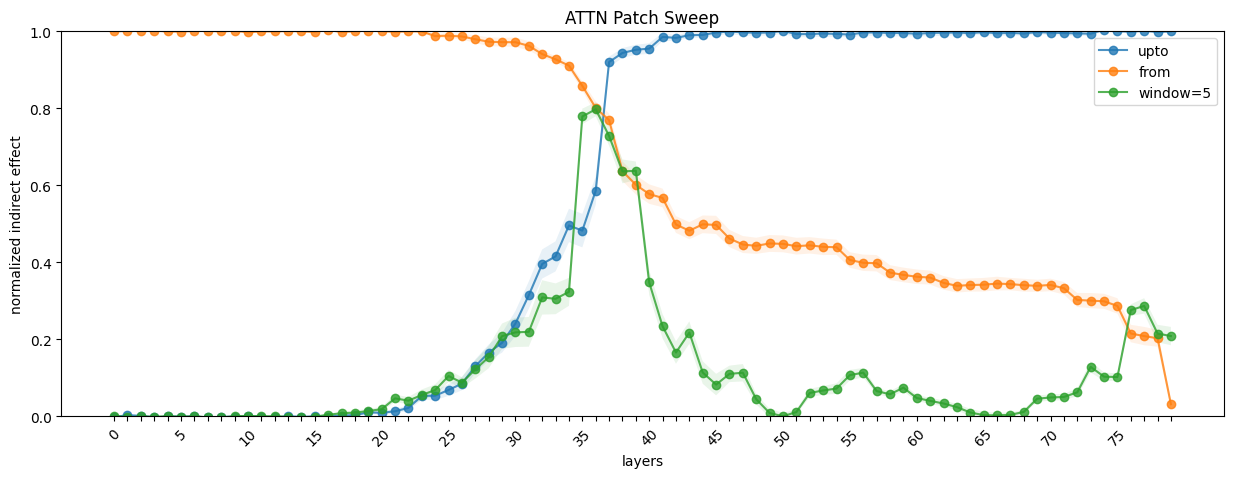

In [43]:
from src.utils.metrics import AggregateMetric


def process_patching_results(
    results: list[dict],
) -> dict[int, AggregateMetric]:
    layers = results[0]["patching_results"].keys()
    layers = [int(l) for l in layers]
    layers = sorted(layers)

    layerwise_results = {l: [] for l in layers}
    for sample in results:
        gold_score = sample["gold_score"]
        corrupt_score = sample["corrupt_score"]
        for layer_idx in layers:
            score = sample["patching_results"][str(layer_idx)]["score"]
            layerwise_results[layer_idx].append(
                (score - corrupt_score) / (gold_score - corrupt_score)
            )

    return {l: AggregateMetric.aggregate(v) for l, v in layerwise_results.items()}


from matplotlib import pyplot as plt
import numpy as np


def plot_results(results, canvas, set_canvas_layout=True, label=None):
    layers, values = zip(*results.items())

    means = np.array([v.mean for v in values])
    stds = np.array([v.stderr for v in values])

    canvas.plot(means, marker="o", linewidth=1.5, label=label, alpha=0.8)
    canvas.fill_between(layers, means - stds, means + stds, alpha=0.1)

    if set_canvas_layout:
        canvas.ylim(bottom=0, top=1)
        # canvas.xticks(layers, rotation=45)
        x_ticks = []
        for i in range(len(layers)):
            if int(i) % 5 == 0:
                x_ticks.append(layers[i])
            else:
                x_ticks.append("")
        canvas.xticks(ticks=layers, labels=x_ticks, rotation=45)
        canvas.title("ATTN Patch Sweep")
        canvas.ylabel("normalized indirect effect")
        canvas.xlabel("layers")


plt.figure(figsize=(15, 5))

processed_results_upto = process_patching_results(res_upto)
plot_results(processed_results_upto, plt, set_canvas_layout=True, label="upto")

processed_results_from = process_patching_results(res_from)
plot_results(processed_results_from, plt, set_canvas_layout=False, label="from")

processed_results_win = process_patching_results(res_win)
plot_results(processed_results_win, plt, set_canvas_layout=False, label="window=5")

plt.legend()

plt.show()

### Running the MLP patching sweep and caching the results

In [44]:
kwargs = dict(
    mt=mt,
    samples=samples,
    token_idx=-1,
    metric="logit",
    coeff=1.0,
    kind="mlp",
)

mlp_res_from = do_patching_sweep(
    **kwargs,
    window="from",
)

with open(os.path.join(first_atten_look_path, "mlp_res_from.json"), "w") as f:
    json.dump(mlp_res_from, f, indent=4, default=str)

mlp_res_upto = do_patching_sweep(
    **kwargs,
    window="upto",
)

with open(os.path.join(first_atten_look_path, "mlp_res_upto.json"), "w") as f:
    json.dump(mlp_res_upto, f, indent=4, default=str)

mlp_res_win = do_patching_sweep(
    **kwargs,
    window=5,
)

with open(os.path.join(first_atten_look_path, "mlp_res_win.json"), "w") as f:
    json.dump(mlp_res_win, f, indent=4, default=str)

0it [00:00, ?it/s]

2025-06-05 13:39:17 __main__ INFO     (1/20)  Grace Wanjiru | James Mwangi => " Ken" | <-- | Fatima Sheikh => " Urban"


/disk/u/arnab/miniconda3/envs/connection/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:631: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/disk/u/arnab/miniconda3/envs/connection/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:636: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


2025-06-05 13:39:27 __main__ INFO     ('Fatima Sheikh', 'Grace Wanjiru') >> answer='Teacher - they are both teachers.<|eot_id|>'
2025-06-05 13:39:35 __main__ INFO     ('James Mwangi', 'Grace Wanjiru') >> clean_answer='Kenyan - they are both Kenyan.<|eot_id|>'
2025-06-05 13:39:35 __main__ INFO     ['30169( Teacher)']
2025-06-05 13:39:36 __main__ INFO     gold_score=17.625
2025-06-05 13:39:38 __main__ INFO     corrupt_score=13.375
2025-06-05 13:39:40 __main__ DEBUG             layer_idx=0, patched_score=16.375
2025-06-05 13:39:41 __main__ DEBUG             layer_idx=1, patched_score=16.375
2025-06-05 13:39:42 __main__ DEBUG             layer_idx=2, patched_score=16.375
2025-06-05 13:39:43 __main__ DEBUG             layer_idx=3, patched_score=16.375
2025-06-05 13:39:45 __main__ DEBUG             layer_idx=4, patched_score=16.375
2025-06-05 13:39:46 __main__ DEBUG             layer_idx=5, patched_score=16.375
2025-06-05 13:39:47 __main__ DEBUG             layer_idx=6, patched_score=16.375


1it [01:48, 108.44s/it]

2025-06-05 13:41:06 __main__ INFO     (2/20)  Rahman Ali | Nasreen Begum => " Bang" | <-- | Takeshi Yamamoto => " Civil"
2025-06-05 13:41:13 __main__ INFO     ('Takeshi Yamamoto', 'Rahman Ali') >> answer='Doctor - they are both doctors.<|eot_id|>'
2025-06-05 13:41:18 __main__ INFO     ('Nasreen Begum', 'Rahman Ali') >> clean_answer='Bangladeshi - they are both Bangladeshi.<|eot_id|>'
2025-06-05 13:41:19 __main__ INFO     ['19150( Doctor)']
2025-06-05 13:41:21 __main__ INFO     gold_score=16.5
2025-06-05 13:41:22 __main__ INFO     corrupt_score=17.125
2025-06-05 13:41:24 __main__ DEBUG             layer_idx=0, patched_score=16.5
2025-06-05 13:41:25 __main__ DEBUG             layer_idx=1, patched_score=16.5
2025-06-05 13:41:26 __main__ DEBUG             layer_idx=2, patched_score=16.5
2025-06-05 13:41:28 __main__ DEBUG             layer_idx=3, patched_score=16.5
2025-06-05 13:41:29 __main__ DEBUG             layer_idx=4, patched_score=16.5
2025-06-05 13:41:30 __main__ DEBUG             l

2it [03:32, 105.88s/it]

2025-06-05 13:42:50 __main__ INFO     (3/20)  Takeshi Yamamoto | Yuki Tanaka => " Japanese" | <-- | Rahman Ali => " Civil"
2025-06-05 13:42:57 __main__ INFO     ('Rahman Ali', 'Takeshi Yamamoto') >> answer='Japanese - they are both Japanese.<|eot_id|>'
2025-06-05 13:43:01 __main__ INFO     ('Yuki Tanaka', 'Takeshi Yamamoto') >> clean_answer='Japanese - they are both Japanese.<|eot_id|>'
2025-06-05 13:43:03 __main__ INFO     ['11002( Japanese)']
2025-06-05 13:43:04 __main__ INFO     gold_score=16.75
2025-06-05 13:43:05 __main__ INFO     corrupt_score=21.125
2025-06-05 13:43:08 __main__ DEBUG             layer_idx=0, patched_score=18.375
2025-06-05 13:43:09 __main__ DEBUG             layer_idx=1, patched_score=18.375
2025-06-05 13:43:10 __main__ DEBUG             layer_idx=2, patched_score=18.375
2025-06-05 13:43:11 __main__ DEBUG             layer_idx=3, patched_score=18.375
2025-06-05 13:43:12 __main__ DEBUG             layer_idx=4, patched_score=18.375
2025-06-05 13:43:14 __main__ DEB

3it [05:15, 104.67s/it]

2025-06-05 13:44:33 __main__ INFO     (4/20)  Anna Schmidt | Hans Mueller => " German" | <-- | Yuki Tanaka => " Marketing"
2025-06-05 13:44:40 __main__ INFO     ('Yuki Tanaka', 'Anna Schmidt') >> answer='Doctor - they are both doctors.<|eot_id|>'
2025-06-05 13:44:43 __main__ INFO     ('Hans Mueller', 'Anna Schmidt') >> clean_answer='German - they are both German.<|eot_id|>'
2025-06-05 13:44:45 __main__ INFO     ['19150( Doctor)']
2025-06-05 13:44:46 __main__ INFO     gold_score=18.875
2025-06-05 13:44:47 __main__ INFO     corrupt_score=18.25
2025-06-05 13:44:49 __main__ DEBUG             layer_idx=0, patched_score=18.875
2025-06-05 13:44:50 __main__ DEBUG             layer_idx=1, patched_score=18.875
2025-06-05 13:44:52 __main__ DEBUG             layer_idx=2, patched_score=18.875
2025-06-05 13:44:53 __main__ DEBUG             layer_idx=3, patched_score=18.875
2025-06-05 13:44:54 __main__ DEBUG             layer_idx=4, patched_score=18.875
2025-06-05 13:44:55 __main__ DEBUG             

4it [06:51, 101.27s/it]

2025-06-05 13:46:09 __main__ INFO     (5/20)  Yuki Tanaka | Takeshi Yamamoto => " Japanese" | <-- | Anna Schmidt => " Marketing"
2025-06-05 13:46:18 __main__ INFO     ('Anna Schmidt', 'Yuki Tanaka') >> answer='Doctor - they are both doctors.<|eot_id|>'
2025-06-05 13:46:22 __main__ INFO     ('Takeshi Yamamoto', 'Yuki Tanaka') >> clean_answer='Japanese - they are both Japanese.<|eot_id|>'
2025-06-05 13:46:22 __main__ INFO     ['19150( Doctor)']
2025-06-05 13:46:24 __main__ INFO     gold_score=19.375
2025-06-05 13:46:25 __main__ INFO     corrupt_score=15.9375
2025-06-05 13:46:27 __main__ DEBUG             layer_idx=0, patched_score=17.5
2025-06-05 13:46:28 __main__ DEBUG             layer_idx=1, patched_score=17.5
2025-06-05 13:46:29 __main__ DEBUG             layer_idx=2, patched_score=17.5
2025-06-05 13:46:31 __main__ DEBUG             layer_idx=3, patched_score=17.5
2025-06-05 13:46:32 __main__ DEBUG             layer_idx=4, patched_score=17.5
2025-06-05 13:46:33 __main__ DEBUG        

5it [08:34, 101.78s/it]

2025-06-05 13:47:52 __main__ INFO     (6/20)  Ayse Kaya | Maria Santos => " Doctor" | <-- | Hans Mueller => " Economist"
2025-06-05 13:48:01 __main__ INFO     ('Hans Mueller', 'Ayse Kaya') >> answer='Doctor - they are both doctors.<|eot_id|>'
2025-06-05 13:48:05 __main__ INFO     ('Maria Santos', 'Ayse Kaya') >> clean_answer='Doctor - they are both doctors.<|eot_id|>'
2025-06-05 13:48:05 __main__ INFO     ['19150( Doctor)']
2025-06-05 13:48:07 __main__ INFO     gold_score=21.25
2025-06-05 13:48:08 __main__ INFO     corrupt_score=19.5
2025-06-05 13:48:10 __main__ DEBUG             layer_idx=0, patched_score=20.625
2025-06-05 13:48:11 __main__ DEBUG             layer_idx=1, patched_score=20.625
2025-06-05 13:48:12 __main__ DEBUG             layer_idx=2, patched_score=20.75
2025-06-05 13:48:14 __main__ DEBUG             layer_idx=3, patched_score=20.625
2025-06-05 13:48:15 __main__ DEBUG             layer_idx=4, patched_score=20.625
2025-06-05 13:48:16 __main__ DEBUG             layer_idx

6it [10:18, 102.62s/it]

2025-06-05 13:49:36 __main__ INFO     (7/20)  Hans Mueller | Anna Schmidt => " German" | <-- | Ayse Kaya => " Economist"
2025-06-05 13:49:43 __main__ INFO     ('Ayse Kaya', 'Hans Mueller') >> answer='German - they are both German.<|eot_id|>'
2025-06-05 13:49:48 __main__ INFO     ('Anna Schmidt', 'Hans Mueller') >> clean_answer='German - they are both German.<|eot_id|>'
2025-06-05 13:49:50 __main__ INFO     ['6063( German)']
2025-06-05 13:49:51 __main__ INFO     gold_score=20.75
2025-06-05 13:49:52 __main__ INFO     corrupt_score=23.5
2025-06-05 13:49:54 __main__ DEBUG             layer_idx=0, patched_score=21.875
2025-06-05 13:49:55 __main__ DEBUG             layer_idx=1, patched_score=21.875
2025-06-05 13:49:56 __main__ DEBUG             layer_idx=2, patched_score=21.875
2025-06-05 13:49:58 __main__ DEBUG             layer_idx=3, patched_score=21.875
2025-06-05 13:49:59 __main__ DEBUG             layer_idx=4, patched_score=21.875
2025-06-05 13:50:00 __main__ DEBUG             layer_id

7it [11:56, 100.92s/it]

2025-06-05 13:51:14 __main__ INFO     (8/20)  Priya Patel | Rajesh Kumar => " Indian" | <-- | Sofia Hernandez => " Graphic"
2025-06-05 13:51:23 __main__ INFO     ('Sofia Hernandez', 'Priya Patel') >> answer='Doctor - they are both doctors.<|eot_id|>'
2025-06-05 13:51:28 __main__ INFO     ('Rajesh Kumar', 'Priya Patel') >> clean_answer='Indian - they are both Indian.<|eot_id|>'
2025-06-05 13:51:28 __main__ INFO     ['19150( Doctor)']
2025-06-05 13:51:29 __main__ INFO     gold_score=18.625
2025-06-05 13:51:30 __main__ INFO     corrupt_score=18.75
2025-06-05 13:51:33 __main__ DEBUG             layer_idx=0, patched_score=17.625
2025-06-05 13:51:34 __main__ DEBUG             layer_idx=1, patched_score=17.625
2025-06-05 13:51:35 __main__ DEBUG             layer_idx=2, patched_score=17.625
2025-06-05 13:51:36 __main__ DEBUG             layer_idx=3, patched_score=17.625
2025-06-05 13:51:37 __main__ DEBUG             layer_idx=4, patched_score=17.625
2025-06-05 13:51:39 __main__ DEBUG          

8it [13:39, 101.65s/it]

2025-06-05 13:52:57 __main__ INFO     (9/20)  Sofia Hernandez | Carlos Rodriguez => " Mexican" | <-- | Priya Patel => " Graphic"
2025-06-05 13:53:06 __main__ INFO     ('Priya Patel', 'Sofia Hernandez') >> answer='Doctor - they are both doctors.<|eot_id|>'
2025-06-05 13:53:10 __main__ INFO     ('Carlos Rodriguez', 'Sofia Hernandez') >> clean_answer='Spanish - they are both Spanish.<|eot_id|>'
2025-06-05 13:53:11 __main__ INFO     ['19150( Doctor)']
2025-06-05 13:53:12 __main__ INFO     gold_score=19.125
2025-06-05 13:53:13 __main__ INFO     corrupt_score=18.125
2025-06-05 13:53:15 __main__ DEBUG             layer_idx=0, patched_score=18.75
2025-06-05 13:53:16 __main__ DEBUG             layer_idx=1, patched_score=18.875
2025-06-05 13:53:17 __main__ DEBUG             layer_idx=2, patched_score=18.875
2025-06-05 13:53:19 __main__ DEBUG             layer_idx=3, patched_score=18.75
2025-06-05 13:53:20 __main__ DEBUG             layer_idx=4, patched_score=18.875
2025-06-05 13:53:21 __main__ D

9it [15:17, 100.52s/it]

2025-06-05 13:54:35 __main__ INFO     (10/20)  Zahra Hosseini | Ali Rezaei => " Iranian" | <-- | Ahmed Hassan => " Pilot"
2025-06-05 13:54:44 __main__ INFO     ('Ahmed Hassan', 'Zahra Hosseini') >> answer='Iranian - they are both Iranian.<|eot_id|>'
2025-06-05 13:54:51 __main__ INFO     ('Ali Rezaei', 'Zahra Hosseini') >> clean_answer='Iranian - they are both Iranian.<|eot_id|>'
2025-06-05 13:54:52 __main__ INFO     ['28501( Iranian)']
2025-06-05 13:54:53 __main__ INFO     gold_score=21.25
2025-06-05 13:54:54 __main__ INFO     corrupt_score=22.375
2025-06-05 13:54:56 __main__ DEBUG             layer_idx=0, patched_score=22.75
2025-06-05 13:54:58 __main__ DEBUG             layer_idx=1, patched_score=22.75
2025-06-05 13:54:59 __main__ DEBUG             layer_idx=2, patched_score=22.75
2025-06-05 13:55:00 __main__ DEBUG             layer_idx=3, patched_score=22.75
2025-06-05 13:55:01 __main__ DEBUG             layer_idx=4, patched_score=22.75
2025-06-05 13:55:02 __main__ DEBUG            

10it [17:04, 102.60s/it]

2025-06-05 13:56:22 __main__ INFO     (11/20)  Ahmed Hassan | Layla Mahmoud => " Egyptian" | <-- | Zahra Hosseini => " Pilot"
2025-06-05 13:56:30 __main__ INFO     ('Zahra Hosseini', 'Ahmed Hassan') >> answer='Egyptian - they are both Egyptian.<|eot_id|>'
2025-06-05 13:56:34 __main__ INFO     ('Layla Mahmoud', 'Ahmed Hassan') >> clean_answer='Egyptian - they are both Egyptian.<|eot_id|>'
2025-06-05 13:56:35 __main__ INFO     ['33589( Egyptian)']
2025-06-05 13:56:36 __main__ INFO     gold_score=19.5
2025-06-05 13:56:37 __main__ INFO     corrupt_score=21.125
2025-06-05 13:56:40 __main__ DEBUG             layer_idx=0, patched_score=20.625
2025-06-05 13:56:41 __main__ DEBUG             layer_idx=1, patched_score=20.625
2025-06-05 13:56:42 __main__ DEBUG             layer_idx=2, patched_score=20.625
2025-06-05 13:56:43 __main__ DEBUG             layer_idx=3, patched_score=20.625
2025-06-05 13:56:44 __main__ DEBUG             layer_idx=4, patched_score=20.625
2025-06-05 13:56:46 __main__ DEB

11it [18:42, 101.11s/it]

2025-06-05 13:58:00 __main__ INFO     (12/20)  Kwame Mensah | Rahman Ali => " Doctor" | <-- | Min-jun Park => " Ge"
2025-06-05 13:58:09 __main__ INFO     ('Min-jun Park', 'Kwame Mensah') >> answer='Doctor - they are both doctors.<|eot_id|>'
2025-06-05 13:58:13 __main__ INFO     ('Rahman Ali', 'Kwame Mensah') >> clean_answer='Ghanaian - they are both Ghanaian.<|eot_id|>'
2025-06-05 13:58:14 __main__ INFO     ['19150( Doctor)']
2025-06-05 13:58:15 __main__ INFO     gold_score=17.375
2025-06-05 13:58:16 __main__ INFO     corrupt_score=17.75
2025-06-05 13:58:20 __main__ DEBUG             layer_idx=0, patched_score=17.625
2025-06-05 13:58:21 __main__ DEBUG             layer_idx=1, patched_score=17.625
2025-06-05 13:58:22 __main__ DEBUG             layer_idx=2, patched_score=17.625
2025-06-05 13:58:24 __main__ DEBUG             layer_idx=3, patched_score=17.625
2025-06-05 13:58:25 __main__ DEBUG             layer_idx=4, patched_score=17.625
2025-06-05 13:58:26 __main__ DEBUG             laye

12it [20:28, 102.63s/it]

2025-06-05 13:59:46 __main__ INFO     (13/20)  Tran Thi Mai | Nguyen Van Duc => " Vietnamese" | <-- | Marco Rossi => " Architect"
2025-06-05 13:59:54 __main__ INFO     ('Marco Rossi', 'Tran Thi Mai') >> answer='Doctor - they are both doctors.<|eot_id|>'
2025-06-05 13:59:58 __main__ INFO     ('Nguyen Van Duc', 'Tran Thi Mai') >> clean_answer='Vietnamese - they are both Vietnamese.<|eot_id|>'
2025-06-05 13:59:58 __main__ INFO     ['49577( Vietnamese)']
2025-06-05 13:59:59 __main__ INFO     gold_score=18.125
2025-06-05 14:00:00 __main__ INFO     corrupt_score=21.375
2025-06-05 14:00:03 __main__ DEBUG             layer_idx=0, patched_score=18.75
2025-06-05 14:00:04 __main__ DEBUG             layer_idx=1, patched_score=18.75
2025-06-05 14:00:05 __main__ DEBUG             layer_idx=2, patched_score=18.75
2025-06-05 14:00:06 __main__ DEBUG             layer_idx=3, patched_score=18.75
2025-06-05 14:00:07 __main__ DEBUG             layer_idx=4, patched_score=18.75
2025-06-05 14:00:09 __main__ D

13it [22:10, 102.45s/it]

2025-06-05 14:01:28 __main__ INFO     (14/20)  Marco Rossi | Giulia Romano => " Italian" | <-- | Tran Thi Mai => " Architect"
2025-06-05 14:01:36 __main__ INFO     ('Tran Thi Mai', 'Marco Rossi') >> answer='Doctor - they are both doctors.<|eot_id|>'
2025-06-05 14:01:40 __main__ INFO     ('Giulia Romano', 'Marco Rossi') >> clean_answer='Italian - they are both Italian.<|eot_id|>'
2025-06-05 14:01:41 __main__ INFO     ['19150( Doctor)']
2025-06-05 14:01:42 __main__ INFO     gold_score=18.375
2025-06-05 14:01:43 __main__ INFO     corrupt_score=16.75
2025-06-05 14:01:45 __main__ DEBUG             layer_idx=0, patched_score=17.5
2025-06-05 14:01:46 __main__ DEBUG             layer_idx=1, patched_score=17.5
2025-06-05 14:01:47 __main__ DEBUG             layer_idx=2, patched_score=17.5
2025-06-05 14:01:49 __main__ DEBUG             layer_idx=3, patched_score=17.5
2025-06-05 14:01:50 __main__ DEBUG             layer_idx=4, patched_score=17.375
2025-06-05 14:01:51 __main__ DEBUG             lay

14it [23:53, 102.60s/it]

2025-06-05 14:03:11 __main__ INFO     (15/20)  Giulia Romano | Marco Rossi => " Italian" | <-- | Akosua Boateng => " Data"
2025-06-05 14:03:19 __main__ INFO     ('Akosua Boateng', 'Giulia Romano') >> answer='Doctor - they are both doctors.<|eot_id|>'
2025-06-05 14:03:24 __main__ INFO     ('Marco Rossi', 'Giulia Romano') >> clean_answer='Italian - they are both Italian.<|eot_id|>'
2025-06-05 14:03:25 __main__ INFO     ['19150( Doctor)']
2025-06-05 14:03:26 __main__ INFO     gold_score=17.625
2025-06-05 14:03:28 __main__ INFO     corrupt_score=16.625
2025-06-05 14:03:30 __main__ DEBUG             layer_idx=0, patched_score=16.5
2025-06-05 14:03:31 __main__ DEBUG             layer_idx=1, patched_score=16.5
2025-06-05 14:03:32 __main__ DEBUG             layer_idx=2, patched_score=16.5
2025-06-05 14:03:34 __main__ DEBUG             layer_idx=3, patched_score=16.5
2025-06-05 14:03:35 __main__ DEBUG             layer_idx=4, patched_score=16.5
2025-06-05 14:03:36 __main__ DEBUG             lay

15it [25:39, 103.62s/it]

2025-06-05 14:04:57 __main__ INFO     (16/20)  Alexandru Popescu | Elena Ionescu => " Romanian" | <-- | David Thompson => " Environmental"
2025-06-05 14:05:04 __main__ INFO     ('David Thompson', 'Alexandru Popescu') >> answer='Romanian - they are both Romanian.<|eot_id|>'
2025-06-05 14:05:09 __main__ INFO     ('Elena Ionescu', 'Alexandru Popescu') >> clean_answer='Romanian - they are both Romanian.<|eot_id|>'
2025-06-05 14:05:10 __main__ INFO     ['74697( Romanian)']
2025-06-05 14:05:12 __main__ INFO     gold_score=16.625
2025-06-05 14:05:13 __main__ INFO     corrupt_score=20.375
2025-06-05 14:05:15 __main__ DEBUG             layer_idx=0, patched_score=18.5
2025-06-05 14:05:16 __main__ DEBUG             layer_idx=1, patched_score=18.5
2025-06-05 14:05:17 __main__ DEBUG             layer_idx=2, patched_score=18.5
2025-06-05 14:05:19 __main__ DEBUG             layer_idx=3, patched_score=18.5
2025-06-05 14:05:20 __main__ DEBUG             layer_idx=4, patched_score=18.5
2025-06-05 14:05:

16it [27:26, 104.78s/it]

2025-06-05 14:06:44 __main__ INFO     (17/20)  David Thompson | Sarah MacDonald => " McGill" | <-- | Alexandru Popescu => " Environmental"
2025-06-05 14:06:51 __main__ INFO     ('Alexandru Popescu', 'David Thompson') >> answer='Doctor - they are both doctors.<|eot_id|>'
2025-06-05 14:06:56 __main__ INFO     ('Sarah MacDonald', 'David Thompson') >> clean_answer='Canadian - they are both Canadian.<|eot_id|>'
2025-06-05 14:06:58 __main__ INFO     ['19150( Doctor)']
2025-06-05 14:06:59 __main__ INFO     gold_score=16.5
2025-06-05 14:07:00 __main__ INFO     corrupt_score=18.25
2025-06-05 14:07:02 __main__ DEBUG             layer_idx=0, patched_score=16.5
2025-06-05 14:07:03 __main__ DEBUG             layer_idx=1, patched_score=16.5
2025-06-05 14:07:05 __main__ DEBUG             layer_idx=2, patched_score=16.5
2025-06-05 14:07:06 __main__ DEBUG             layer_idx=3, patched_score=16.5
2025-06-05 14:07:07 __main__ DEBUG             layer_idx=4, patched_score=16.5
2025-06-05 14:07:08 __main

17it [29:09, 104.08s/it]

2025-06-05 14:08:27 __main__ INFO     (18/20)  António Costa | Isabel Ferreira => " Portuguese" | <-- | Jack Wilson => " Software"
2025-06-05 14:08:35 __main__ INFO     ('Jack Wilson', 'António Costa') >> answer='Politician - they are both politicians.<|eot_id|>'
2025-06-05 14:08:40 __main__ INFO     ('Isabel Ferreira', 'António Costa') >> clean_answer='Portuguese - they are both Portuguese.<|eot_id|>'
2025-06-05 14:08:42 __main__ INFO     ['16307( Polit)']
2025-06-05 14:08:43 __main__ INFO     gold_score=18.0
2025-06-05 14:08:44 __main__ INFO     corrupt_score=14.5625
2025-06-05 14:08:47 __main__ DEBUG             layer_idx=0, patched_score=17.375
2025-06-05 14:08:48 __main__ DEBUG             layer_idx=1, patched_score=17.375
2025-06-05 14:08:49 __main__ DEBUG             layer_idx=2, patched_score=17.375
2025-06-05 14:08:50 __main__ DEBUG             layer_idx=3, patched_score=17.375
2025-06-05 14:08:52 __main__ DEBUG             layer_idx=4, patched_score=17.375
2025-06-05 14:08:53

18it [30:58, 105.72s/it]

2025-06-05 14:10:16 __main__ INFO     (19/20)  Astrid Lindgren | Erik Andersson => " Swedish" | <-- | Lisa van der Berg => " Web"
2025-06-05 14:10:21 __main__ INFO     ('Lisa van der Berg', 'Astrid Lindgren') >> answer='Swedish - they are both Swedish.<|eot_id|>'
2025-06-05 14:10:27 __main__ INFO     ('Erik Andersson', 'Astrid Lindgren') >> clean_answer='Swedish - they are both Swedish.<|eot_id|>'
2025-06-05 14:10:28 __main__ INFO     ['31209( Swedish)']
2025-06-05 14:10:29 __main__ INFO     gold_score=21.125
2025-06-05 14:10:31 __main__ INFO     corrupt_score=24.5
2025-06-05 14:10:33 __main__ DEBUG             layer_idx=0, patched_score=21.625
2025-06-05 14:10:34 __main__ DEBUG             layer_idx=1, patched_score=21.625
2025-06-05 14:10:35 __main__ DEBUG             layer_idx=2, patched_score=21.625
2025-06-05 14:10:37 __main__ DEBUG             layer_idx=3, patched_score=21.625
2025-06-05 14:10:38 __main__ DEBUG             layer_idx=4, patched_score=21.625
2025-06-05 14:10:39 __m

19it [32:44, 105.69s/it]

2025-06-05 14:12:02 __main__ INFO     (20/20)  Rodrigo Gonzalez | Camila Torres => " Chile" | <-- | Maria dela Rosa => " Mechanical"
2025-06-05 14:12:08 __main__ INFO     ('Maria dela Rosa', 'Rodrigo Gonzalez') >> answer='Doctor - they are both doctors.<|eot_id|>'
2025-06-05 14:12:18 __main__ INFO     ('Camila Torres', 'Rodrigo Gonzalez') >> clean_answer='Argentine - they are both Argentine.<|eot_id|>'
2025-06-05 14:12:19 __main__ INFO     ['19150( Doctor)']
2025-06-05 14:12:20 __main__ INFO     gold_score=18.375
2025-06-05 14:12:21 __main__ INFO     corrupt_score=17.375
2025-06-05 14:12:23 __main__ DEBUG             layer_idx=0, patched_score=18.375
2025-06-05 14:12:24 __main__ DEBUG             layer_idx=1, patched_score=18.375
2025-06-05 14:12:26 __main__ DEBUG             layer_idx=2, patched_score=18.375
2025-06-05 14:12:27 __main__ DEBUG             layer_idx=3, patched_score=18.375
2025-06-05 14:12:28 __main__ DEBUG             layer_idx=4, patched_score=18.375
2025-06-05 14:12:

20it [34:29, 103.46s/it]
0it [00:00, ?it/s]

2025-06-05 14:13:47 __main__ INFO     (1/20)  Grace Wanjiru | James Mwangi => " Ken" | <-- | Fatima Sheikh => " Urban"
2025-06-05 14:13:52 __main__ INFO     ('Fatima Sheikh', 'Grace Wanjiru') >> answer='Teacher - they are both teachers.<|eot_id|>'
2025-06-05 14:14:03 __main__ INFO     ('James Mwangi', 'Grace Wanjiru') >> clean_answer='Kenyan - they are both Kenyan.<|eot_id|>'
2025-06-05 14:14:05 __main__ INFO     ['30169( Teacher)']
2025-06-05 14:14:06 __main__ INFO     gold_score=17.625
2025-06-05 14:14:07 __main__ INFO     corrupt_score=13.375
2025-06-05 14:14:09 __main__ DEBUG             layer_idx=0, patched_score=13.3125
2025-06-05 14:14:10 __main__ DEBUG             layer_idx=1, patched_score=13.375
2025-06-05 14:14:11 __main__ DEBUG             layer_idx=2, patched_score=13.375
2025-06-05 14:14:12 __main__ DEBUG             layer_idx=3, patched_score=13.375
2025-06-05 14:14:14 __main__ DEBUG             layer_idx=4, patched_score=13.375
2025-06-05 14:14:15 __main__ DEBUG        

1it [01:43, 103.98s/it]

2025-06-05 14:15:31 __main__ INFO     (2/20)  Rahman Ali | Nasreen Begum => " Bang" | <-- | Takeshi Yamamoto => " Civil"
2025-06-05 14:15:39 __main__ INFO     ('Takeshi Yamamoto', 'Rahman Ali') >> answer='Doctor - they are both doctors.<|eot_id|>'
2025-06-05 14:15:53 __main__ INFO     ('Nasreen Begum', 'Rahman Ali') >> clean_answer='Bangladeshi - they are both Bangladeshi.<|eot_id|>'
2025-06-05 14:15:54 __main__ INFO     ['19150( Doctor)']
2025-06-05 14:15:56 __main__ INFO     gold_score=16.5
2025-06-05 14:15:57 __main__ INFO     corrupt_score=17.125
2025-06-05 14:15:59 __main__ DEBUG             layer_idx=0, patched_score=17.0
2025-06-05 14:16:00 __main__ DEBUG             layer_idx=1, patched_score=17.0
2025-06-05 14:16:01 __main__ DEBUG             layer_idx=2, patched_score=17.0
2025-06-05 14:16:02 __main__ DEBUG             layer_idx=3, patched_score=17.0
2025-06-05 14:16:02 __main__ DEBUG             layer_idx=4, patched_score=17.125
2025-06-05 14:16:04 __main__ DEBUG            

2it [03:35, 108.21s/it]

2025-06-05 14:17:22 __main__ INFO     (3/20)  Takeshi Yamamoto | Yuki Tanaka => " Japanese" | <-- | Rahman Ali => " Civil"
2025-06-05 14:17:31 __main__ INFO     ('Rahman Ali', 'Takeshi Yamamoto') >> answer='Japanese - they are both Japanese.<|eot_id|>'
2025-06-05 14:17:41 __main__ INFO     ('Yuki Tanaka', 'Takeshi Yamamoto') >> clean_answer='Japanese - they are both Japanese.<|eot_id|>'
2025-06-05 14:17:42 __main__ INFO     ['11002( Japanese)']
2025-06-05 14:17:44 __main__ INFO     gold_score=16.75
2025-06-05 14:17:45 __main__ INFO     corrupt_score=21.125
2025-06-05 14:17:46 __main__ DEBUG             layer_idx=0, patched_score=21.125
2025-06-05 14:17:47 __main__ DEBUG             layer_idx=1, patched_score=21.125
2025-06-05 14:17:48 __main__ DEBUG             layer_idx=2, patched_score=21.125
2025-06-05 14:17:49 __main__ DEBUG             layer_idx=3, patched_score=21.125
2025-06-05 14:17:49 __main__ DEBUG             layer_idx=4, patched_score=21.125
2025-06-05 14:17:49 __main__ DEB

3it [05:22, 107.98s/it]

2025-06-05 14:19:10 __main__ INFO     (4/20)  Anna Schmidt | Hans Mueller => " German" | <-- | Yuki Tanaka => " Marketing"
2025-06-05 14:19:19 __main__ INFO     ('Yuki Tanaka', 'Anna Schmidt') >> answer='Doctor - they are both doctors.<|eot_id|>'
2025-06-05 14:19:28 __main__ INFO     ('Hans Mueller', 'Anna Schmidt') >> clean_answer='German - they are both German.<|eot_id|>'
2025-06-05 14:19:28 __main__ INFO     ['19150( Doctor)']
2025-06-05 14:19:29 __main__ INFO     gold_score=18.875
2025-06-05 14:19:30 __main__ INFO     corrupt_score=18.25
2025-06-05 14:19:32 __main__ DEBUG             layer_idx=0, patched_score=18.25
2025-06-05 14:19:32 __main__ DEBUG             layer_idx=1, patched_score=18.25
2025-06-05 14:19:32 __main__ DEBUG             layer_idx=2, patched_score=18.25
2025-06-05 14:19:33 __main__ DEBUG             layer_idx=3, patched_score=18.25
2025-06-05 14:19:34 __main__ DEBUG             layer_idx=4, patched_score=18.25
2025-06-05 14:19:35 __main__ DEBUG             layer

4it [07:02, 104.83s/it]

2025-06-05 14:20:50 __main__ INFO     (5/20)  Yuki Tanaka | Takeshi Yamamoto => " Japanese" | <-- | Anna Schmidt => " Marketing"
2025-06-05 14:20:59 __main__ INFO     ('Anna Schmidt', 'Yuki Tanaka') >> answer='Doctor - they are both doctors.<|eot_id|>'
2025-06-05 14:21:09 __main__ INFO     ('Takeshi Yamamoto', 'Yuki Tanaka') >> clean_answer='Japanese - they are both Japanese.<|eot_id|>'
2025-06-05 14:21:10 __main__ INFO     ['19150( Doctor)']
2025-06-05 14:21:11 __main__ INFO     gold_score=19.375
2025-06-05 14:21:11 __main__ INFO     corrupt_score=15.9375
2025-06-05 14:21:12 __main__ DEBUG             layer_idx=0, patched_score=15.875
2025-06-05 14:21:12 __main__ DEBUG             layer_idx=1, patched_score=15.875
2025-06-05 14:21:13 __main__ DEBUG             layer_idx=2, patched_score=15.9375
2025-06-05 14:21:14 __main__ DEBUG             layer_idx=3, patched_score=15.9375
2025-06-05 14:21:15 __main__ DEBUG             layer_idx=4, patched_score=15.875
2025-06-05 14:21:16 __main__ D

5it [08:49, 105.54s/it]

2025-06-05 14:22:36 __main__ INFO     (6/20)  Ayse Kaya | Maria Santos => " Doctor" | <-- | Hans Mueller => " Economist"
2025-06-05 14:22:46 __main__ INFO     ('Hans Mueller', 'Ayse Kaya') >> answer='Doctor - they are both doctors.<|eot_id|>'
2025-06-05 14:22:53 __main__ INFO     ('Maria Santos', 'Ayse Kaya') >> clean_answer='Doctor - they are both doctors.<|eot_id|>'
2025-06-05 14:22:54 __main__ INFO     ['19150( Doctor)']
2025-06-05 14:22:56 __main__ INFO     gold_score=21.25
2025-06-05 14:22:56 __main__ INFO     corrupt_score=19.5
2025-06-05 14:22:57 __main__ DEBUG             layer_idx=0, patched_score=19.5
2025-06-05 14:22:58 __main__ DEBUG             layer_idx=1, patched_score=19.5
2025-06-05 14:22:59 __main__ DEBUG             layer_idx=2, patched_score=19.375
2025-06-05 14:23:00 __main__ DEBUG             layer_idx=3, patched_score=19.5
2025-06-05 14:23:01 __main__ DEBUG             layer_idx=4, patched_score=19.5
2025-06-05 14:23:02 __main__ DEBUG             layer_idx=5, pat

6it [10:35, 105.61s/it]

2025-06-05 14:24:22 __main__ INFO     (7/20)  Hans Mueller | Anna Schmidt => " German" | <-- | Ayse Kaya => " Economist"
2025-06-05 14:24:32 __main__ INFO     ('Ayse Kaya', 'Hans Mueller') >> answer='German - they are both German.<|eot_id|>'
2025-06-05 14:24:39 __main__ INFO     ('Anna Schmidt', 'Hans Mueller') >> clean_answer='German - they are both German.<|eot_id|>'
2025-06-05 14:24:39 __main__ INFO     ['6063( German)']
2025-06-05 14:24:41 __main__ INFO     gold_score=20.75
2025-06-05 14:24:42 __main__ INFO     corrupt_score=23.5
2025-06-05 14:24:44 __main__ DEBUG             layer_idx=0, patched_score=23.5
2025-06-05 14:24:45 __main__ DEBUG             layer_idx=1, patched_score=23.5
2025-06-05 14:24:46 __main__ DEBUG             layer_idx=2, patched_score=23.5
2025-06-05 14:24:47 __main__ DEBUG             layer_idx=3, patched_score=23.5
2025-06-05 14:24:48 __main__ DEBUG             layer_idx=4, patched_score=23.5
2025-06-05 14:24:49 __main__ DEBUG             layer_idx=5, patch

7it [12:17, 104.55s/it]

2025-06-05 14:26:04 __main__ INFO     (8/20)  Priya Patel | Rajesh Kumar => " Indian" | <-- | Sofia Hernandez => " Graphic"
2025-06-05 14:26:14 __main__ INFO     ('Sofia Hernandez', 'Priya Patel') >> answer='Doctor - they are both doctors.<|eot_id|>'
2025-06-05 14:26:21 __main__ INFO     ('Rajesh Kumar', 'Priya Patel') >> clean_answer='Indian - they are both Indian.<|eot_id|>'
2025-06-05 14:26:21 __main__ INFO     ['19150( Doctor)']
2025-06-05 14:26:22 __main__ INFO     gold_score=18.625
2025-06-05 14:26:23 __main__ INFO     corrupt_score=18.75
2025-06-05 14:26:26 __main__ DEBUG             layer_idx=0, patched_score=18.75
2025-06-05 14:26:27 __main__ DEBUG             layer_idx=1, patched_score=18.75
2025-06-05 14:26:28 __main__ DEBUG             layer_idx=2, patched_score=18.75
2025-06-05 14:26:29 __main__ DEBUG             layer_idx=3, patched_score=18.75
2025-06-05 14:26:30 __main__ DEBUG             layer_idx=4, patched_score=18.75
2025-06-05 14:26:31 __main__ DEBUG             la

8it [14:03, 104.82s/it]

2025-06-05 14:27:50 __main__ INFO     (9/20)  Sofia Hernandez | Carlos Rodriguez => " Mexican" | <-- | Priya Patel => " Graphic"
2025-06-05 14:27:59 __main__ INFO     ('Priya Patel', 'Sofia Hernandez') >> answer='Doctor - they are both doctors.<|eot_id|>'
2025-06-05 14:28:04 __main__ INFO     ('Carlos Rodriguez', 'Sofia Hernandez') >> clean_answer='Spanish - they are both Spanish.<|eot_id|>'
2025-06-05 14:28:04 __main__ INFO     ['19150( Doctor)']
2025-06-05 14:28:05 __main__ INFO     gold_score=19.125
2025-06-05 14:28:06 __main__ INFO     corrupt_score=18.125
2025-06-05 14:28:08 __main__ DEBUG             layer_idx=0, patched_score=18.125
2025-06-05 14:28:09 __main__ DEBUG             layer_idx=1, patched_score=18.125
2025-06-05 14:28:11 __main__ DEBUG             layer_idx=2, patched_score=18.125
2025-06-05 14:28:12 __main__ DEBUG             layer_idx=3, patched_score=18.125
2025-06-05 14:28:13 __main__ DEBUG             layer_idx=4, patched_score=18.125
2025-06-05 14:28:14 __main__

9it [15:41, 102.65s/it]

2025-06-05 14:29:28 __main__ INFO     (10/20)  Zahra Hosseini | Ali Rezaei => " Iranian" | <-- | Ahmed Hassan => " Pilot"
2025-06-05 14:29:37 __main__ INFO     ('Ahmed Hassan', 'Zahra Hosseini') >> answer='Iranian - they are both Iranian.<|eot_id|>'
2025-06-05 14:29:45 __main__ INFO     ('Ali Rezaei', 'Zahra Hosseini') >> clean_answer='Iranian - they are both Iranian.<|eot_id|>'
2025-06-05 14:29:45 __main__ INFO     ['28501( Iranian)']
2025-06-05 14:29:46 __main__ INFO     gold_score=21.25
2025-06-05 14:29:48 __main__ INFO     corrupt_score=22.375
2025-06-05 14:29:50 __main__ DEBUG             layer_idx=0, patched_score=22.375
2025-06-05 14:29:51 __main__ DEBUG             layer_idx=1, patched_score=22.375
2025-06-05 14:29:52 __main__ DEBUG             layer_idx=2, patched_score=22.375
2025-06-05 14:29:53 __main__ DEBUG             layer_idx=3, patched_score=22.375
2025-06-05 14:29:54 __main__ DEBUG             layer_idx=4, patched_score=22.375
2025-06-05 14:29:56 __main__ DEBUG       

10it [17:28, 104.21s/it]

2025-06-05 14:31:15 __main__ INFO     (11/20)  Ahmed Hassan | Layla Mahmoud => " Egyptian" | <-- | Zahra Hosseini => " Pilot"
2025-06-05 14:31:23 __main__ INFO     ('Zahra Hosseini', 'Ahmed Hassan') >> answer='Egyptian - they are both Egyptian.<|eot_id|>'
2025-06-05 14:31:27 __main__ INFO     ('Layla Mahmoud', 'Ahmed Hassan') >> clean_answer='Egyptian - they are both Egyptian.<|eot_id|>'
2025-06-05 14:31:28 __main__ INFO     ['33589( Egyptian)']
2025-06-05 14:31:29 __main__ INFO     gold_score=19.5
2025-06-05 14:31:30 __main__ INFO     corrupt_score=21.125
2025-06-05 14:31:32 __main__ DEBUG             layer_idx=0, patched_score=21.125
2025-06-05 14:31:33 __main__ DEBUG             layer_idx=1, patched_score=21.125
2025-06-05 14:31:34 __main__ DEBUG             layer_idx=2, patched_score=21.125
2025-06-05 14:31:35 __main__ DEBUG             layer_idx=3, patched_score=21.125
2025-06-05 14:31:36 __main__ DEBUG             layer_idx=4, patched_score=21.125
2025-06-05 14:31:38 __main__ DEB

11it [19:03, 101.29s/it]

2025-06-05 14:32:50 __main__ INFO     (12/20)  Kwame Mensah | Rahman Ali => " Doctor" | <-- | Min-jun Park => " Ge"
2025-06-05 14:33:00 __main__ INFO     ('Min-jun Park', 'Kwame Mensah') >> answer='Doctor - they are both doctors.<|eot_id|>'
2025-06-05 14:33:08 __main__ INFO     ('Rahman Ali', 'Kwame Mensah') >> clean_answer='Ghanaian - they are both Ghanaian.<|eot_id|>'
2025-06-05 14:33:10 __main__ INFO     ['19150( Doctor)']
2025-06-05 14:33:10 __main__ INFO     gold_score=17.375
2025-06-05 14:33:11 __main__ INFO     corrupt_score=17.75
2025-06-05 14:33:13 __main__ DEBUG             layer_idx=0, patched_score=17.625
2025-06-05 14:33:14 __main__ DEBUG             layer_idx=1, patched_score=17.625
2025-06-05 14:33:16 __main__ DEBUG             layer_idx=2, patched_score=17.75
2025-06-05 14:33:17 __main__ DEBUG             layer_idx=3, patched_score=17.625
2025-06-05 14:33:18 __main__ DEBUG             layer_idx=4, patched_score=17.625
2025-06-05 14:33:19 __main__ DEBUG             layer

12it [20:31, 97.39s/it] 

2025-06-05 14:34:19 __main__ INFO     (13/20)  Tran Thi Mai | Nguyen Van Duc => " Vietnamese" | <-- | Marco Rossi => " Architect"
2025-06-05 14:34:20 __main__ INFO     ('Marco Rossi', 'Tran Thi Mai') >> answer='Doctor - they are both doctors.<|eot_id|>'
2025-06-05 14:34:21 __main__ INFO     ('Nguyen Van Duc', 'Tran Thi Mai') >> clean_answer='Vietnamese - they are both Vietnamese.<|eot_id|>'
2025-06-05 14:34:21 __main__ INFO     ['49577( Vietnamese)']
2025-06-05 14:34:22 __main__ INFO     gold_score=18.125
2025-06-05 14:34:22 __main__ INFO     corrupt_score=21.375
2025-06-05 14:34:22 __main__ DEBUG             layer_idx=0, patched_score=21.5
2025-06-05 14:34:23 __main__ DEBUG             layer_idx=1, patched_score=21.375
2025-06-05 14:34:23 __main__ DEBUG             layer_idx=2, patched_score=21.375
2025-06-05 14:34:23 __main__ DEBUG             layer_idx=3, patched_score=21.375
2025-06-05 14:34:23 __main__ DEBUG             layer_idx=4, patched_score=21.375
2025-06-05 14:34:24 __main_

13it [20:58, 76.04s/it]

2025-06-05 14:34:46 __main__ INFO     (14/20)  Marco Rossi | Giulia Romano => " Italian" | <-- | Tran Thi Mai => " Architect"
2025-06-05 14:34:47 __main__ INFO     ('Tran Thi Mai', 'Marco Rossi') >> answer='Doctor - they are both doctors.<|eot_id|>'
2025-06-05 14:34:48 __main__ INFO     ('Giulia Romano', 'Marco Rossi') >> clean_answer='Italian - they are both Italian.<|eot_id|>'
2025-06-05 14:34:49 __main__ INFO     ['19150( Doctor)']
2025-06-05 14:34:49 __main__ INFO     gold_score=18.375
2025-06-05 14:34:49 __main__ INFO     corrupt_score=16.75
2025-06-05 14:34:50 __main__ DEBUG             layer_idx=0, patched_score=16.75
2025-06-05 14:34:50 __main__ DEBUG             layer_idx=1, patched_score=16.75
2025-06-05 14:34:50 __main__ DEBUG             layer_idx=2, patched_score=16.75
2025-06-05 14:34:50 __main__ DEBUG             layer_idx=3, patched_score=16.75
2025-06-05 14:34:51 __main__ DEBUG             layer_idx=4, patched_score=16.75
2025-06-05 14:34:51 __main__ DEBUG             

14it [21:27, 61.75s/it]

2025-06-05 14:35:14 __main__ INFO     (15/20)  Giulia Romano | Marco Rossi => " Italian" | <-- | Akosua Boateng => " Data"
2025-06-05 14:35:15 __main__ INFO     ('Akosua Boateng', 'Giulia Romano') >> answer='Doctor - they are both doctors.<|eot_id|>'
2025-06-05 14:35:16 __main__ INFO     ('Marco Rossi', 'Giulia Romano') >> clean_answer='Italian - they are both Italian.<|eot_id|>'
2025-06-05 14:35:17 __main__ INFO     ['19150( Doctor)']
2025-06-05 14:35:17 __main__ INFO     gold_score=17.625
2025-06-05 14:35:18 __main__ INFO     corrupt_score=16.625
2025-06-05 14:35:18 __main__ DEBUG             layer_idx=0, patched_score=16.625
2025-06-05 14:35:19 __main__ DEBUG             layer_idx=1, patched_score=16.625
2025-06-05 14:35:19 __main__ DEBUG             layer_idx=2, patched_score=16.625
2025-06-05 14:35:19 __main__ DEBUG             layer_idx=3, patched_score=16.625
2025-06-05 14:35:19 __main__ DEBUG             layer_idx=4, patched_score=16.625
2025-06-05 14:35:20 __main__ DEBUG      

15it [21:56, 51.78s/it]

2025-06-05 14:35:43 __main__ INFO     (16/20)  Alexandru Popescu | Elena Ionescu => " Romanian" | <-- | David Thompson => " Environmental"
2025-06-05 14:35:44 __main__ INFO     ('David Thompson', 'Alexandru Popescu') >> answer='Romanian - they are both Romanian.<|eot_id|>'
2025-06-05 14:35:45 __main__ INFO     ('Elena Ionescu', 'Alexandru Popescu') >> clean_answer='Romanian - they are both Romanian.<|eot_id|>'
2025-06-05 14:35:46 __main__ INFO     ['74697( Romanian)']
2025-06-05 14:35:46 __main__ INFO     gold_score=16.625
2025-06-05 14:35:46 __main__ INFO     corrupt_score=20.375
2025-06-05 14:35:47 __main__ DEBUG             layer_idx=0, patched_score=20.375
2025-06-05 14:35:47 __main__ DEBUG             layer_idx=1, patched_score=20.375
2025-06-05 14:35:47 __main__ DEBUG             layer_idx=2, patched_score=20.375
2025-06-05 14:35:48 __main__ DEBUG             layer_idx=3, patched_score=20.5
2025-06-05 14:35:48 __main__ DEBUG             layer_idx=4, patched_score=20.375
2025-06-0

16it [22:23, 44.34s/it]

2025-06-05 14:36:10 __main__ INFO     (17/20)  David Thompson | Sarah MacDonald => " McGill" | <-- | Alexandru Popescu => " Environmental"
2025-06-05 14:36:11 __main__ INFO     ('Alexandru Popescu', 'David Thompson') >> answer='Doctor - they are both doctors.<|eot_id|>'
2025-06-05 14:36:12 __main__ INFO     ('Sarah MacDonald', 'David Thompson') >> clean_answer='Canadian - they are both Canadian.<|eot_id|>'
2025-06-05 14:36:13 __main__ INFO     ['19150( Doctor)']
2025-06-05 14:36:13 __main__ INFO     gold_score=16.5
2025-06-05 14:36:13 __main__ INFO     corrupt_score=18.25
2025-06-05 14:36:14 __main__ DEBUG             layer_idx=0, patched_score=18.125
2025-06-05 14:36:14 __main__ DEBUG             layer_idx=1, patched_score=18.125
2025-06-05 14:36:14 __main__ DEBUG             layer_idx=2, patched_score=18.125
2025-06-05 14:36:14 __main__ DEBUG             layer_idx=3, patched_score=18.125
2025-06-05 14:36:15 __main__ DEBUG             layer_idx=4, patched_score=18.25
2025-06-05 14:36:

17it [22:45, 37.82s/it]

2025-06-05 14:36:33 __main__ INFO     (18/20)  António Costa | Isabel Ferreira => " Portuguese" | <-- | Jack Wilson => " Software"
2025-06-05 14:36:34 __main__ INFO     ('Jack Wilson', 'António Costa') >> answer='Politician - they are both politicians.<|eot_id|>'
2025-06-05 14:36:35 __main__ INFO     ('Isabel Ferreira', 'António Costa') >> clean_answer='Portuguese - they are both Portuguese.<|eot_id|>'
2025-06-05 14:36:36 __main__ INFO     ['16307( Polit)']
2025-06-05 14:36:36 __main__ INFO     gold_score=18.0
2025-06-05 14:36:36 __main__ INFO     corrupt_score=14.5625
2025-06-05 14:36:37 __main__ DEBUG             layer_idx=0, patched_score=14.5625
2025-06-05 14:36:37 __main__ DEBUG             layer_idx=1, patched_score=14.5625
2025-06-05 14:36:37 __main__ DEBUG             layer_idx=2, patched_score=14.5625
2025-06-05 14:36:38 __main__ DEBUG             layer_idx=3, patched_score=14.5625
2025-06-05 14:36:38 __main__ DEBUG             layer_idx=4, patched_score=14.5625
2025-06-05 14:

18it [23:15, 35.29s/it]

2025-06-05 14:37:02 __main__ INFO     (19/20)  Astrid Lindgren | Erik Andersson => " Swedish" | <-- | Lisa van der Berg => " Web"
2025-06-05 14:37:03 __main__ INFO     ('Lisa van der Berg', 'Astrid Lindgren') >> answer='Swedish - they are both Swedish.<|eot_id|>'
2025-06-05 14:37:04 __main__ INFO     ('Erik Andersson', 'Astrid Lindgren') >> clean_answer='Swedish - they are both Swedish.<|eot_id|>'
2025-06-05 14:37:05 __main__ INFO     ['31209( Swedish)']
2025-06-05 14:37:05 __main__ INFO     gold_score=21.125
2025-06-05 14:37:06 __main__ INFO     corrupt_score=24.5
2025-06-05 14:37:06 __main__ DEBUG             layer_idx=0, patched_score=24.375
2025-06-05 14:37:07 __main__ DEBUG             layer_idx=1, patched_score=24.375
2025-06-05 14:37:07 __main__ DEBUG             layer_idx=2, patched_score=24.375
2025-06-05 14:37:07 __main__ DEBUG             layer_idx=3, patched_score=24.5
2025-06-05 14:37:07 __main__ DEBUG             layer_idx=4, patched_score=24.375
2025-06-05 14:37:08 __mai

19it [24:14, 42.50s/it]

2025-06-05 14:38:01 __main__ INFO     (20/20)  Rodrigo Gonzalez | Camila Torres => " Chile" | <-- | Maria dela Rosa => " Mechanical"
2025-06-05 14:38:10 __main__ INFO     ('Maria dela Rosa', 'Rodrigo Gonzalez') >> answer='Doctor - they are both doctors.<|eot_id|>'
2025-06-05 14:38:20 __main__ INFO     ('Camila Torres', 'Rodrigo Gonzalez') >> clean_answer='Argentine - they are both Argentine.<|eot_id|>'
2025-06-05 14:38:21 __main__ INFO     ['19150( Doctor)']
2025-06-05 14:38:22 __main__ INFO     gold_score=18.375
2025-06-05 14:38:23 __main__ INFO     corrupt_score=17.375
2025-06-05 14:38:25 __main__ DEBUG             layer_idx=0, patched_score=17.375
2025-06-05 14:38:25 __main__ DEBUG             layer_idx=1, patched_score=17.375
2025-06-05 14:38:26 __main__ DEBUG             layer_idx=2, patched_score=17.375
2025-06-05 14:38:27 __main__ DEBUG             layer_idx=3, patched_score=17.375
2025-06-05 14:38:28 __main__ DEBUG             layer_idx=4, patched_score=17.375
2025-06-05 14:38:

20it [25:21, 76.07s/it]
0it [00:00, ?it/s]

2025-06-05 14:39:08 __main__ INFO     (1/20)  Grace Wanjiru | James Mwangi => " Ken" | <-- | Fatima Sheikh => " Urban"
2025-06-05 14:39:09 __main__ INFO     ('Fatima Sheikh', 'Grace Wanjiru') >> answer='Teacher - they are both teachers.<|eot_id|>'
2025-06-05 14:39:11 __main__ INFO     ('James Mwangi', 'Grace Wanjiru') >> clean_answer='Kenyan - they are both Kenyan.<|eot_id|>'
2025-06-05 14:39:11 __main__ INFO     ['30169( Teacher)']
2025-06-05 14:39:12 __main__ INFO     gold_score=17.625
2025-06-05 14:39:12 __main__ INFO     corrupt_score=13.375
2025-06-05 14:39:12 __main__ DEBUG             layer_idx=0, patched_score=13.375
2025-06-05 14:39:13 __main__ DEBUG             layer_idx=1, patched_score=13.375
2025-06-05 14:39:13 __main__ DEBUG             layer_idx=2, patched_score=13.375
2025-06-05 14:39:13 __main__ DEBUG             layer_idx=3, patched_score=13.375
2025-06-05 14:39:13 __main__ DEBUG             layer_idx=4, patched_score=13.3125
2025-06-05 14:39:14 __main__ DEBUG        

1it [00:26, 26.08s/it]

2025-06-05 14:39:34 __main__ INFO     (2/20)  Rahman Ali | Nasreen Begum => " Bang" | <-- | Takeshi Yamamoto => " Civil"
2025-06-05 14:39:35 __main__ INFO     ('Takeshi Yamamoto', 'Rahman Ali') >> answer='Doctor - they are both doctors.<|eot_id|>'
2025-06-05 14:39:37 __main__ INFO     ('Nasreen Begum', 'Rahman Ali') >> clean_answer='Bangladeshi - they are both Bangladeshi.<|eot_id|>'
2025-06-05 14:39:38 __main__ INFO     ['19150( Doctor)']
2025-06-05 14:39:38 __main__ INFO     gold_score=16.5
2025-06-05 14:39:38 __main__ INFO     corrupt_score=17.125
2025-06-05 14:39:39 __main__ DEBUG             layer_idx=0, patched_score=17.0
2025-06-05 14:39:39 __main__ DEBUG             layer_idx=1, patched_score=17.0
2025-06-05 14:39:39 __main__ DEBUG             layer_idx=2, patched_score=17.125
2025-06-05 14:39:40 __main__ DEBUG             layer_idx=3, patched_score=17.0
2025-06-05 14:39:40 __main__ DEBUG             layer_idx=4, patched_score=17.0
2025-06-05 14:39:40 __main__ DEBUG            

2it [00:52, 26.29s/it]

2025-06-05 14:40:01 __main__ INFO     (3/20)  Takeshi Yamamoto | Yuki Tanaka => " Japanese" | <-- | Rahman Ali => " Civil"
2025-06-05 14:40:02 __main__ INFO     ('Rahman Ali', 'Takeshi Yamamoto') >> answer='Japanese - they are both Japanese.<|eot_id|>'
2025-06-05 14:40:03 __main__ INFO     ('Yuki Tanaka', 'Takeshi Yamamoto') >> clean_answer='Japanese - they are both Japanese.<|eot_id|>'
2025-06-05 14:40:04 __main__ INFO     ['11002( Japanese)']
2025-06-05 14:40:04 __main__ INFO     gold_score=16.75
2025-06-05 14:40:04 __main__ INFO     corrupt_score=21.125
2025-06-05 14:40:05 __main__ DEBUG             layer_idx=0, patched_score=21.125
2025-06-05 14:40:05 __main__ DEBUG             layer_idx=1, patched_score=21.125
2025-06-05 14:40:05 __main__ DEBUG             layer_idx=2, patched_score=21.125
2025-06-05 14:40:05 __main__ DEBUG             layer_idx=3, patched_score=21.0
2025-06-05 14:40:06 __main__ DEBUG             layer_idx=4, patched_score=21.125
2025-06-05 14:40:06 __main__ DEBUG

3it [01:18, 26.06s/it]

2025-06-05 14:40:26 __main__ INFO     (4/20)  Anna Schmidt | Hans Mueller => " German" | <-- | Yuki Tanaka => " Marketing"
2025-06-05 14:40:28 __main__ INFO     ('Yuki Tanaka', 'Anna Schmidt') >> answer='Doctor - they are both doctors.<|eot_id|>'
2025-06-05 14:40:29 __main__ INFO     ('Hans Mueller', 'Anna Schmidt') >> clean_answer='German - they are both German.<|eot_id|>'
2025-06-05 14:40:29 __main__ INFO     ['19150( Doctor)']
2025-06-05 14:40:30 __main__ INFO     gold_score=18.875
2025-06-05 14:40:30 __main__ INFO     corrupt_score=18.25
2025-06-05 14:40:30 __main__ DEBUG             layer_idx=0, patched_score=18.25
2025-06-05 14:40:30 __main__ DEBUG             layer_idx=1, patched_score=18.25
2025-06-05 14:40:31 __main__ DEBUG             layer_idx=2, patched_score=18.25
2025-06-05 14:40:31 __main__ DEBUG             layer_idx=3, patched_score=18.25
2025-06-05 14:40:31 __main__ DEBUG             layer_idx=4, patched_score=18.25
2025-06-05 14:40:31 __main__ DEBUG             layer

4it [01:39, 24.24s/it]

2025-06-05 14:40:48 __main__ INFO     (5/20)  Yuki Tanaka | Takeshi Yamamoto => " Japanese" | <-- | Anna Schmidt => " Marketing"
2025-06-05 14:40:49 __main__ INFO     ('Anna Schmidt', 'Yuki Tanaka') >> answer='Doctor - they are both doctors.<|eot_id|>'
2025-06-05 14:40:50 __main__ INFO     ('Takeshi Yamamoto', 'Yuki Tanaka') >> clean_answer='Japanese - they are both Japanese.<|eot_id|>'
2025-06-05 14:40:51 __main__ INFO     ['19150( Doctor)']
2025-06-05 14:40:51 __main__ INFO     gold_score=19.375
2025-06-05 14:40:51 __main__ INFO     corrupt_score=15.9375
2025-06-05 14:40:52 __main__ DEBUG             layer_idx=0, patched_score=15.9375
2025-06-05 14:40:52 __main__ DEBUG             layer_idx=1, patched_score=15.9375
2025-06-05 14:40:52 __main__ DEBUG             layer_idx=2, patched_score=15.875
2025-06-05 14:40:53 __main__ DEBUG             layer_idx=3, patched_score=15.9375
2025-06-05 14:40:53 __main__ DEBUG             layer_idx=4, patched_score=15.9375
2025-06-05 14:40:53 __main__

5it [02:05, 24.93s/it]

2025-06-05 14:41:14 __main__ INFO     (6/20)  Ayse Kaya | Maria Santos => " Doctor" | <-- | Hans Mueller => " Economist"
2025-06-05 14:41:15 __main__ INFO     ('Hans Mueller', 'Ayse Kaya') >> answer='Doctor - they are both doctors.<|eot_id|>'
2025-06-05 14:41:16 __main__ INFO     ('Maria Santos', 'Ayse Kaya') >> clean_answer='Doctor - they are both doctors.<|eot_id|>'
2025-06-05 14:41:17 __main__ INFO     ['19150( Doctor)']
2025-06-05 14:41:17 __main__ INFO     gold_score=21.25
2025-06-05 14:41:18 __main__ INFO     corrupt_score=19.5
2025-06-05 14:41:18 __main__ DEBUG             layer_idx=0, patched_score=19.375
2025-06-05 14:41:18 __main__ DEBUG             layer_idx=1, patched_score=19.5
2025-06-05 14:41:19 __main__ DEBUG             layer_idx=2, patched_score=19.5
2025-06-05 14:41:19 __main__ DEBUG             layer_idx=3, patched_score=19.5
2025-06-05 14:41:19 __main__ DEBUG             layer_idx=4, patched_score=19.375
2025-06-05 14:41:19 __main__ DEBUG             layer_idx=5, p

6it [02:33, 25.81s/it]

2025-06-05 14:41:42 __main__ INFO     (7/20)  Hans Mueller | Anna Schmidt => " German" | <-- | Ayse Kaya => " Economist"
2025-06-05 14:41:43 __main__ INFO     ('Ayse Kaya', 'Hans Mueller') >> answer='German - they are both German.<|eot_id|>'
2025-06-05 14:41:44 __main__ INFO     ('Anna Schmidt', 'Hans Mueller') >> clean_answer='German - they are both German.<|eot_id|>'
2025-06-05 14:41:44 __main__ INFO     ['6063( German)']
2025-06-05 14:41:45 __main__ INFO     gold_score=20.75
2025-06-05 14:41:45 __main__ INFO     corrupt_score=23.5
2025-06-05 14:41:45 __main__ DEBUG             layer_idx=0, patched_score=23.5
2025-06-05 14:41:46 __main__ DEBUG             layer_idx=1, patched_score=23.5
2025-06-05 14:41:46 __main__ DEBUG             layer_idx=2, patched_score=23.5
2025-06-05 14:41:46 __main__ DEBUG             layer_idx=3, patched_score=23.5
2025-06-05 14:41:46 __main__ DEBUG             layer_idx=4, patched_score=23.5
2025-06-05 14:41:47 __main__ DEBUG             layer_idx=5, patch

7it [03:14, 30.85s/it]

2025-06-05 14:42:23 __main__ INFO     (8/20)  Priya Patel | Rajesh Kumar => " Indian" | <-- | Sofia Hernandez => " Graphic"
2025-06-05 14:42:32 __main__ INFO     ('Sofia Hernandez', 'Priya Patel') >> answer='Doctor - they are both doctors.<|eot_id|>'
2025-06-05 14:42:36 __main__ INFO     ('Rajesh Kumar', 'Priya Patel') >> clean_answer='Indian - they are both Indian.<|eot_id|>'
2025-06-05 14:42:37 __main__ INFO     ['19150( Doctor)']
2025-06-05 14:42:38 __main__ INFO     gold_score=18.625
2025-06-05 14:42:39 __main__ INFO     corrupt_score=18.75
2025-06-05 14:42:41 __main__ DEBUG             layer_idx=0, patched_score=18.75
2025-06-05 14:42:42 __main__ DEBUG             layer_idx=1, patched_score=18.75
2025-06-05 14:42:43 __main__ DEBUG             layer_idx=2, patched_score=18.75
2025-06-05 14:42:44 __main__ DEBUG             layer_idx=3, patched_score=18.75
2025-06-05 14:42:45 __main__ DEBUG             layer_idx=4, patched_score=18.75
2025-06-05 14:42:47 __main__ DEBUG             la

8it [04:55, 53.12s/it]

2025-06-05 14:44:04 __main__ INFO     (9/20)  Sofia Hernandez | Carlos Rodriguez => " Mexican" | <-- | Priya Patel => " Graphic"
2025-06-05 14:44:12 __main__ INFO     ('Priya Patel', 'Sofia Hernandez') >> answer='Doctor - they are both doctors.<|eot_id|>'
2025-06-05 14:44:18 __main__ INFO     ('Carlos Rodriguez', 'Sofia Hernandez') >> clean_answer='Spanish - they are both Spanish.<|eot_id|>'
2025-06-05 14:44:19 __main__ INFO     ['19150( Doctor)']
2025-06-05 14:44:20 __main__ INFO     gold_score=19.125
2025-06-05 14:44:21 __main__ INFO     corrupt_score=18.125
2025-06-05 14:44:23 __main__ DEBUG             layer_idx=0, patched_score=18.125
2025-06-05 14:44:24 __main__ DEBUG             layer_idx=1, patched_score=18.125
2025-06-05 14:44:25 __main__ DEBUG             layer_idx=2, patched_score=18.125
2025-06-05 14:44:26 __main__ DEBUG             layer_idx=3, patched_score=18.125
2025-06-05 14:44:27 __main__ DEBUG             layer_idx=4, patched_score=18.125
2025-06-05 14:44:28 __main__

9it [06:31, 66.50s/it]

2025-06-05 14:45:40 __main__ INFO     (10/20)  Zahra Hosseini | Ali Rezaei => " Iranian" | <-- | Ahmed Hassan => " Pilot"
2025-06-05 14:45:49 __main__ INFO     ('Ahmed Hassan', 'Zahra Hosseini') >> answer='Iranian - they are both Iranian.<|eot_id|>'
2025-06-05 14:45:57 __main__ INFO     ('Ali Rezaei', 'Zahra Hosseini') >> clean_answer='Iranian - they are both Iranian.<|eot_id|>'
2025-06-05 14:45:58 __main__ INFO     ['28501( Iranian)']
2025-06-05 14:45:59 __main__ INFO     gold_score=21.25
2025-06-05 14:46:00 __main__ INFO     corrupt_score=22.375
2025-06-05 14:46:01 __main__ DEBUG             layer_idx=0, patched_score=22.375
2025-06-05 14:46:02 __main__ DEBUG             layer_idx=1, patched_score=22.375
2025-06-05 14:46:03 __main__ DEBUG             layer_idx=2, patched_score=22.375
2025-06-05 14:46:04 __main__ DEBUG             layer_idx=3, patched_score=22.375
2025-06-05 14:46:05 __main__ DEBUG             layer_idx=4, patched_score=22.375
2025-06-05 14:46:06 __main__ DEBUG       

10it [08:15, 78.08s/it]

2025-06-05 14:47:24 __main__ INFO     (11/20)  Ahmed Hassan | Layla Mahmoud => " Egyptian" | <-- | Zahra Hosseini => " Pilot"
2025-06-05 14:47:33 __main__ INFO     ('Zahra Hosseini', 'Ahmed Hassan') >> answer='Egyptian - they are both Egyptian.<|eot_id|>'
2025-06-05 14:47:39 __main__ INFO     ('Layla Mahmoud', 'Ahmed Hassan') >> clean_answer='Egyptian - they are both Egyptian.<|eot_id|>'
2025-06-05 14:47:40 __main__ INFO     ['33589( Egyptian)']
2025-06-05 14:47:41 __main__ INFO     gold_score=19.5
2025-06-05 14:47:41 __main__ INFO     corrupt_score=21.125
2025-06-05 14:47:43 __main__ DEBUG             layer_idx=0, patched_score=21.125
2025-06-05 14:47:44 __main__ DEBUG             layer_idx=1, patched_score=21.125
2025-06-05 14:47:45 __main__ DEBUG             layer_idx=2, patched_score=21.125
2025-06-05 14:47:46 __main__ DEBUG             layer_idx=3, patched_score=21.125
2025-06-05 14:47:47 __main__ DEBUG             layer_idx=4, patched_score=21.125
2025-06-05 14:47:48 __main__ DEB

11it [09:11, 71.29s/it]

2025-06-05 14:48:19 __main__ INFO     (12/20)  Kwame Mensah | Rahman Ali => " Doctor" | <-- | Min-jun Park => " Ge"
2025-06-05 14:48:21 __main__ INFO     ('Min-jun Park', 'Kwame Mensah') >> answer='Doctor - they are both doctors.<|eot_id|>'
2025-06-05 14:48:22 __main__ INFO     ('Rahman Ali', 'Kwame Mensah') >> clean_answer='Ghanaian - they are both Ghanaian.<|eot_id|>'
2025-06-05 14:48:23 __main__ INFO     ['19150( Doctor)']
2025-06-05 14:48:23 __main__ INFO     gold_score=17.375
2025-06-05 14:48:23 __main__ INFO     corrupt_score=17.75
2025-06-05 14:48:24 __main__ DEBUG             layer_idx=0, patched_score=17.75
2025-06-05 14:48:24 __main__ DEBUG             layer_idx=1, patched_score=17.625
2025-06-05 14:48:24 __main__ DEBUG             layer_idx=2, patched_score=17.625
2025-06-05 14:48:24 __main__ DEBUG             layer_idx=3, patched_score=17.75
2025-06-05 14:48:25 __main__ DEBUG             layer_idx=4, patched_score=17.75
2025-06-05 14:48:25 __main__ DEBUG             layer_i

12it [09:38, 57.97s/it]

2025-06-05 14:48:47 __main__ INFO     (13/20)  Tran Thi Mai | Nguyen Van Duc => " Vietnamese" | <-- | Marco Rossi => " Architect"
2025-06-05 14:48:49 __main__ INFO     ('Marco Rossi', 'Tran Thi Mai') >> answer='Doctor - they are both doctors.<|eot_id|>'
2025-06-05 14:48:50 __main__ INFO     ('Nguyen Van Duc', 'Tran Thi Mai') >> clean_answer='Vietnamese - they are both Vietnamese.<|eot_id|>'
2025-06-05 14:48:51 __main__ INFO     ['49577( Vietnamese)']
2025-06-05 14:48:51 __main__ INFO     gold_score=18.125
2025-06-05 14:48:51 __main__ INFO     corrupt_score=21.375
2025-06-05 14:48:52 __main__ DEBUG             layer_idx=0, patched_score=21.375
2025-06-05 14:48:52 __main__ DEBUG             layer_idx=1, patched_score=21.375
2025-06-05 14:48:52 __main__ DEBUG             layer_idx=2, patched_score=21.375
2025-06-05 14:48:53 __main__ DEBUG             layer_idx=3, patched_score=21.375
2025-06-05 14:48:53 __main__ DEBUG             layer_idx=4, patched_score=21.375
2025-06-05 14:48:53 __mai

13it [10:06, 48.91s/it]

2025-06-05 14:49:15 __main__ INFO     (14/20)  Marco Rossi | Giulia Romano => " Italian" | <-- | Tran Thi Mai => " Architect"
2025-06-05 14:49:16 __main__ INFO     ('Tran Thi Mai', 'Marco Rossi') >> answer='Doctor - they are both doctors.<|eot_id|>'
2025-06-05 14:49:17 __main__ INFO     ('Giulia Romano', 'Marco Rossi') >> clean_answer='Italian - they are both Italian.<|eot_id|>'
2025-06-05 14:49:18 __main__ INFO     ['19150( Doctor)']
2025-06-05 14:49:18 __main__ INFO     gold_score=18.375
2025-06-05 14:49:18 __main__ INFO     corrupt_score=16.75
2025-06-05 14:49:19 __main__ DEBUG             layer_idx=0, patched_score=16.75
2025-06-05 14:49:19 __main__ DEBUG             layer_idx=1, patched_score=16.75
2025-06-05 14:49:19 __main__ DEBUG             layer_idx=2, patched_score=16.75
2025-06-05 14:49:20 __main__ DEBUG             layer_idx=3, patched_score=16.75
2025-06-05 14:49:20 __main__ DEBUG             layer_idx=4, patched_score=16.75
2025-06-05 14:49:20 __main__ DEBUG             

14it [10:32, 41.86s/it]

2025-06-05 14:49:41 __main__ INFO     (15/20)  Giulia Romano | Marco Rossi => " Italian" | <-- | Akosua Boateng => " Data"
2025-06-05 14:49:42 __main__ INFO     ('Akosua Boateng', 'Giulia Romano') >> answer='Doctor - they are both doctors.<|eot_id|>'
2025-06-05 14:49:43 __main__ INFO     ('Marco Rossi', 'Giulia Romano') >> clean_answer='Italian - they are both Italian.<|eot_id|>'
2025-06-05 14:49:43 __main__ INFO     ['19150( Doctor)']
2025-06-05 14:49:44 __main__ INFO     gold_score=17.625
2025-06-05 14:49:44 __main__ INFO     corrupt_score=16.625
2025-06-05 14:49:45 __main__ DEBUG             layer_idx=0, patched_score=16.625
2025-06-05 14:49:45 __main__ DEBUG             layer_idx=1, patched_score=16.625
2025-06-05 14:49:45 __main__ DEBUG             layer_idx=2, patched_score=16.625
2025-06-05 14:49:45 __main__ DEBUG             layer_idx=3, patched_score=16.625
2025-06-05 14:49:46 __main__ DEBUG             layer_idx=4, patched_score=16.625
2025-06-05 14:49:46 __main__ DEBUG      

15it [10:58, 37.00s/it]

2025-06-05 14:50:06 __main__ INFO     (16/20)  Alexandru Popescu | Elena Ionescu => " Romanian" | <-- | David Thompson => " Environmental"
2025-06-05 14:50:07 __main__ INFO     ('David Thompson', 'Alexandru Popescu') >> answer='Romanian - they are both Romanian.<|eot_id|>'
2025-06-05 14:50:09 __main__ INFO     ('Elena Ionescu', 'Alexandru Popescu') >> clean_answer='Romanian - they are both Romanian.<|eot_id|>'
2025-06-05 14:50:09 __main__ INFO     ['74697( Romanian)']
2025-06-05 14:50:09 __main__ INFO     gold_score=16.625
2025-06-05 14:50:10 __main__ INFO     corrupt_score=20.375
2025-06-05 14:50:10 __main__ DEBUG             layer_idx=0, patched_score=20.375
2025-06-05 14:50:11 __main__ DEBUG             layer_idx=1, patched_score=20.5
2025-06-05 14:50:11 __main__ DEBUG             layer_idx=2, patched_score=20.375
2025-06-05 14:50:11 __main__ DEBUG             layer_idx=3, patched_score=20.375
2025-06-05 14:50:11 __main__ DEBUG             layer_idx=4, patched_score=20.375
2025-06-0

16it [11:23, 33.62s/it]

2025-06-05 14:50:32 __main__ INFO     (17/20)  David Thompson | Sarah MacDonald => " McGill" | <-- | Alexandru Popescu => " Environmental"
2025-06-05 14:50:33 __main__ INFO     ('Alexandru Popescu', 'David Thompson') >> answer='Doctor - they are both doctors.<|eot_id|>'
2025-06-05 14:50:34 __main__ INFO     ('Sarah MacDonald', 'David Thompson') >> clean_answer='Canadian - they are both Canadian.<|eot_id|>'
2025-06-05 14:50:35 __main__ INFO     ['19150( Doctor)']
2025-06-05 14:50:35 __main__ INFO     gold_score=16.5
2025-06-05 14:50:35 __main__ INFO     corrupt_score=18.25
2025-06-05 14:50:36 __main__ DEBUG             layer_idx=0, patched_score=18.125
2025-06-05 14:50:36 __main__ DEBUG             layer_idx=1, patched_score=18.125
2025-06-05 14:50:36 __main__ DEBUG             layer_idx=2, patched_score=18.25
2025-06-05 14:50:37 __main__ DEBUG             layer_idx=3, patched_score=18.125
2025-06-05 14:50:37 __main__ DEBUG             layer_idx=4, patched_score=18.25
2025-06-05 14:50:3

17it [11:45, 29.96s/it]

2025-06-05 14:50:54 __main__ INFO     (18/20)  António Costa | Isabel Ferreira => " Portuguese" | <-- | Jack Wilson => " Software"
2025-06-05 14:50:55 __main__ INFO     ('Jack Wilson', 'António Costa') >> answer='Politician - they are both politicians.<|eot_id|>'
2025-06-05 14:50:56 __main__ INFO     ('Isabel Ferreira', 'António Costa') >> clean_answer='Portuguese - they are both Portuguese.<|eot_id|>'
2025-06-05 14:50:57 __main__ INFO     ['16307( Polit)']
2025-06-05 14:50:57 __main__ INFO     gold_score=18.0
2025-06-05 14:50:57 __main__ INFO     corrupt_score=14.5625
2025-06-05 14:50:58 __main__ DEBUG             layer_idx=0, patched_score=14.5625
2025-06-05 14:50:58 __main__ DEBUG             layer_idx=1, patched_score=14.5625
2025-06-05 14:50:58 __main__ DEBUG             layer_idx=2, patched_score=14.5625
2025-06-05 14:50:59 __main__ DEBUG             layer_idx=3, patched_score=14.5625
2025-06-05 14:50:59 __main__ DEBUG             layer_idx=4, patched_score=14.5625
2025-06-05 14:

18it [12:12, 29.16s/it]

2025-06-05 14:51:21 __main__ INFO     (19/20)  Astrid Lindgren | Erik Andersson => " Swedish" | <-- | Lisa van der Berg => " Web"
2025-06-05 14:51:22 __main__ INFO     ('Lisa van der Berg', 'Astrid Lindgren') >> answer='Swedish - they are both Swedish.<|eot_id|>'
2025-06-05 14:51:23 __main__ INFO     ('Erik Andersson', 'Astrid Lindgren') >> clean_answer='Swedish - they are both Swedish.<|eot_id|>'
2025-06-05 14:51:24 __main__ INFO     ['31209( Swedish)']
2025-06-05 14:51:24 __main__ INFO     gold_score=21.125
2025-06-05 14:51:24 __main__ INFO     corrupt_score=24.5
2025-06-05 14:51:25 __main__ DEBUG             layer_idx=0, patched_score=24.375
2025-06-05 14:51:25 __main__ DEBUG             layer_idx=1, patched_score=24.5
2025-06-05 14:51:26 __main__ DEBUG             layer_idx=2, patched_score=24.375
2025-06-05 14:51:26 __main__ DEBUG             layer_idx=3, patched_score=24.375
2025-06-05 14:51:27 __main__ DEBUG             layer_idx=4, patched_score=24.375
2025-06-05 14:51:28 __mai

19it [12:47, 30.94s/it]

2025-06-05 14:51:56 __main__ INFO     (20/20)  Rodrigo Gonzalez | Camila Torres => " Chile" | <-- | Maria dela Rosa => " Mechanical"
2025-06-05 14:51:57 __main__ INFO     ('Maria dela Rosa', 'Rodrigo Gonzalez') >> answer='Doctor - they are both doctors.<|eot_id|>'
2025-06-05 14:51:58 __main__ INFO     ('Camila Torres', 'Rodrigo Gonzalez') >> clean_answer='Argentine - they are both Argentine.<|eot_id|>'
2025-06-05 14:51:59 __main__ INFO     ['19150( Doctor)']
2025-06-05 14:51:59 __main__ INFO     gold_score=18.375
2025-06-05 14:51:59 __main__ INFO     corrupt_score=17.375
2025-06-05 14:52:00 __main__ DEBUG             layer_idx=0, patched_score=17.375
2025-06-05 14:52:00 __main__ DEBUG             layer_idx=1, patched_score=17.375
2025-06-05 14:52:00 __main__ DEBUG             layer_idx=2, patched_score=17.375
2025-06-05 14:52:00 __main__ DEBUG             layer_idx=3, patched_score=17.375
2025-06-05 14:52:00 __main__ DEBUG             layer_idx=4, patched_score=17.375
2025-06-05 14:52:

20it [13:09, 39.46s/it]


In [45]:
with open(os.path.join(first_atten_look_path, "mlp_res_from.json")) as f:
    mlp_res_from = json.load(f)
with open(os.path.join(first_atten_look_path, "mlp_res_upto.json")) as f:
    mlp_res_upto = json.load(f)
with open(os.path.join(first_atten_look_path, "mlp_res_win.json")) as f:
    mlp_res_win = json.load(f)


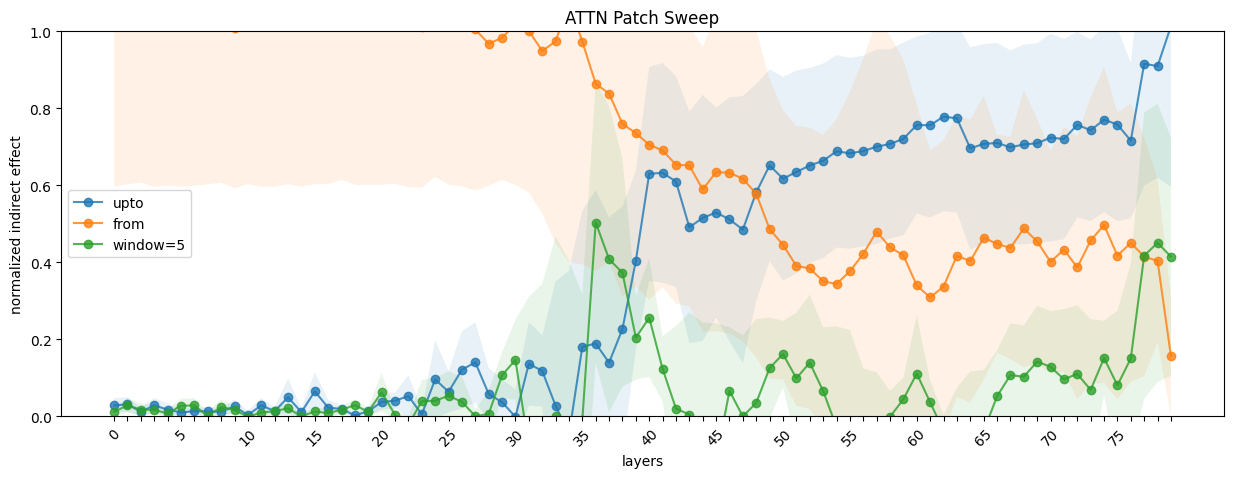

In [46]:
plt.figure(figsize=(15, 5))

processed_results_upto = process_patching_results(mlp_res_upto)
plot_results(processed_results_upto, plt, set_canvas_layout=True, label="upto")

processed_results_from = process_patching_results(mlp_res_from)
plot_results(processed_results_from, plt, set_canvas_layout=False, label="from")

processed_results_win = process_patching_results(mlp_res_win)
plot_results(processed_results_win, plt, set_canvas_layout=False, label="window=5")

plt.legend()

plt.show()

## What are these heads *looking* back to?

* Attention heads in layers $26 \rightarrow 32$ looks at the `were` token.
    * Hypothesis: hybrid representation is formed here by looking back to the subject tokens. The heads at the last token position just brings this information forward to the last token position.

    Verification Experiments:
    * First check if the patching is effective by just patching the `were` token.
    * From the `were` token position are the heads looking back to the subject tokens now? Sub-hypothesis: MLP shouldn't do anything much here.
    * Forwarding the same information part will be tricky to address though.
    * Can we actually check which things are related vs unrelated just by checking certain properties of the `hybrid` representation?

---
#### Findings:

* Indirect Effect from the `ere` token is strong enough to warrent further investigation?
    * How much of the IE is lost if attn is blocked to the `were` token? ==> Not blocking attention to the `were` token helps, but not that much


In [9]:
# with open(os.path.join(env_utils.DEFAULT_DATA_DIR, "coincidences_sample.json")) as f:
#     coincidences = json.load(f)

# logger.info(f"{len(coincidences['examples'])=}")

In [10]:
# for idx, entities in enumerate(coincidences["examples"]):
#     print(f"{idx} => {entities['entity_pair']}")

In [14]:
from src.dataset import ActivationPatchingSamples

activation_patching_path = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR,
    "activation_patching", SYNTH_DATASET,
)
samples_path = os.path.join(
    activation_patching_path, f"samples.json"
)

samples = []
with open(samples_path, "r") as f:
    samples = json.load(f)
samples = [ActivationPatchingSamples.from_dict(sample) for sample in samples]

In [50]:
sample_idx = 17
sample = samples[sample_idx]
print(sample)

António Costa | Isabel Ferreira => " Portuguese" | <-- | Jack Wilson => " Software"


In [52]:
from src.functional import get_keywords_from_text, generate_with_patch

mt.reset_forward()

patch_prompt = sample.prompt_template.format(sample.patched_entity)
answer = generate_with_patch(
    mt = mt,
    inputs = patch_prompt,
    do_sample=False,
    n_gen_per_prompt=1,
    remove_prefix=True
)[0]


print(f"{(sample.patched_entity, sample.common_entity)} >> {answer=}")
# keywords = get_keywords_from_text(text=answer, tokenizer=mt)

keywords = sample.patched_answer_toks
print(f"{[f'{t}({mt.tokenizer.decode(t)})' for t in keywords]}")

clean_prompt = sample.prompt_template.format(sample.clean_entity)
clean_answer = generate_with_patch(
    mt=mt,
    inputs=clean_prompt,
    do_sample=False,
    n_gen_per_prompt=1,
    remove_prefix=True
)[0]
print(f"{(sample.clean_entity, sample.common_entity)} >> {clean_answer=}")

/disk/u/arnab/miniconda3/envs/connection/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:631: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/disk/u/arnab/miniconda3/envs/connection/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:636: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


('Jack Wilson', 'António Costa') >> answer=' Doctor - they are both doctors.'
['4476( Software)']
('Isabel Ferreira', 'António Costa') >> clean_answer=' Portuguese - they are both Portuguese.'


In [47]:
from src.probing.prompt import BiAssociationPrefix
from src.utils.experiment_utils import set_seed
from src.probing.few_shot_examples import (
    human_nationality,
    human_profession,
    human_alma_mater,
    human_allergy,
    human_car,
    human_pet
)

prefix_generator_cls = BiAssociationPrefix

# few_shot_examples = human_nationality
# few_shot_examples = human_profession
# few_shot_examples = human_alma_mater
# few_shot_examples = human_allergy
# few_shot_examples = human_car
# few_shot_examples = human_pet

prefix_generator = prefix_generator_cls(
    # instruction=few_shot_examples.instruction,
    # positive_connections=few_shot_examples.positive_examples,
    # negative_connections=few_shot_examples.negative_examples,
    filter_attributes=[
        "nationality", 
        "profession", 
        "school"
    ],
    format = "_3"
)

set_seed(142)
prefix = prefix_generator.get_prefix()
print(prefix)

2025-06-05 16:50:55 src.utils.experiment_utils INFO     setting all seeds to 142
# Task: Find Common Attributes Between Two People
You will be given two people's names. Your job is to determine if they share ANY common attribute from the list below.

## Response Format:
- If you find a match: "Yes - [shared entity] - [description of what they share]"
- If no match: "No - [Person 1] and [Person 2] have nothing in common"

## Attributes to Consider:
1. Same nationality → "Yes - [nationality] - they are both [nationality]"
2. Same profession → "Yes - [profession] - they are both [profession]"
3. Same school → "Yes - [school] - they both graduated from [school]"

Q: Person W and Person X
A: No - Person W and Person X have nothing in common.

Q: Person A and Person B
A: Yes - German - they are both German.

Q: Person E and Person F
A: Yes - Boston University - they both graduated from Boston University.

Q: Person C and Person D
A: Yes - Doctor - they are both doctors.

Q: Person Y and Pers

In [53]:
from src.tokens import align_patching_positions

aligned_prompts = align_patching_positions(
    mt=mt,
    prompt_template=sample.prompt_template,
    clean_subj=sample.clean_entity,
    patched_subj=sample.patched_entity,
    trace_start_marker=prefix_generator.question_marker,
)

aligned_prompts["subj_range"]

(245, 248)

In [73]:
# mt.tokenizer.decode(aligned_prompts["clean_input"]["input_ids"][0], skip_special_tokens=False)
from src.tokens import prepare_input, find_token_range

text = mt.tokenizer.decode(
    aligned_prompts["clean_input"]["input_ids"][0], skip_special_tokens=False
)

clean_inputs = prepare_input(
    prompts=text, tokenizer=mt, add_special_tokens=False, return_offsets_mapping=True
)

assert torch.allclose(
    clean_inputs.input_ids, aligned_prompts["clean_input"]["input_ids"]
)

print(f"{sample.common_entity=}")

common_entity_range = find_token_range(
    string=text,
    substring=sample.common_entity,
    tokenizer=mt,
    offset_mapping=clean_inputs.offset_mapping[0],
    add_special_tokens=False,
)

print(f"{common_entity_range=}")

tokenized_input = TokenizerOutput(data=aligned_prompts["clean_input"])
print(
    f'"{mt.tokenizer.decode(tokenized_input.input_ids[0][common_entity_range[0] : common_entity_range[1]])}"'
)
print(
    f'"{mt.tokenizer.decode(tokenized_input.input_ids[0][common_entity_range[0] : common_entity_range[1]])}"'
)

sample.common_entity='António Costa'
common_entity_range=(249, 253)
" António Costa"
" António Costa"


In [81]:
from src.probing.utils import ProbingPrompt

aligned_clean_prompt = ProbingPrompt(
    prompt=mt.tokenizer.decode(
        aligned_prompts["clean_input"]["input_ids"][0], skip_special_tokens=False
    ),
    entities=[sample.clean_entity, sample.common_entity],
    model_key=model_key,
    tokenized=aligned_prompts["clean_input"],
    entity_ranges=[
        aligned_prompts["subj_range"],
        common_entity_range,
    ],
    query_range=[-1, -1],
)

print(
    f'{sample.clean_entity=} | "{mt.tokenizer.decode(aligned_clean_prompt.tokenized.input_ids[0][aligned_prompts["subj_range"][0] : aligned_prompts["subj_range"][1]])}"'
)
print(
    f'{sample.common_entity=} | "{mt.tokenizer.decode(aligned_clean_prompt.tokenized.input_ids[0][common_entity_range[0] : common_entity_range[1]])}"'
)

aligned_patch_prompt = ProbingPrompt(
    prompt=mt.tokenizer.decode(
        aligned_prompts["patched_input"]["input_ids"][0], skip_special_tokens=False
    ),
    entities=[sample.patched_entity, sample.common_entity],
    model_key=model_key,
    tokenized=aligned_prompts["patched_input"],
    entity_ranges=[
        aligned_prompts["subj_range"],
        common_entity_range,
    ],
    query_range=[-1, -1],
)

print(
    f'{sample.patched_entity=} | "{mt.tokenizer.decode(aligned_patch_prompt.tokenized.input_ids[0][aligned_prompts["subj_range"][0] : aligned_prompts["subj_range"][1]])}"'
)
print(
    f'{sample.common_entity=} | "{mt.tokenizer.decode(aligned_patch_prompt.tokenized.input_ids[0][common_entity_range[0] : common_entity_range[1]])}"'
)

sample.clean_entity='Isabel Ferreira' | " Isabel Ferreira"
sample.common_entity='António Costa' | " António Costa"
sample.patched_entity='Jack Wilson' | "<|eot_id|> Jack Wilson"
sample.common_entity='António Costa' | " António Costa"


In [82]:
##################################################
# layer_idx = 30
# layer_window = get_window(mt.attn_module_name_format, layer_idx, 5, mt.n_layer)
# layer_window = range(28, 35)
# layer_window = range(10, 20)
# layer_window = range(40, mt.n_layer-2)
# LAYER_WINDOW = list(range(26, 35))
# LAYER_WINDOW = list(range(0, 10))

PATCH_LAYER_WINDOW = list(range(5, 15))

METRIC = "logit"
# METRIC = "prob"
# METRIC = "log_norm"
##################################################

In [83]:
import itertools
from src.functional import get_hs
from src.utils.typing import TokenizerOutput

patch_states = get_hs(
    mt=mt,
    input=TokenizerOutput(data=aligned_prompts["patched_input"]),
    # locations = [(mt.layer_name_format.format(l), -2) for l in range(mt.n_layer)],
    locations=list(
        itertools.product(mt.layer_names, list(range(*aligned_prompts["subj_range"])))
    ),
    return_dict=True,
)


gold_score, gold_pred, gold_track = patched_run(
    mt=mt,
    # inputs = TokenizerOutput(data = patch_prompt.tokenized),
    inputs=TokenizerOutput(data=aligned_prompts["patched_input"]),
    patches=[],
    ans_tokens=keywords,
    # generate_full_ans = True,
    metric=METRIC,
)
print(f"{gold_score=}")
print(f"{gold_pred=}")
print(f"{gold_track=}")

corrupt_score, corrupt_pred, corrupt_track = patched_run(
    mt=mt,
    # inputs = TokenizerOutput(data = clean_prompt.tokenized),
    inputs=TokenizerOutput(data=aligned_prompts["clean_input"]),
    patches=[],
    ans_tokens=keywords,
    # generate_full_ans = True,
    metric=METRIC,
)
print(f"{corrupt_score=}")
print(f"{corrupt_pred=}")
print(f"{corrupt_track=}")


# layer_window = [mt.attn_module_name_format.format(l) for l in layer_window]
layer_window = [mt.layer_name_format.format(l) for l in PATCH_LAYER_WINDOW]
# input = TokenizerOutput(data = clean_prompt.tokenized)
# last_tok_idx = input.input_ids.shape[1] - 1

tokenized_input = TokenizerOutput(data=aligned_prompts["clean_input"])

# for `are/were``
# patches = [
#     PatchSpec(
#         location = (layer, -2),
#         patch = patch_states[(layer, -2)]
#     ) for layer in layer_window
# ]

# for the patched subject
patches = [
    PatchSpec(location=(layer, token_idx), patch=patch_states[(layer, token_idx)])
    for layer, token_idx in itertools.product(
        layer_window, range(*aligned_prompts["subj_range"])
    )
]
# patches = []

patched_score, pred, track = patched_run(
    mt=mt,
    inputs=tokenized_input,
    patches=patches,
    ans_tokens=keywords,
    generate_full_ans=True,
    metric=METRIC,
)

print(f"{patched_score=}")
print(f"{pred=}")
print(f"{track=}")

indirect_effect = (patched_score - corrupt_score) / (gold_score - corrupt_score)
print(f"{indirect_effect=}")

gold_score=16.375
gold_pred=[PredictedToken(token=' Doctor', prob=0.291015625, logit=17.0, token_id=19150, metadata=None), PredictedToken(token=' University', prob=0.2001953125, logit=16.625, token_id=3907, metadata=None), PredictedToken(token=' Software', prob=0.1552734375, logit=16.375, token_id=4476, metadata=None), PredictedToken(token=' Engineer', prob=0.0732421875, logit=15.625, token_id=29483, metadata=None), PredictedToken(token=' software', prob=0.04736328125, logit=15.1875, token_id=3241, metadata=None)]
gold_track={4476: (3, PredictedToken(token=' Software', prob=0.1552734375, logit=16.375, token_id=4476, metadata=None))}
corrupt_score=9.4375
corrupt_pred=[PredictedToken(token=' Portuguese', prob=0.66796875, logit=20.125, token_id=43288, metadata=None), PredictedToken(token=' Portugal', prob=0.279296875, logit=19.25, token_id=34411, metadata=None), PredictedToken(token=' University', prob=0.017822265625, logit=16.5, token_id=3907, metadata=None), PredictedToken(token=' Lisbo

/disk/u/arnab/miniconda3/envs/connection/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:631: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/disk/u/arnab/miniconda3/envs/connection/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:636: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


" Doctor - they are both doctors"
patched_score=16.125
pred=[PredictedToken(token=' Doctor', prob=0.28515625, logit=16.875, token_id=19150, metadata=None), PredictedToken(token=' University', prob=0.22265625, logit=16.625, token_id=3907, metadata=None), PredictedToken(token=' Software', prob=0.134765625, logit=16.125, token_id=4476, metadata=None), PredictedToken(token=' Engineer', prob=0.06787109375, logit=15.4375, token_id=29483, metadata=None), PredictedToken(token=' software', prob=0.046630859375, logit=15.0625, token_id=3241, metadata=None)]
track={4476: (3, PredictedToken(token=' Software', prob=0.134765625, logit=16.125, token_id=4476, metadata=None))}
indirect_effect=0.963963963963964


In [84]:
from src.functional import predict_next_token

# predict_next_token(
#     mt = mt,
#     inputs = TokenizerOutput(data = aligned_prompts["clean_input"]),
# )

In [85]:

# # inputs = TokenizerOutput(data=clean_prompt.tokenized)
# tokenized_input = TokenizerOutput(data = aligned_prompts["clean_input"])
# print(tokenized_input.input_ids.shape)
# # offset_mapping = tokenized_input.pop("offset_mapping")[0]

# clean_attn = get_attention_matrices(
#     input=tokenized_input,
#     mt = mt,
#     value_weighted=False,
#     # patches = patches
# )

# score = get_score(
#     logits = clean_attn.logits,
#     token_id=keywords,
#     metric = METRIC
# )
# print(f"{score=}")

# indirect_effect = (score - corrupt_score) / (gold_score - corrupt_score)
# print(f"{indirect_effect=}")

# interpret_logits(logits = clean_attn.logits, tokenizer=mt, interested_tokens=keywords)

In [91]:
from src.tokens import find_token_range
from circuitsvis.tokens import colored_tokens
from IPython.display import display
from src.attention import AttentionInformation


def visualize_average_attn_matrix(
    attn_matrices: dict,
    prompt: ProbingPrompt | str,
    layer_window: list | None = None,
    q_index: int = -1,
    remove_bos: bool = True,
    start_from: int | str | None = None,
):
    inputs = TokenizerOutput(data=prompt.tokenized)
    if start_from is None:
        start_from = 1 if remove_bos else 0
    elif isinstance(start_from, str):
        start_from = (
            find_token_range(
                string=prompt.prompt,
                substring="#",
                tokenizer=mt,
                offset_mapping=inputs.offset_mapping[0],
                occurrence=-1,
            )[1]
            - 1
        )

    # print(f"{start_from=}")

    for layer in layer_window:
        print(f"{layer=}")
        if isinstance(attn_matrices, AttentionInformation):
            avg_attn_module_matrix = torch.Tensor(
                attn_matrices.attention_matrices[layer]
            ).mean(dim=0)[q_index]
        else:
            avg_attn_module_matrix = torch.stack(
                [
                    attn_matrices[layer][h_idx].squeeze()
                    for h_idx in range(mt.config.num_attention_heads)
                ]
            ).mean(dim=0)[q_index]

        # print(avg_attn_module_matrix.shape)

        tokens = [
            mt.tokenizer.decode(t, skip_special_tokens=False)
            for t in inputs["input_ids"][0]
        ][start_from:]
        for idx, t in enumerate(tokens):
            if t == "<think>":
                tokens[idx] = "<|think|>"
            elif t == "</think>":
                tokens[idx] = "<|/think|>"

        display(
            colored_tokens(tokens=tokens, values=avg_attn_module_matrix[start_from:])
        )
        print("-" * 80)


# visualize_average_attn_matrix(
#     attn_matrices=clean_attn,
#     prompt=aligned_clean_prompt,
#     layer_window=range(26, 36),
#     # layer_window = list(range(mt.n_layer)),
#     q_index=-1,
#     remove_bos=False,
#     start_from = aligned_prompts["trace_start_idx"]
# )

#### Patching while ablating heads

In [92]:
##############################################################
ATTN_LAYER_WINDOW = list(range(30, 40))
##############################################################

In [93]:
tokenized_input = TokenizerOutput(data=aligned_prompts["clean_input"])

# start_idx = find_token_range(
#     string=clean_prompt.prompt,
#     substring="#",
#     tokenizer=mt,
#     offset_mapping=tokenized_input.offset_mapping[0],
#     occurrence=-1
# )[1] - 1

# # start_idx, inputs.input_ids.shape[-1]

start_idx = aligned_prompts["trace_start_idx"]
context_range = list(range(0, start_idx + 1))

In [108]:
# blocking attntion to the subject tokens
import baukit

mt.reset_forward()

focus_edges_on = get_edges_to_be_ablated(
    prompt=aligned_clean_prompt,
    # focus_strategy="ablate_all",
    focus_strategy="entities",
    Q_IDX=-1,
    # whitelist_key_indices=[0, -2]
    # whitelist_key_indices=[0, -1]
    # whitelist_key_indices=[-2]
    whitelist_key_indices=context_range + [-1],
    # whitelist_key_indices=context_range + [-1, -2]
    # whitelist_key_indices=[-1, -2]
)
focus_all_heads_on = {
    h_idx: focus_edges_on for h_idx in range(mt.config.num_attention_heads)
}

block_all_edges = get_edges_to_be_ablated(
    prompt=aligned_clean_prompt,
    focus_strategy="ablate_all",
    Q_IDX=-1,
    # whitelist_key_indices=[0]
    # whitelist_key_indices=[0, -1]
    # whitelist_key_indices=[-1]
    # whitelist_key_indices=context_range
    whitelist_key_indices=context_range + [-1],
)
# block_all_edges = []
block_all_edges_for_all_heads = {
    h_idx: block_all_edges for h_idx in range(mt.config.num_attention_heads)
}

attn_matrices = {l: {} for l in range(mt.n_layer)}
attn_contributions = {l: {} for l in range(mt.n_layer)}

ignore_first_k_layers = 5
for layer_idx in range(0, mt.n_layer):
    attn_block_name = mt.attn_module_name_format.format(layer_idx)
    attn_block = baukit.get_module(mt._model, attn_block_name)

    # print(f"{attn_block_name=}  | ", end="")
    if layer_idx < ignore_first_k_layers:
        # print("ignore")
        block_config = {h: [] for h in range(mt.config.num_attention_heads)}
    elif layer_idx in ATTN_LAYER_WINDOW:
        # print("< focus >")
        block_config = focus_all_heads_on
    else:
        # print("block")
        block_config = block_all_edges_for_all_heads

    attn_block.forward = types.MethodType(
        LlamaAttentionPatcher(
            block_name=attn_block_name,
            # cut_attn_edges=focus_all_heads_on if layer_idx in ATTN_LAYER_WINDOW else block_all_edges_for_all_heads,
            # cut_attn_edges=focus_all_heads_on_ere,
            # cut_attn_edges=block_all_edges_for_all_heads,
            cut_attn_edges=block_config,
            save_attn_for=list(range(mt.config.num_attention_heads)),
            store_attn_matrices=attn_matrices[layer_idx],
            store_head_contributions=attn_contributions[layer_idx],
        ),
        attn_block,
    )

patch_layer_window = [mt.layer_name_format.format(l) for l in PATCH_LAYER_WINDOW]

# tokenized_input = TokenizerOutput(data = clean_prompt.tokenized)
tokenized_input = TokenizerOutput(data=aligned_prompts["clean_input"])


# for `are/were``
# patches = [
#     PatchSpec(
#         location = (layer, -2),
#         patch = patch_states[(layer, -2)]
#     ) for layer in layer_window
# ]

# for the patched subject
patches = [
    PatchSpec(location=(layer, token_idx), patch=patch_states[(layer, token_idx)])
    for layer, token_idx in itertools.product(
        patch_layer_window, range(*aligned_prompts["subj_range"])
    )
]
# patches = []

print(tokenized_input.input_ids.shape)
# offset_mapping = tokenized_input.pop("offset_mapping")[0]

patch_block_subj_score, pred, track = patched_run(
    mt=mt,
    inputs=tokenized_input,
    patches=patches,
    ans_tokens=keywords,
    generate_full_ans=False,
    metric=METRIC,
)

# output = patch_with_baukit(
#     model = mt,
#     inputs = tokenized_input,
#     patches = patches,
# )
# logits = output.logits[0][-1].squeeze()

# patch_block_subj_score = get_score(
#     logits = logits,
#     token_id=keywords,
#     metric = METRIC
# )
# pred = interpret_logits(logits = logits, tokenizer=mt, k = 15, interested_tokens=keywords)

print(f"{patch_block_subj_score=}")
print(f"{pred=}")
print(f"{track=}")

indirect_effect = (patch_block_subj_score - corrupt_score) / (
    gold_score - corrupt_score
)
print(f"{indirect_effect=}")

mt.reset_forward()

torch.Size([1, 258])
patch_block_subj_score=13.8125
pred=[PredictedToken(token=' University', prob=0.10302734375, logit=13.9375, token_id=3907, metadata=None), PredictedToken(token=' Australian', prob=0.10302734375, logit=13.9375, token_id=13673, metadata=None), PredictedToken(token=' Software', prob=0.0908203125, logit=13.8125, token_id=4476, metadata=None), PredictedToken(token=' British', prob=0.080078125, logit=13.6875, token_id=8013, metadata=None), PredictedToken(token=' Engineer', prob=0.048583984375, logit=13.1875, token_id=29483, metadata=None)]
track={4476: (3, PredictedToken(token=' Software', prob=0.0908203125, logit=13.8125, token_id=4476, metadata=None))}
indirect_effect=0.6306306306306306


In [112]:
visualize_average_attn_matrix(
    attn_matrices=attn_matrices,
    prompt=aligned_clean_prompt,
    layer_window = ATTN_LAYER_WINDOW,
    # layer_window=range(0, mt.n_layer),
    start_from=aligned_prompts["trace_start_idx"],
    # remove_bos=False
)

layer=30


--------------------------------------------------------------------------------
layer=31


--------------------------------------------------------------------------------
layer=32


--------------------------------------------------------------------------------
layer=33


--------------------------------------------------------------------------------
layer=34


--------------------------------------------------------------------------------
layer=35


--------------------------------------------------------------------------------
layer=36


--------------------------------------------------------------------------------
layer=37


--------------------------------------------------------------------------------
layer=38


--------------------------------------------------------------------------------
layer=39


--------------------------------------------------------------------------------


#### Freezing the ATTN patterns to make sure that the role doesn't change across examples

In [117]:
##############################################################
ATTN_LAYER_WINDOW = list(range(30, 40))
##############################################################

In [122]:
import baukit
import types
from src.hooking.llama_attention import LlamaAttentionPatcher

# grab attention patterns for the clean prompt
mt.reset_forward()


# clean_attn_matrices = {l: {} for l in ATTN_LAYER_WINDOW}
clean_attn_matrices = {l: {} for l in range(mt.n_layer)}
# for layer_idx in ATTN_LAYER_WINDOW:
for layer_idx in range(mt.n_layer):
    attn_block_name = mt.attn_module_name_format.format(layer_idx)
    attn_block = baukit.get_module(mt._model, attn_block_name)
    attn_block.forward = types.MethodType(
        LlamaAttentionPatcher(
            block_name=attn_block_name,
            save_attn_for=list(range(mt.config.num_attention_heads)),
            store_attn_matrices=clean_attn_matrices[layer_idx],
        ),
        attn_block,
    )

# inputs = TokenizerOutput(data=clean_prompt.tokenized)
tokenized_input = TokenizerOutput(data=aligned_prompts["clean_input"])

print(tokenized_input.input_ids.shape)
# offset_mapping = tokenized_input.pop("offset_mapping")[0]

score, pred, track = patched_run(
    mt=mt,
    inputs=tokenized_input,
    patches=[],
    ans_tokens=keywords,
    generate_full_ans=False,
    metric=METRIC,
)

print(f"{score=}")
print(f"{pred=}")
print(f"{track=}")

indirect_effect = (score - corrupt_score) / (gold_score - corrupt_score)
print(f"{indirect_effect=}")

mt.reset_forward()

torch.Size([1, 258])
score=9.4375
pred=[PredictedToken(token=' Portuguese', prob=0.66796875, logit=20.125, token_id=43288, metadata=None), PredictedToken(token=' Portugal', prob=0.279296875, logit=19.25, token_id=34411, metadata=None), PredictedToken(token=' University', prob=0.0157470703125, logit=16.375, token_id=3907, metadata=None), PredictedToken(token=' Lisbon', prob=0.004791259765625, logit=15.1875, token_id=81801, metadata=None), PredictedToken(token=' Doctor', prob=0.004791259765625, logit=15.1875, token_id=19150, metadata=None)]
track={4476: (100, PredictedToken(token=' Software', prob=1.52587890625e-05, logit=9.4375, token_id=4476, metadata=None))}
indirect_effect=0.0


In [123]:
# aligned_clean_prompt.tokenized["input_ids"].shape
# aligned_patch_prompt.tokenized["input_ids"].shape
# tokenized_input.input_ids.shape

In [124]:
visualize_average_attn_matrix(
    attn_matrices=clean_attn_matrices,
    prompt=aligned_clean_prompt,
    layer_window=ATTN_LAYER_WINDOW,
    start_from=aligned_prompts["trace_start_idx"],
)

layer=30


--------------------------------------------------------------------------------
layer=31


--------------------------------------------------------------------------------
layer=32


--------------------------------------------------------------------------------
layer=33


--------------------------------------------------------------------------------
layer=34


--------------------------------------------------------------------------------
layer=35


--------------------------------------------------------------------------------
layer=36


--------------------------------------------------------------------------------
layer=37


--------------------------------------------------------------------------------
layer=38


--------------------------------------------------------------------------------
layer=39


--------------------------------------------------------------------------------


In [125]:
# freezing attention while patching

mt.reset_forward()

patch_states = get_hs(
    mt=mt,
    input=TokenizerOutput(data=aligned_prompts["patched_input"]),
    # locations = [(mt.layer_name_format.format(l), -2) for l in range(mt.n_layer)],
    locations=list(
        itertools.product(mt.layer_names, list(range(*aligned_prompts["subj_range"])))
    ),
    return_dict=True,
)

freezed_attn_matrices = {l: {} for l in range(mt.n_layer)}

#! freezing the critical layers only
# for layer_idx in ATTN_LAYER_WINDOW:
#     attn_block_name = mt.attn_module_name_format.format(layer_idx)
#     attn_block = baukit.get_module(mt._model, attn_block_name)
#     attn_block.forward = types.MethodType(
#         LlamaAttentionPatcher(
#             block_name=attn_block_name,
#             freeze_attn_matrices=clean_attn_matrices[layer_idx],

#             save_attn_for=list(range(mt.config.num_attention_heads)),
#             store_attn_matrices=freezed_attn_matrices[layer_idx],
#         ),
#         attn_block
#     )


#! freezing the critical layers while also ablating the rest
ignore_first_k_layers = 5
for layer_idx in range(0, mt.n_layer):
    attn_block_name = mt.attn_module_name_format.format(layer_idx)
    attn_block = baukit.get_module(mt._model, attn_block_name)

    # # print(f"{attn_block_name=}  | ", end="")
    # if layer_idx < ignore_first_k_layers:
    #     # print("ignore")
    #     block_config = {h: [] for h in range(mt.config.num_attention_heads)}
    # elif layer_idx in ATTN_LAYER_WINDOW:
    #     # print("< focus >")
    #     block_config = focus_all_heads_on #! shouldn't have any effect as the attention matrices will be replaced with freezed ones
    # else:
    #     # print("block")
    #     block_config = block_all_edges_for_all_heads

    attn_block.forward = types.MethodType(
        LlamaAttentionPatcher(
            block_name=attn_block_name,
            # cut_attn_edges=focus_all_heads_on if layer_idx in ATTN_LAYER_WINDOW else block_all_edges_for_all_heads,
            # cut_attn_edges=focus_all_heads_on_ere,
            # cut_attn_edges=block_all_edges_for_all_heads,
            # cut_attn_edges=block_config,
            save_attn_for=list(range(mt.config.num_attention_heads)),
            store_attn_matrices=freezed_attn_matrices[layer_idx],
            # freeze_attn_matrices=clean_attn_matrices[layer_idx] if layer_idx in ATTN_LAYER_WINDOW else None
            freeze_attn_matrices=clean_attn_matrices[layer_idx],
        ),
        attn_block,
    )


patch_layer_window = [mt.layer_name_format.format(l) for l in PATCH_LAYER_WINDOW]
# tokenized_input = TokenizerOutput(data = clean_prompt.tokenized)

tokenized_input = TokenizerOutput(data=aligned_prompts["clean_input"])


# for `are/were``
# patches = [
#     PatchSpec(
#         location = (layer, -2),
#         patch = patch_states[(layer, -2)]
#     ) for layer in layer_window
# ]

# for the patched subject
patches = [
    PatchSpec(location=(layer, token_idx), patch=patch_states[(layer, token_idx)])
    for layer, token_idx in itertools.product(
        patch_layer_window, range(*aligned_prompts["subj_range"])
    )
]
# patches = []


print(tokenized_input.input_ids.shape)
# offset_mapping = tokenized_input.pop("offset_mapping")[0]

patch_frz_score, pred, track = patched_run(
    mt=mt,
    inputs=tokenized_input,
    patches=patches,
    ans_tokens=keywords,
    generate_full_ans=False,
    metric=METRIC,
)

print(f"{patch_frz_score=}")
print(f"{pred=}")
print(f"{track=}")

indirect_effect = (patch_frz_score - corrupt_score) / (gold_score - corrupt_score)
print(f"{indirect_effect=}")

mt.reset_forward()

torch.Size([1, 258])
patch_frz_score=14.0
pred=[PredictedToken(token=' Australian', prob=0.353515625, logit=16.5, token_id=13673, metadata=None), PredictedToken(token=' University', prob=0.1572265625, logit=15.6875, token_id=3907, metadata=None), PredictedToken(token=' British', prob=0.0791015625, logit=15.0, token_id=8013, metadata=None), PredictedToken(token=' Portuguese', prob=0.05419921875, logit=14.625, token_id=43288, metadata=None), PredictedToken(token=' Engineer', prob=0.032958984375, logit=14.125, token_id=29483, metadata=None)]
track={4476: (6, PredictedToken(token=' Software', prob=0.029052734375, logit=14.0, token_id=4476, metadata=None))}
indirect_effect=0.6576576576576577


In [126]:
visualize_average_attn_matrix(
    attn_matrices=freezed_attn_matrices,
    prompt=aligned_clean_prompt,
    layer_window=ATTN_LAYER_WINDOW,
    start_from=aligned_prompts["trace_start_idx"],
)

layer=30


--------------------------------------------------------------------------------
layer=31


--------------------------------------------------------------------------------
layer=32


--------------------------------------------------------------------------------
layer=33


--------------------------------------------------------------------------------
layer=34


--------------------------------------------------------------------------------
layer=35


--------------------------------------------------------------------------------
layer=36


--------------------------------------------------------------------------------
layer=37


--------------------------------------------------------------------------------
layer=38


--------------------------------------------------------------------------------
layer=39


--------------------------------------------------------------------------------


In [127]:
mt.reset_forward()

# grab attention patterns for the clean prompt
mt.reset_forward()


value_weighted_attn_matrices = {l: {} for l in ATTN_LAYER_WINDOW}
for layer_idx in ATTN_LAYER_WINDOW:
    attn_block_name = mt.attn_module_name_format.format(layer_idx)
    attn_block = baukit.get_module(mt._model, attn_block_name)
    attn_block.forward = types.MethodType(
        LlamaAttentionPatcher(
            block_name=attn_block_name,
            save_attn_for=list(range(mt.config.num_attention_heads)),
            store_attn_matrices=value_weighted_attn_matrices[layer_idx],
            value_weighted=True,
        ),
        attn_block,
    )

tokenized_input = TokenizerOutput(data=aligned_prompts["clean_input"])

score, pred, track = patched_run(
    mt=mt,
    inputs=tokenized_input,
    patches=[],
    ans_tokens=keywords,
    generate_full_ans=False,
    metric=METRIC,
)

print(f"{score=}")
print(f"{pred=}")
print(f"{track=}")
indirect_effect = (score - corrupt_score) / (gold_score - corrupt_score)
print(f"{indirect_effect=}")

mt.reset_forward()

score=9.5
pred=[PredictedToken(token=' Portuguese', prob=0.66796875, logit=20.125, token_id=43288, metadata=None), PredictedToken(token=' Portugal', prob=0.279296875, logit=19.25, token_id=34411, metadata=None), PredictedToken(token=' University', prob=0.017822265625, logit=16.5, token_id=3907, metadata=None), PredictedToken(token=' Lisbon', prob=0.004791259765625, logit=15.1875, token_id=81801, metadata=None), PredictedToken(token=' Doctor', prob=0.004791259765625, logit=15.1875, token_id=19150, metadata=None)]
track={4476: (97, PredictedToken(token=' Software', prob=1.621246337890625e-05, logit=9.5, token_id=4476, metadata=None))}
indirect_effect=0.009009009009009009


In [128]:
visualize_average_attn_matrix(
    attn_matrices=value_weighted_attn_matrices,
    prompt=aligned_clean_prompt,
    layer_window=ATTN_LAYER_WINDOW,
    start_from=aligned_prompts["trace_start_idx"],
)

layer=30


--------------------------------------------------------------------------------
layer=31


--------------------------------------------------------------------------------
layer=32


--------------------------------------------------------------------------------
layer=33


--------------------------------------------------------------------------------
layer=34


--------------------------------------------------------------------------------
layer=35


--------------------------------------------------------------------------------
layer=36


--------------------------------------------------------------------------------
layer=37


--------------------------------------------------------------------------------
layer=38


--------------------------------------------------------------------------------
layer=39


--------------------------------------------------------------------------------


## Interpretation of the contributions.
* Just apply `Logit Lens` and `PatchScope` to check for interpretable contributions.
    * Take care of layer norm after the attention block

In [129]:
####################################################
ATTN_LAYER_WINDOW = list(range(30, 40))

METRIC = "logit"
# METRIC = "prob"
# METRIC = "log_norm"
####################################################

In [132]:
sample_idx = 8
sample = samples[sample_idx]
print(sample)

Sofia Hernandez | Carlos Rodriguez => " Mexican" | <-- | Priya Patel => " Graphic"


In [133]:
from src.functional import get_keywords_from_text, generate_with_patch

mt.reset_forward()

patch_prompt = sample.prompt_template.format(sample.patched_entity)
answer = generate_with_patch(
    mt = mt,
    inputs = patch_prompt,
    do_sample=False,
    n_gen_per_prompt=1,
    remove_prefix=True
)[0]


print(f"{(sample.patched_entity, sample.common_entity)} >> {answer=}")
# keywords = get_keywords_from_text(text=answer, tokenizer=mt)

keywords = sample.patched_answer_toks
print(f"{[f'{t}({mt.tokenizer.decode(t)})' for t in keywords]}")

clean_prompt = sample.prompt_template.format(sample.clean_entity)
clean_answer = generate_with_patch(
    mt=mt,
    inputs=clean_prompt,
    do_sample=False,
    n_gen_per_prompt=1,
    remove_prefix=True
)[0]
print(f"{(sample.clean_entity, sample.common_entity)} >> {clean_answer=}")

/disk/u/arnab/miniconda3/envs/connection/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:631: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/disk/u/arnab/miniconda3/envs/connection/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:636: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


('Priya Patel', 'Sofia Hernandez') >> answer=' Graphic Designer - they are both graphic designers.'
['45051( Graphic)']
('Carlos Rodriguez', 'Sofia Hernandez') >> clean_answer=' Mexican - they are both Mexican.'


In [137]:
post_attn_ln_format = "model.layers.{}.post_attention_layernorm"

cached_states = get_hs(
    mt=mt,
    input=patch_prompt,
    locations=(
        [(mt.attn_module_name_format.format(l), -1) for l in range(mt.n_layer)]
        + [(mt.layer_name_format.format(l), -1) for l in range(mt.n_layer)]
        + [(post_attn_ln_format.format(l), -1) for l in range(mt.n_layer)]
    ),
    return_dict=True,
)


gold_score, gold_pred, gold_track = patched_run(
    mt=mt,
    inputs=patch_prompt,
    patches=[],
    ans_tokens=keywords,
    # generate_full_ans = True,
    metric=METRIC,
)
print(f"{gold_score=}")
print(f"{gold_pred=}")
print(f"{gold_track=}")

tokenized_clean_input = prepare_input(
    prompts=clean_prompt,
    tokenizer=mt,
)
corrupt_score, corrupt_pred, corrupt_track = patched_run(
    mt=mt,
    inputs=tokenized_clean_input,
    patches=[],
    ans_tokens=keywords,
    # generate_full_ans = True,
    metric=METRIC,
)
print(f"{corrupt_score=}")
print(f"{corrupt_pred=}")
print(f"{corrupt_track=}")


layer_window = [mt.attn_module_name_format.format(l) for l in ATTN_LAYER_WINDOW]
last_tok_idx = tokenized_clean_input.input_ids.shape[1] - 1

patches = [
    PatchSpec(location=(layer, last_tok_idx), patch=cached_states[(layer, -1)])
    for layer in layer_window
]
# patches = []

patched_score, pred, track = patched_run(
    mt=mt,
    inputs=tokenized_clean_input,
    patches=patches,
    ans_tokens=keywords,
    generate_full_ans=True,
    metric=METRIC,
)

print(f"{patched_score=}")
print(f"{pred=}")
print(f"{track=}")

indirect_effect = (patched_score - corrupt_score) / (gold_score - corrupt_score)
print(f"{indirect_effect=}")

gold_score=15.8125
gold_pred=[PredictedToken(token=' Graphic', prob=0.349609375, logit=15.8125, token_id=45051, metadata=None), PredictedToken(token=' Designer', prob=0.1455078125, logit=14.9375, token_id=15940, metadata=None), PredictedToken(token=' Doctor', prob=0.04736328125, logit=13.8125, token_id=19150, metadata=None), PredictedToken(token=' graphic', prob=0.041748046875, logit=13.6875, token_id=21154, metadata=None), PredictedToken(token=' Visual', prob=0.0286865234375, logit=13.3125, token_id=20796, metadata=None)]
gold_track={45051: (1, PredictedToken(token=' Graphic', prob=0.349609375, logit=15.8125, token_id=45051, metadata=None))}
corrupt_score=12.125
corrupt_pred=[PredictedToken(token=' Mexican', prob=0.52734375, logit=17.25, token_id=24160, metadata=None), PredictedToken(token=' Mexico', prob=0.3203125, logit=16.75, token_id=12550, metadata=None), PredictedToken(token=' Universidad', prob=0.01806640625, logit=13.875, token_id=67613, metadata=None), PredictedToken(token=' 

/disk/u/arnab/miniconda3/envs/connection/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:631: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/disk/u/arnab/miniconda3/envs/connection/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:636: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


" Graphic Designer - they are both Graphic Designers."
patched_score=16.25
pred=[PredictedToken(token=' Graphic', prob=0.42578125, logit=16.25, token_id=45051, metadata=None), PredictedToken(token=' Designer', prob=0.1474609375, logit=15.1875, token_id=15940, metadata=None), PredictedToken(token=' graphic', prob=0.044921875, logit=14.0, token_id=21154, metadata=None), PredictedToken(token=' Mexican', prob=0.0289306640625, logit=13.5625, token_id=24160, metadata=None), PredictedToken(token=' University', prob=0.0289306640625, logit=13.5625, token_id=3907, metadata=None)]
track={45051: (1, PredictedToken(token=' Graphic', prob=0.42578125, logit=16.25, token_id=45051, metadata=None))}
indirect_effect=1.11864406779661


In [152]:
# Logit Lens

from src.functional import logit_lens

for attn_idx in ATTN_LAYER_WINDOW:
    attn_module = mt.attn_module_name_format.format(attn_idx)
    layer_name = mt.layer_name_format.format(attn_idx)
    lnf_name = post_attn_ln_format.format(attn_idx)

    h = cached_states[(attn_module, -1)]
    # h = cached_states[(layer_name, -1)]
    # h = cached_states[(lnf_name, -1)]

    logits, pred = logit_lens(
        mt=mt,
        h=h,
        k=15,
        return_logits=True,
    )

    pred_str = " | ".join([f"{p}" for p in pred])

    score = get_score(logits=logits, token_id=keywords, metric=METRIC)
    print(f"{attn_module=} >> {score=} |<>| {pred_str=}")

attn_module='model.layers.30.self_attn' >> score=-1.1796875 |<>| pred_str='" Fowler"[75243] (p=0.005, logit=6.750) | "re"[265] (p=0.005, logit=6.562) | "-,"[37619] (p=0.004, logit=6.344) | " AP"[10314] (p=0.004, logit=6.312) | " cor"[1867] (p=0.004, logit=6.312) | "ive"[535] (p=0.003, logit=6.281) | "arts"[7183] (p=0.003, logit=6.125) | " Mustang"[53879] (p=0.003, logit=5.969) | " Ved"[75887] (p=0.002, logit=5.938) | " Christopher"[26035] (p=0.002, logit=5.906) | "iev"[44191] (p=0.002, logit=5.875) | "\xa0"[4194] (p=0.002, logit=5.844) | "ateria"[29283] (p=0.002, logit=5.812) | " com"[470] (p=0.002, logit=5.812) | " Anast"[94425] (p=0.002, logit=5.750)'
attn_module='model.layers.31.self_attn' >> score=-0.515625 |<>| pred_str='" Both"[11995] (p=0.058, logit=9.625) | " both"[2225] (p=0.013, logit=8.125) | "Both"[21279] (p=0.010, logit=7.906) | "両"[110176] (p=0.007, logit=7.562) | " gc"[22903] (p=0.007, logit=7.469) | " BOTH"[86589] (p=0.006, logit=7.375) | " neither"[14188] (p=0.005, log

In [153]:
from src.functional import patchscope, get_hs

test_input = " Mount Everest"
toks = mt.tokenizer(test_input, return_tensors="pt", add_special_tokens=False)
print([f'{t}["{mt.tokenizer.decode(t)}"]' for t in toks["input_ids"][0]])

layer_idx = 65

h = get_hs(
    mt=mt,
    input=test_input,
    # locations = [(mt.embedder_name, -1)],
    locations=[(mt.layer_name_format.format(layer_idx), -1)],
    return_dict=False,
)

patch_layers = [
    mt.layer_name_format.format(l) 
    # for l in range(layer_idx, layer_idx + 1)
    for l in range(10, 20)
]

logits, pred = patchscope(
    mt=mt, h=h, return_logits=True, patch_layers=patch_layers, k=15
)

print(logits.shape)
pred

['10640[" Mount"]', '87578[" Everest"]']
copy>copy;Cat>Cat;Java>Java;transistor>transistor;python>python;Leonardo DiCaprio>Leonardo DiCaprio; The Lion King> The Lion King;Washington D.C.>Washington D.C.;Mount Everest>Mount Everest; computer> computer;placeholder>
torch.Size([128256])


[PredictedToken(token='Ever', prob=0.69140625, logit=18.125, token_id=44587, metadata=None),
 PredictedToken(token='Mount', prob=0.1748046875, logit=16.75, token_id=16683, metadata=None),
 PredictedToken(token=' Everest', prob=0.056640625, logit=15.625, token_id=87578, metadata=None),
 PredictedToken(token=' Mount', prob=0.0152587890625, logit=14.3125, token_id=10640, metadata=None),
 PredictedToken(token=' computer', prob=0.00494384765625, logit=13.1875, token_id=6500, metadata=None),
 PredictedToken(token='mount', prob=0.0023345947265625, logit=12.4375, token_id=16966, metadata=None),
 PredictedToken(token='computer', prob=0.002197265625, logit=12.375, token_id=44211, metadata=None),
 PredictedToken(token=' Mt', prob=0.0014190673828125, logit=11.9375, token_id=36608, metadata=None),
 PredictedToken(token=' Ever', prob=0.0011749267578125, logit=11.75, token_id=18374, metadata=None),
 PredictedToken(token=' ', prob=0.00103759765625, logit=11.625, token_id=220, metadata=None),
 Predicte

In [155]:
# PatchScope

from src.functional import patchscope
from src.trace import get_score

for attn_idx in ATTN_LAYER_WINDOW:
    attn_module = mt.attn_module_name_format.format(attn_idx)
    layer_name = mt.layer_name_format.format(attn_idx)
    lnf_name = post_attn_ln_format.format(attn_idx)

    h = 5 * cached_states[(attn_module, -1)]
    # h = cached_states[(layer_name, -1)]
    # h = 5 * cached_states[(lnf_name, -1)]

    logits, pred = patchscope(
        mt=mt,
        h=h,
        k=15,
        return_logits=True,
    )

    pred_str = " | ".join([f"{p}" for p in pred])

    score = get_score(logits=logits, token_id=keywords, metric=METRIC)
    print(f"{attn_module=} >> {score=} |<>| {pred_str=}")

attn_module='model.layers.30.self_attn' >> score=1.2734375 |<>| pred_str='" Cat"[17810] (p=0.264, logit=12.062) | "cat"[4719] (p=0.055, logit=10.500) | "Count"[2568] (p=0.020, logit=9.500) | "Copy"[12379] (p=0.020, logit=9.500) | "At"[1688] (p=0.009, logit=8.688) | " computer"[6500] (p=0.009, logit=8.688) | "Can"[6854] (p=0.007, logit=8.438) | " copy"[3048] (p=0.007, logit=8.438) | " Cats"[51849] (p=0.006, logit=8.312) | "Mount"[16683] (p=0.006, logit=8.312) | "Computer"[38432] (p=0.006, logit=8.312) | " Copy"[14882] (p=0.006, logit=8.312) | "copy"[8728] (p=0.006, logit=8.250) | "Cap"[13199] (p=0.005, logit=8.125) | "Com"[1110] (p=0.004, logit=7.906)'
attn_module='model.layers.31.self_attn' >> score=0.404296875 |<>| pred_str='"On"[1966] (p=0.240, logit=11.875) | " On"[1952] (p=0.083, logit=10.812) | "on"[263] (p=0.047, logit=10.250) | "Lin"[51697] (p=0.027, logit=9.688) | " Onion"[87035] (p=0.017, logit=9.250) | " copy"[3048] (p=0.014, logit=9.000) | " on"[389] (p=0.008, logit=8.438) |